In [ ]:
%%capture
!pip install git+https://github.com/dataJSA/radiant-mlhub
!pip -q install geopandas
!pip -q install geojson
!pip -q install --upgrade folium
!pip -q install geemap
!pip -q install rasterio
!pip install fastai --upgrade

In [ ]:
import pandas as pd

from mlhub import mlhub
from itertools import chain
from urllib.parse import urlparse
from google.colab import drive, files

import rasterio as rio
from matplotlib import pyplot as plt
import numpy
from fastai.vision.all import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download references to label and source imagery from the MLHub API

In [ ]:
API_TOKEN = 'insert_your_token'

In [ ]:
client = mlhub.Client(api_token=API_TOKEN, 
                     collection_id='ref_landcovernet_v1_labels',
                     feature_id='ref_landcovernet_v1_labels_29PKL_22')

[2020-12-08 10:45:42,998] — INFO — __init__:63 — 
Create MLHub API client for collection ref_landcovernet_v1_labels.
 API Token provided = True.
 



In [ ]:
client.describe_collection()

Description of the MLHubClient object collection: 
 
* Collection NAME: LandCoverNet Labels 
* Collection ID: ref_landcovernet_v1_labels 
* Collection ITEMS URL: https://stac-api.radiant.earth/collections/ref_landcovernet_v1_labels/items 
* Collection spatial coverage: 
 [-15.937860500150009, -31.68783755999348, 46.87392100826879, 31.339825523515234] 
* Collection time coverage: 
 [['2018-01-01T00:00:00Z', '2018-12-31T00:00:00Z']] 
* Collection DOI: 10.34911/rdnt.d2ce8i 
* Collection Citation: 
 Alemohammad S.H., Ballantyne A., Bromberg Gaber Y., Booth K., Nakanuku-Diggs L., & Miglarese A.H. (2020) "LandCoverNet: A Global Land Cover Classification Training Dataset", Version 1.0, Radiant MLHub. [Date Accessed] https://doi.org/10.34911/rdnt.d2ce8i 
* Collection Licence: None 



**Warning!** The next step takes around **3 hours** to complete and *these are just **links** to images that will comprise our data, not actual images*! To download the actual images, I had to slightly "hack" the system (will explain later) because MLHub API is at a very early development stage now and is not yet robust enough, so it always failed to download more than 400 images from the dataset.  

`client.get_items_all_assets()` returns a list of tuples:

`('landcovernet/ref_landcovernet_v1_labels_29PKL_22/2018_12_20', 'https://api.radiant.earth/mlhub/v1/download/gAAAAABf...')` for imagery

`('landcovernet/ref_landcovernet_v1_labels_29PKL_22/',
  'https://api.radiant.earth/mlhub/v1/download/gAAAAABf...')` for labels

In [ ]:
src_links = client.get_items_all_assets(uri=client.collection_items_uri,
                                   max_items=None,
                                   limits=5,
                                   items_downloaded=20)

[2020-12-08 10:48:15,412] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_12
 



100%|██████████| 73/73 [00:05<00:00, 12.53it/s]

[2020-12-08 10:48:21,333] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_23
 




100%|██████████| 73/73 [00:05<00:00, 12.53it/s]

[2020-12-08 10:48:27,264] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_08
 




100%|██████████| 71/71 [00:05<00:00, 12.34it/s]

[2020-12-08 10:48:33,088] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_01
 




100%|██████████| 71/71 [00:05<00:00, 12.69it/s]

[2020-12-08 10:48:38,709] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_10
 




100%|██████████| 71/71 [00:05<00:00, 12.41it/s]


[2020-12-08 10:48:45,193] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_02
 



100%|██████████| 71/71 [00:05<00:00, 12.32it/s]

[2020-12-08 10:48:51,013] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_11
 




100%|██████████| 71/71 [00:05<00:00, 12.68it/s]

[2020-12-08 10:48:56,646] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_22
 




100%|██████████| 71/71 [00:05<00:00, 12.12it/s]

[2020-12-08 10:49:02,576] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_16
 




100%|██████████| 71/71 [00:05<00:00, 12.81it/s]

[2020-12-08 10:49:08,200] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_19
 




100%|██████████| 71/71 [00:05<00:00, 12.56it/s]


[2020-12-08 10:49:14,587] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_26
 



100%|██████████| 71/71 [00:05<00:00, 12.52it/s]

[2020-12-08 10:49:20,307] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_03
 




100%|██████████| 73/73 [00:05<00:00, 12.64it/s]

[2020-12-08 10:49:26,129] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_02
 




100%|██████████| 73/73 [00:05<00:00, 12.67it/s]

[2020-12-08 10:49:31,961] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_19
 




100%|██████████| 73/73 [00:05<00:00, 12.43it/s]

[2020-12-08 10:49:37,885] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_20
 




100%|██████████| 73/73 [00:05<00:00, 12.90it/s]


[2020-12-08 10:49:44,294] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_16
 



100%|██████████| 73/73 [00:06<00:00, 11.93it/s]

[2020-12-08 10:49:50,518] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_13
 




100%|██████████| 73/73 [00:05<00:00, 12.69it/s]

[2020-12-08 10:49:56,348] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_03
 




100%|██████████| 73/73 [00:06<00:00, 12.07it/s]

[2020-12-08 10:50:02,470] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_21
 




100%|██████████| 73/73 [00:05<00:00, 12.22it/s]

[2020-12-08 10:50:08,495] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_21
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 10:50:15,084] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_16
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]

[2020-12-08 10:50:20,919] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_09
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]

[2020-12-08 10:50:26,946] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_07
 




100%|██████████| 73/73 [00:06<00:00, 12.04it/s]

[2020-12-08 10:50:33,065] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_04
 




100%|██████████| 73/73 [00:05<00:00, 12.88it/s]

[2020-12-08 10:50:38,794] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_00
 




100%|██████████| 73/73 [00:05<00:00, 12.19it/s]


[2020-12-08 10:50:45,493] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_29
 



100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 10:50:51,421] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_17
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 10:50:57,347] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_03
 



100%|██████████| 71/71 [00:05<00:00, 12.22it/s]

[2020-12-08 10:51:03,184] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_04
 




100%|██████████| 72/72 [00:05<00:00, 12.80it/s]

[2020-12-08 10:51:08,910] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_15
 




100%|██████████| 71/71 [00:07<00:00,  9.77it/s]


[2020-12-08 10:51:16,935] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_19
 



100%|██████████| 71/71 [00:05<00:00, 12.66it/s]


[2020-12-08 10:51:22,659] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_14
 



100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 10:51:28,592] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_29
 




100%|██████████| 73/73 [00:05<00:00, 12.68it/s]


[2020-12-08 10:51:34,413] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_03
 



100%|██████████| 72/72 [00:05<00:00, 12.62it/s]


[2020-12-08 10:51:40,236] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_05
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]


[2020-12-08 10:51:46,777] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_25
 



100%|██████████| 71/71 [00:05<00:00, 12.47it/s]

[2020-12-08 10:51:52,499] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_14
 




100%|██████████| 73/73 [00:05<00:00, 12.48it/s]

[2020-12-08 10:51:58,434] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_26
 




100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 10:52:04,354] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_23
 



100%|██████████| 71/71 [00:05<00:00, 12.68it/s]

[2020-12-08 10:52:09,972] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_09
 




100%|██████████| 73/73 [00:07<00:00,  9.53it/s]


[2020-12-08 10:52:18,379] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_12
 



100%|██████████| 73/73 [00:05<00:00, 12.17it/s]

[2020-12-08 10:52:24,401] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_24
 




100%|██████████| 73/73 [00:05<00:00, 12.64it/s]

[2020-12-08 10:52:30,224] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_13
 




100%|██████████| 73/73 [00:05<00:00, 12.85it/s]

[2020-12-08 10:52:35,957] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_09
 




100%|██████████| 70/70 [00:05<00:00, 12.39it/s]

[2020-12-08 10:52:41,682] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_05
 




100%|██████████| 70/70 [00:05<00:00, 12.36it/s]


[2020-12-08 10:52:48,093] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_20
 



100%|██████████| 70/70 [00:05<00:00, 12.38it/s]


[2020-12-08 10:52:53,819] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_24
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 10:52:59,643] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_26
 




100%|██████████| 72/72 [00:06<00:00, 11.80it/s]

[2020-12-08 10:53:05,767] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_25
 




100%|██████████| 143/143 [00:11<00:00, 12.57it/s]

[2020-12-08 10:53:17,210] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_26
 




100%|██████████| 71/71 [00:05<00:00, 11.85it/s]


[2020-12-08 10:53:23,897] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_15
 



100%|██████████| 73/73 [00:05<00:00, 12.62it/s]

[2020-12-08 10:53:29,724] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_06
 




100%|██████████| 73/73 [00:05<00:00, 12.59it/s]


[2020-12-08 10:53:35,556] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_27
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 10:53:41,482] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_17
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]

[2020-12-08 10:53:47,409] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_25
 




100%|██████████| 72/72 [00:05<00:00, 12.76it/s]


[2020-12-08 10:53:53,791] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_20
 



100%|██████████| 72/72 [00:05<00:00, 12.65it/s]

[2020-12-08 10:53:59,515] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_22
 




100%|██████████| 72/72 [00:05<00:00, 12.03it/s]

[2020-12-08 10:54:05,543] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_23
 




100%|██████████| 72/72 [00:05<00:00, 12.09it/s]

[2020-12-08 10:54:11,568] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_14
 




100%|██████████| 72/72 [00:05<00:00, 12.37it/s]

[2020-12-08 10:54:17,496] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_21
 




100%|██████████| 72/72 [00:05<00:00, 12.23it/s]


[2020-12-08 10:54:24,097] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_26
 



100%|██████████| 72/72 [00:05<00:00, 12.62it/s]

[2020-12-08 10:54:29,827] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_16
 




100%|██████████| 72/72 [00:05<00:00, 12.20it/s]

[2020-12-08 10:54:35,755] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_08
 




100%|██████████| 72/72 [00:05<00:00, 13.04it/s]


[2020-12-08 10:54:41,389] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_07
 



100%|██████████| 70/70 [00:05<00:00, 12.93it/s]

[2020-12-08 10:54:46,912] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_16
 




100%|██████████| 142/142 [00:10<00:00, 13.05it/s]


[2020-12-08 10:54:58,507] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_05
 



100%|██████████| 72/72 [00:06<00:00, 11.83it/s]

[2020-12-08 10:55:04,636] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_07
 




100%|██████████| 72/72 [00:05<00:00, 12.15it/s]

[2020-12-08 10:55:10,665] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_17
 




100%|██████████| 72/72 [00:05<00:00, 12.53it/s]

[2020-12-08 10:55:16,492] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_09
 




100%|██████████| 72/72 [00:05<00:00, 12.75it/s]

[2020-12-08 10:55:22,213] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_29
 




100%|██████████| 70/70 [00:05<00:00, 12.01it/s]


[2020-12-08 10:55:28,795] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_01
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 10:55:34,625] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_06
 




100%|██████████| 72/72 [00:05<00:00, 12.25it/s]

[2020-12-08 10:55:40,551] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_12
 




100%|██████████| 72/72 [00:05<00:00, 12.39it/s]

[2020-12-08 10:55:46,471] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_02
 




100%|██████████| 75/75 [00:06<00:00, 12.24it/s]


[2020-12-08 10:55:52,697] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_21
 



100%|██████████| 75/75 [00:06<00:00, 12.22it/s]


[2020-12-08 10:55:59,669] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_07
 



100%|██████████| 145/145 [00:11<00:00, 12.68it/s]

[2020-12-08 10:56:11,212] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_19
 




100%|██████████| 146/146 [00:11<00:00, 12.81it/s]

[2020-12-08 10:56:22,662] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_09
 




100%|██████████| 75/75 [00:06<00:00, 12.40it/s]

[2020-12-08 10:56:28,793] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_03
 




100%|██████████| 146/146 [00:11<00:00, 12.89it/s]

[2020-12-08 10:56:40,241] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_03
 




100%|██████████| 74/74 [00:05<00:00, 12.54it/s]


[2020-12-08 10:56:46,879] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_23
 



100%|██████████| 75/75 [00:05<00:00, 12.52it/s]

[2020-12-08 10:56:52,908] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_05
 




100%|██████████| 145/145 [00:11<00:00, 12.91it/s]


[2020-12-08 10:57:04,256] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_02
 



100%|██████████| 74/74 [00:05<00:00, 12.48it/s]

[2020-12-08 10:57:10,284] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_06
 




100%|██████████| 74/74 [00:05<00:00, 12.59it/s]

[2020-12-08 10:57:16,213] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_07
 




100%|██████████| 74/74 [00:05<00:00, 12.70it/s]


[2020-12-08 10:57:22,811] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_09
 



100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 10:57:28,738] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_12
 




100%|██████████| 73/73 [00:05<00:00, 12.74it/s]

[2020-12-08 10:57:34,570] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_20
 




100%|██████████| 74/74 [00:05<00:00, 12.69it/s]

[2020-12-08 10:57:40,503] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_19
 




100%|██████████| 145/145 [00:11<00:00, 12.80it/s]

[2020-12-08 10:57:51,848] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_27
 




100%|██████████| 74/74 [00:05<00:00, 12.46it/s]


[2020-12-08 10:57:58,608] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_01
 



100%|██████████| 73/73 [00:05<00:00, 12.27it/s]


[2020-12-08 10:58:04,634] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_03
 



100%|██████████| 73/73 [00:05<00:00, 12.79it/s]

[2020-12-08 10:58:10,461] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_05
 




100%|██████████| 73/73 [00:05<00:00, 12.60it/s]

[2020-12-08 10:58:16,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_13
 




100%|██████████| 73/73 [00:05<00:00, 12.42it/s]

[2020-12-08 10:58:22,227] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_02
 




100%|██████████| 74/74 [00:05<00:00, 12.62it/s]


[2020-12-08 10:58:28,814] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_09
 



100%|██████████| 74/74 [00:05<00:00, 12.66it/s]

[2020-12-08 10:58:34,746] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_04
 




100%|██████████| 74/74 [00:05<00:00, 12.40it/s]


[2020-12-08 10:58:40,778] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_25
 



100%|██████████| 73/73 [00:05<00:00, 12.28it/s]

[2020-12-08 10:58:46,799] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_26
 




100%|██████████| 73/73 [00:05<00:00, 12.61it/s]

[2020-12-08 10:58:52,626] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_23
 




100%|██████████| 73/73 [00:05<00:00, 12.75it/s]


[2020-12-08 10:58:59,113] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_20
 



100%|██████████| 73/73 [00:05<00:00, 12.34it/s]


[2020-12-08 10:59:05,146] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_16
 



100%|██████████| 146/146 [00:11<00:00, 12.52it/s]


[2020-12-08 10:59:16,892] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_12
 



100%|██████████| 146/146 [00:11<00:00, 12.67it/s]

[2020-12-08 10:59:28,452] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_18
 




100%|██████████| 73/73 [00:06<00:00, 12.02it/s]

[2020-12-08 10:59:34,588] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_21
 




100%|██████████| 72/72 [00:05<00:00, 12.62it/s]


[2020-12-08 10:59:41,083] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_10
 



100%|██████████| 72/72 [00:05<00:00, 12.60it/s]

[2020-12-08 10:59:46,905] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_20
 




100%|██████████| 72/72 [00:05<00:00, 12.41it/s]

[2020-12-08 10:59:52,729] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_07
 




100%|██████████| 73/73 [00:05<00:00, 12.61it/s]

[2020-12-08 10:59:58,555] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_01
 




100%|██████████| 73/73 [00:06<00:00, 10.49it/s]

[2020-12-08 11:00:05,580] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_14
 




100%|██████████| 73/73 [00:06<00:00, 11.49it/s]


[2020-12-08 11:00:12,785] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_07
 



100%|██████████| 73/73 [00:06<00:00, 12.07it/s]

[2020-12-08 11:00:18,920] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_04
 




100%|██████████| 145/145 [00:11<00:00, 12.74it/s]


[2020-12-08 11:00:30,370] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_02
 



100%|██████████| 70/70 [00:05<00:00, 11.93it/s]

[2020-12-08 11:00:36,302] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_28
 




100%|██████████| 145/145 [00:11<00:00, 12.72it/s]

[2020-12-08 11:00:47,759] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_23
 




100%|██████████| 145/145 [00:11<00:00, 12.55it/s]


[2020-12-08 11:01:00,082] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_07
 



100%|██████████| 70/70 [00:05<00:00, 11.85it/s]

[2020-12-08 11:01:06,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_04
 




100%|██████████| 70/70 [00:05<00:00, 12.10it/s]

[2020-12-08 11:01:11,842] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_00
 




100%|██████████| 142/142 [00:11<00:00, 12.17it/s]

[2020-12-08 11:01:23,592] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_24
 




100%|██████████| 145/145 [00:11<00:00, 13.07it/s]

[2020-12-08 11:01:34,735] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_17
 




100%|██████████| 142/142 [00:11<00:00, 12.88it/s]


[2020-12-08 11:01:46,474] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_27
 



100%|██████████| 70/70 [00:05<00:00, 12.58it/s]


[2020-12-08 11:01:52,099] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_10
 



100%|██████████| 70/70 [00:05<00:00, 12.46it/s]


[2020-12-08 11:01:57,829] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_09
 



100%|██████████| 145/145 [00:11<00:00, 12.73it/s]

[2020-12-08 11:02:09,276] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_22
 




100%|██████████| 145/145 [00:11<00:00, 12.65it/s]

[2020-12-08 11:02:20,819] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_24
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]


[2020-12-08 11:02:27,372] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_26
 



100%|██████████| 145/145 [00:11<00:00, 12.53it/s]

[2020-12-08 11:02:39,024] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_13
 




100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 11:02:44,847] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_14
 



100%|██████████| 145/145 [00:11<00:00, 12.52it/s]


[2020-12-08 11:02:56,493] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_20
 



100%|██████████| 145/145 [00:11<00:00, 12.42it/s]


[2020-12-08 11:03:08,248] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_16
 



100%|██████████| 72/72 [00:06<00:00, 12.00it/s]


[2020-12-08 11:03:14,975] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_28
 



100%|██████████| 71/71 [00:06<00:00, 11.76it/s]

[2020-12-08 11:03:21,103] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_25
 




100%|██████████| 71/71 [00:06<00:00, 11.63it/s]


[2020-12-08 11:03:27,330] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_00
 



100%|██████████| 72/72 [00:05<00:00, 12.51it/s]


[2020-12-08 11:03:33,158] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_12
 



100%|██████████| 71/71 [00:05<00:00, 12.44it/s]


[2020-12-08 11:03:38,987] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_08
 



100%|██████████| 72/72 [00:05<00:00, 12.20it/s]


[2020-12-08 11:03:45,588] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_22
 



100%|██████████| 72/72 [00:05<00:00, 12.56it/s]


[2020-12-08 11:03:51,414] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_21
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]


[2020-12-08 11:03:57,339] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_23
 



100%|██████████| 72/72 [00:05<00:00, 12.60it/s]

[2020-12-08 11:04:03,069] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_03
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 11:04:08,997] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_09
 




100%|██████████| 72/72 [00:05<00:00, 12.54it/s]


[2020-12-08 11:04:15,484] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_05
 



100%|██████████| 74/74 [00:05<00:00, 12.81it/s]


[2020-12-08 11:04:21,307] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_02
 



100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

[2020-12-08 11:04:27,340] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_20
 




100%|██████████| 74/74 [00:05<00:00, 12.41it/s]

[2020-12-08 11:04:33,370] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_10
 




100%|██████████| 74/74 [00:05<00:00, 12.49it/s]

[2020-12-08 11:04:39,400] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_15
 




100%|██████████| 74/74 [00:05<00:00, 12.71it/s]


[2020-12-08 11:04:45,988] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_25
 



100%|██████████| 74/74 [00:06<00:00, 12.10it/s]


[2020-12-08 11:04:52,218] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_12
 



100%|██████████| 70/70 [00:05<00:00, 12.46it/s]

[2020-12-08 11:04:57,955] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_16
 




100%|██████████| 70/70 [00:06<00:00, 11.16it/s]

[2020-12-08 11:05:04,278] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_29
 




100%|██████████| 70/70 [00:05<00:00, 12.14it/s]


[2020-12-08 11:05:10,112] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_01
 



100%|██████████| 70/70 [00:05<00:00, 12.35it/s]


[2020-12-08 11:05:16,491] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_21
 



100%|██████████| 70/70 [00:05<00:00, 12.18it/s]


[2020-12-08 11:05:22,319] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_02
 



100%|██████████| 70/70 [00:05<00:00, 12.34it/s]

[2020-12-08 11:05:28,053] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_15
 




100%|██████████| 74/74 [00:06<00:00, 12.21it/s]

[2020-12-08 11:05:34,178] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_05
 




100%|██████████| 74/74 [00:05<00:00, 12.39it/s]

[2020-12-08 11:05:40,202] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_13
 




100%|██████████| 74/74 [00:06<00:00, 12.14it/s]


[2020-12-08 11:05:46,989] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_16
 



100%|██████████| 74/74 [00:06<00:00, 12.00it/s]

[2020-12-08 11:05:53,213] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_02
 




100%|██████████| 73/73 [00:06<00:00, 11.95it/s]


[2020-12-08 11:05:59,438] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_16
 



100%|██████████| 72/72 [00:05<00:00, 12.45it/s]

[2020-12-08 11:06:05,266] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_26
 




100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 11:06:11,192] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_28
 




100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 11:06:17,812] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_22
 



100%|██████████| 72/72 [00:05<00:00, 12.12it/s]

[2020-12-08 11:06:23,846] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_07
 




100%|██████████| 72/72 [00:05<00:00, 12.60it/s]


[2020-12-08 11:06:29,669] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_16
 



100%|██████████| 73/73 [00:05<00:00, 12.77it/s]

[2020-12-08 11:06:35,397] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_01
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 11:06:41,327] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_29
 




100%|██████████| 73/73 [00:06<00:00, 12.06it/s]


[2020-12-08 11:06:48,174] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_20
 



100%|██████████| 71/71 [00:05<00:00, 12.08it/s]

[2020-12-08 11:06:54,111] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_14
 




100%|██████████| 71/71 [00:05<00:00, 12.47it/s]

[2020-12-08 11:06:59,835] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_13
 




100%|██████████| 70/70 [00:05<00:00, 12.03it/s]

[2020-12-08 11:07:05,660] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_05
 




100%|██████████| 70/70 [00:05<00:00, 12.48it/s]


[2020-12-08 11:07:11,386] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_23
 



100%|██████████| 71/71 [00:05<00:00, 11.98it/s]


[2020-12-08 11:07:18,086] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_26
 



100%|██████████| 73/73 [00:05<00:00, 12.35it/s]

[2020-12-08 11:07:24,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_20
 




100%|██████████| 73/73 [00:06<00:00, 12.14it/s]

[2020-12-08 11:07:30,056] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_15
 




100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 11:07:36,085] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_08
 



100%|██████████| 70/70 [00:05<00:00, 12.39it/s]

[2020-12-08 11:07:41,810] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_16
 




100%|██████████| 72/72 [00:05<00:00, 12.31it/s]


[2020-12-08 11:07:48,401] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_03
 



100%|██████████| 74/74 [00:06<00:00, 12.30it/s]

[2020-12-08 11:07:54,528] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_18
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 11:08:00,456] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_00
 



100%|██████████| 74/74 [00:06<00:00, 12.05it/s]


[2020-12-08 11:08:06,693] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_17
 



100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 11:08:12,518] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_02
 




100%|██████████| 74/74 [00:05<00:00, 12.43it/s]


[2020-12-08 11:08:19,217] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_26
 



100%|██████████| 145/145 [00:11<00:00, 12.40it/s]

[2020-12-08 11:08:30,971] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_18
 




100%|██████████| 73/73 [00:06<00:00, 12.13it/s]


[2020-12-08 11:08:37,106] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_28
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]

[2020-12-08 11:08:43,034] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_09
 




100%|██████████| 144/144 [00:11<00:00, 12.42it/s]

[2020-12-08 11:08:54,676] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_03
 




100%|██████████| 73/73 [00:05<00:00, 12.24it/s]


[2020-12-08 11:09:01,401] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_24
 



100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 11:09:07,322] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_27
 




100%|██████████| 73/73 [00:05<00:00, 12.88it/s]


[2020-12-08 11:09:13,051] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_02
 



100%|██████████| 71/71 [00:05<00:00, 12.26it/s]


[2020-12-08 11:09:18,883] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_19
 



100%|██████████| 72/72 [00:05<00:00, 12.51it/s]


[2020-12-08 11:09:24,704] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_24
 



100%|██████████| 72/72 [00:05<00:00, 12.54it/s]


[2020-12-08 11:09:31,200] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_00
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]

[2020-12-08 11:09:37,028] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_27
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]

[2020-12-08 11:09:42,862] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_12
 




100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 11:09:48,900] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_16
 



100%|██████████| 72/72 [00:06<00:00, 11.95it/s]


[2020-12-08 11:09:55,029] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_03
 



100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 11:10:01,617] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_12
 



100%|██████████| 71/71 [00:06<00:00, 11.20it/s]

[2020-12-08 11:10:08,047] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_06
 




100%|██████████| 71/71 [00:05<00:00, 12.41it/s]


[2020-12-08 11:10:13,877] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_29
 



100%|██████████| 73/73 [00:06<00:00, 11.93it/s]

[2020-12-08 11:10:20,008] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_16
 




100%|██████████| 71/71 [00:05<00:00, 11.97it/s]

[2020-12-08 11:10:26,033] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_05
 




100%|██████████| 71/71 [00:05<00:00, 12.38it/s]


[2020-12-08 11:10:32,517] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_03
 



100%|██████████| 70/70 [00:05<00:00, 11.75it/s]

[2020-12-08 11:10:38,542] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_25
 




100%|██████████| 71/71 [00:05<00:00, 12.26it/s]

[2020-12-08 11:10:44,370] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_29
 




100%|██████████| 70/70 [00:05<00:00, 12.15it/s]

[2020-12-08 11:10:50,195] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_15
 




100%|██████████| 70/70 [00:05<00:00, 11.96it/s]

[2020-12-08 11:10:56,124] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_02
 




100%|██████████| 142/142 [00:11<00:00, 12.28it/s]


[2020-12-08 11:11:08,486] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_14
 



100%|██████████| 70/70 [00:05<00:00, 11.88it/s]

[2020-12-08 11:11:14,417] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_11
 




100%|██████████| 70/70 [00:05<00:00, 11.76it/s]

[2020-12-08 11:11:20,442] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_29
 




100%|██████████| 70/70 [00:05<00:00, 11.94it/s]


[2020-12-08 11:11:26,367] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_23
 



100%|██████████| 70/70 [00:05<00:00, 12.33it/s]

[2020-12-08 11:11:32,092] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_07
 




100%|██████████| 72/72 [00:05<00:00, 12.25it/s]


[2020-12-08 11:11:38,699] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_20
 



100%|██████████| 70/70 [00:05<00:00, 12.19it/s]

[2020-12-08 11:11:44,534] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_28
 




100%|██████████| 70/70 [00:05<00:00, 11.80it/s]

[2020-12-08 11:11:50,570] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_08
 




100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 11:11:56,595] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_01
 



100%|██████████| 72/72 [00:05<00:00, 12.69it/s]

[2020-12-08 11:12:02,316] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_01
 




100%|██████████| 70/70 [00:05<00:00, 12.23it/s]


[2020-12-08 11:12:08,799] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_12
 



100%|██████████| 70/70 [00:05<00:00, 12.66it/s]


[2020-12-08 11:12:14,420] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_05
 



100%|██████████| 70/70 [00:05<00:00, 11.91it/s]

[2020-12-08 11:12:20,345] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_28
 




100%|██████████| 71/71 [00:05<00:00, 12.52it/s]

[2020-12-08 11:12:26,072] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_16
 




100%|██████████| 70/70 [00:05<00:00, 12.52it/s]

[2020-12-08 11:12:31,697] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_18
 




100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


[2020-12-08 11:12:38,110] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_29
 



100%|██████████| 70/70 [00:05<00:00, 12.22it/s]


[2020-12-08 11:12:43,933] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_11
 



100%|██████████| 73/73 [00:05<00:00, 12.41it/s]

[2020-12-08 11:12:49,863] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_14
 




100%|██████████| 73/73 [00:05<00:00, 12.42it/s]


[2020-12-08 11:12:55,787] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_08
 



100%|██████████| 73/73 [00:05<00:00, 12.30it/s]

[2020-12-08 11:13:01,810] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_01
 




100%|██████████| 71/71 [00:05<00:00, 12.19it/s]


[2020-12-08 11:13:08,406] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_04
 



100%|██████████| 71/71 [00:05<00:00, 12.60it/s]

[2020-12-08 11:13:14,133] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_00
 




100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 11:13:19,961] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_29
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 11:13:25,888] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_28
 



100%|██████████| 72/72 [00:05<00:00, 12.40it/s]

[2020-12-08 11:13:31,810] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_17
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 11:13:38,395] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_07
 



100%|██████████| 72/72 [00:05<00:00, 12.79it/s]


[2020-12-08 11:13:44,125] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_06
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 11:13:50,055] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_20
 



100%|██████████| 72/72 [00:05<00:00, 12.66it/s]

[2020-12-08 11:13:55,780] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_21
 




100%|██████████| 72/72 [00:05<00:00, 12.00it/s]

[2020-12-08 11:14:01,801] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_09
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


[2020-12-08 11:14:08,311] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_28
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 11:14:14,133] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_07
 




100%|██████████| 72/72 [00:05<00:00, 12.46it/s]

[2020-12-08 11:14:19,959] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_18
 




100%|██████████| 144/144 [00:11<00:00, 12.76it/s]

[2020-12-08 11:14:31,308] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_22
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 11:14:37,238] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_23
 




100%|██████████| 73/73 [00:06<00:00, 12.14it/s]


[2020-12-08 11:14:44,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_07
 



100%|██████████| 72/72 [00:05<00:00, 12.11it/s]

[2020-12-08 11:14:50,040] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_29
 




100%|██████████| 73/73 [00:06<00:00, 12.13it/s]

[2020-12-08 11:14:56,165] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_29
 




100%|██████████| 72/72 [00:05<00:00, 12.32it/s]


[2020-12-08 11:15:02,090] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_08
 



100%|██████████| 72/72 [00:06<00:00, 11.66it/s]

[2020-12-08 11:15:08,317] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_00
 




100%|██████████| 72/72 [00:05<00:00, 12.39it/s]


[2020-12-08 11:15:14,810] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_17
 



100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 11:15:20,732] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_15
 



100%|██████████| 72/72 [00:05<00:00, 12.48it/s]


[2020-12-08 11:15:26,566] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_10
 



100%|██████████| 72/72 [00:05<00:00, 12.50it/s]

[2020-12-08 11:15:32,411] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_13
 




100%|██████████| 72/72 [00:05<00:00, 12.19it/s]


[2020-12-08 11:15:38,435] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_17
 



100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 11:15:45,006] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_03
 



100%|██████████| 72/72 [00:05<00:00, 12.60it/s]


[2020-12-08 11:15:50,832] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_27
 



100%|██████████| 72/72 [00:05<00:00, 12.58it/s]


[2020-12-08 11:15:56,666] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_18
 



100%|██████████| 72/72 [00:05<00:00, 12.09it/s]


[2020-12-08 11:16:02,692] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_20
 



100%|██████████| 72/72 [00:06<00:00, 11.78it/s]

[2020-12-08 11:16:08,845] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_26
 




100%|██████████| 72/72 [00:05<00:00, 12.50it/s]


[2020-12-08 11:16:15,345] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_11
 



100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 11:16:21,270] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_15
 




100%|██████████| 72/72 [00:05<00:00, 12.38it/s]

[2020-12-08 11:16:27,197] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_25
 




100%|██████████| 72/72 [00:05<00:00, 12.77it/s]

[2020-12-08 11:16:32,922] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_23
 




100%|██████████| 72/72 [00:05<00:00, 12.52it/s]


[2020-12-08 11:16:38,749] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_05
 



100%|██████████| 72/72 [00:05<00:00, 12.84it/s]


[2020-12-08 11:16:45,023] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_14
 



100%|██████████| 73/73 [00:05<00:00, 12.61it/s]

[2020-12-08 11:16:50,848] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_14
 




100%|██████████| 73/73 [00:05<00:00, 12.56it/s]


[2020-12-08 11:16:56,775] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_12
 



100%|██████████| 73/73 [00:05<00:00, 12.33it/s]

[2020-12-08 11:17:02,800] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_10
 




100%|██████████| 73/73 [00:05<00:00, 12.22it/s]

[2020-12-08 11:17:08,825] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_26
 




100%|██████████| 145/145 [00:11<00:00, 12.70it/s]


[2020-12-08 11:17:20,987] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_18
 



100%|██████████| 73/73 [00:05<00:00, 12.29it/s]


[2020-12-08 11:17:27,010] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_28
 



100%|██████████| 73/73 [00:05<00:00, 12.36it/s]

[2020-12-08 11:17:32,941] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_04
 




100%|██████████| 73/73 [00:05<00:00, 12.69it/s]


[2020-12-08 11:17:38,769] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_20
 



100%|██████████| 73/73 [00:05<00:00, 12.33it/s]


[2020-12-08 11:17:44,790] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_03
 



100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 11:17:51,406] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_14
 



100%|██████████| 72/72 [00:05<00:00, 12.41it/s]

[2020-12-08 11:17:57,235] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_26
 




100%|██████████| 72/72 [00:06<00:00, 11.99it/s]

[2020-12-08 11:18:03,262] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_24
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 11:18:09,186] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_10
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 11:18:15,107] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_09
 




100%|██████████| 72/72 [00:05<00:00, 12.32it/s]


[2020-12-08 11:18:21,697] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_00
 



100%|██████████| 72/72 [00:05<00:00, 12.52it/s]


[2020-12-08 11:18:27,521] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_19
 



100%|██████████| 72/72 [00:05<00:00, 12.48it/s]

[2020-12-08 11:18:33,363] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_20
 




100%|██████████| 72/72 [00:05<00:00, 12.51it/s]

[2020-12-08 11:18:39,187] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_29
 




100%|██████████| 73/73 [00:05<00:00, 12.51it/s]

[2020-12-08 11:18:45,117] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_06
 




100%|██████████| 73/73 [00:05<00:00, 12.92it/s]


[2020-12-08 11:18:51,522] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_05
 



100%|██████████| 73/73 [00:05<00:00, 12.77it/s]

[2020-12-08 11:18:57,347] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_21
 




100%|██████████| 72/72 [00:05<00:00, 12.20it/s]

[2020-12-08 11:19:03,277] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_02
 




100%|██████████| 145/145 [00:11<00:00, 12.87it/s]


[2020-12-08 11:19:14,619] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_04
 



100%|██████████| 145/145 [00:11<00:00, 12.94it/s]


[2020-12-08 11:19:25,862] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_13
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]


[2020-12-08 11:19:32,330] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_20
 



100%|██████████| 73/73 [00:05<00:00, 12.58it/s]

[2020-12-08 11:19:38,158] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_24
 




100%|██████████| 73/73 [00:05<00:00, 12.86it/s]

[2020-12-08 11:19:43,883] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_28
 




100%|██████████| 73/73 [00:05<00:00, 12.77it/s]

[2020-12-08 11:19:49,706] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_18
 




100%|██████████| 73/73 [00:05<00:00, 12.61it/s]

[2020-12-08 11:19:55,534] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_02
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]


[2020-12-08 11:20:02,230] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_03
 



100%|██████████| 145/145 [00:11<00:00, 12.60it/s]

[2020-12-08 11:20:13,772] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_11
 




100%|██████████| 71/71 [00:05<00:00, 12.60it/s]

[2020-12-08 11:20:19,494] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_08
 




100%|██████████| 70/70 [00:05<00:00, 12.20it/s]

[2020-12-08 11:20:25,319] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_14
 




100%|██████████| 70/70 [00:05<00:00, 11.98it/s]

[2020-12-08 11:20:31,246] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_17
 




100%|██████████| 70/70 [00:05<00:00, 12.98it/s]


[2020-12-08 11:20:37,334] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_00
 



100%|██████████| 71/71 [00:05<00:00, 12.32it/s]

[2020-12-08 11:20:43,157] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_03
 




100%|██████████| 70/70 [00:05<00:00, 12.33it/s]

[2020-12-08 11:20:48,882] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_13
 




100%|██████████| 70/70 [00:05<00:00, 12.25it/s]

[2020-12-08 11:20:54,701] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_07
 




100%|██████████| 70/70 [00:05<00:00, 12.22it/s]

[2020-12-08 11:21:00,529] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_18
 




100%|██████████| 70/70 [00:05<00:00, 12.29it/s]


[2020-12-08 11:21:06,913] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_22
 



100%|██████████| 70/70 [00:05<00:00, 12.60it/s]

[2020-12-08 11:21:12,537] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_20
 




100%|██████████| 71/71 [00:05<00:00, 12.49it/s]

[2020-12-08 11:21:18,260] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_19
 




100%|██████████| 71/71 [00:05<00:00, 12.40it/s]

[2020-12-08 11:21:24,082] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_03
 




100%|██████████| 73/73 [00:05<00:00, 12.56it/s]

[2020-12-08 11:21:29,909] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_07
 




100%|██████████| 74/74 [00:06<00:00, 12.25it/s]


[2020-12-08 11:21:36,685] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_25
 



100%|██████████| 70/70 [00:05<00:00, 12.60it/s]


[2020-12-08 11:21:42,310] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_02
 



100%|██████████| 74/74 [00:05<00:00, 12.64it/s]

[2020-12-08 11:21:48,234] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_06
 




100%|██████████| 74/74 [00:05<00:00, 12.52it/s]

[2020-12-08 11:21:54,167] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_15
 




100%|██████████| 74/74 [00:06<00:00, 12.27it/s]


[2020-12-08 11:22:00,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_20
 



100%|██████████| 74/74 [00:06<00:00, 12.24it/s]


[2020-12-08 11:22:07,089] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_07
 



100%|██████████| 73/73 [00:05<00:00, 12.76it/s]


[2020-12-08 11:22:12,911] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_04
 



100%|██████████| 73/73 [00:05<00:00, 12.53it/s]

[2020-12-08 11:22:18,836] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_17
 




100%|██████████| 73/73 [00:05<00:00, 12.60it/s]

[2020-12-08 11:22:24,676] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_14
 




100%|██████████| 73/73 [00:05<00:00, 12.61it/s]

[2020-12-08 11:22:30,506] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_10
 




100%|██████████| 73/73 [00:05<00:00, 12.59it/s]


[2020-12-08 11:22:36,989] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_29
 



100%|██████████| 74/74 [00:05<00:00, 12.46it/s]

[2020-12-08 11:22:43,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_28
 




100%|██████████| 74/74 [00:05<00:00, 12.63it/s]

[2020-12-08 11:22:48,945] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_28
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]

[2020-12-08 11:22:54,867] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_11
 




100%|██████████| 73/73 [00:05<00:00, 12.26it/s]


[2020-12-08 11:23:00,896] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_01
 



100%|██████████| 73/73 [00:06<00:00, 11.73it/s]


[2020-12-08 11:23:07,895] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_14
 



100%|██████████| 73/73 [00:05<00:00, 12.28it/s]

[2020-12-08 11:23:13,923] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_12
 




100%|██████████| 73/73 [00:05<00:00, 12.24it/s]

[2020-12-08 11:23:19,951] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_04
 




100%|██████████| 73/73 [00:05<00:00, 12.72it/s]


[2020-12-08 11:23:25,779] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_10
 



100%|██████████| 73/73 [00:05<00:00, 12.48it/s]

[2020-12-08 11:23:31,711] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_09
 




100%|██████████| 73/73 [00:05<00:00, 12.23it/s]


[2020-12-08 11:23:38,407] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_06
 



100%|██████████| 72/72 [00:05<00:00, 12.81it/s]

[2020-12-08 11:23:44,129] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_07
 




100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 11:23:49,956] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_13
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 11:23:55,780] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_14
 




100%|██████████| 72/72 [00:05<00:00, 12.63it/s]

[2020-12-08 11:24:01,505] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_05
 




100%|██████████| 145/145 [00:11<00:00, 13.01it/s]


[2020-12-08 11:24:13,418] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_12
 



100%|██████████| 145/145 [00:11<00:00, 12.90it/s]

[2020-12-08 11:24:24,770] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_03
 




100%|██████████| 145/145 [00:11<00:00, 12.71it/s]


[2020-12-08 11:24:36,220] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_05
 



100%|██████████| 70/70 [00:05<00:00, 12.61it/s]

[2020-12-08 11:24:41,854] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_17
 




100%|██████████| 70/70 [00:05<00:00, 12.42it/s]


[2020-12-08 11:24:47,579] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_15
 



100%|██████████| 70/70 [00:05<00:00, 12.28it/s]


[2020-12-08 11:24:54,001] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_16
 



100%|██████████| 70/70 [00:05<00:00, 12.67it/s]


[2020-12-08 11:24:59,630] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_20
 



100%|██████████| 70/70 [00:06<00:00, 10.57it/s]

[2020-12-08 11:25:06,363] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_11
 




100%|██████████| 70/70 [00:05<00:00, 12.34it/s]

[2020-12-08 11:25:12,089] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_06
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]

[2020-12-08 11:25:18,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_03
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]


[2020-12-08 11:25:24,492] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_01
 



100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 11:25:30,319] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_18
 




100%|██████████| 72/72 [00:05<00:00, 12.25it/s]

[2020-12-08 11:25:36,245] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_00
 




100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 11:25:42,170] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_09
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]

[2020-12-08 11:25:48,095] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_05
 




100%|██████████| 72/72 [00:05<00:00, 12.92it/s]


[2020-12-08 11:25:54,391] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_06
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]

[2020-12-08 11:26:00,226] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_05
 




100%|██████████| 72/72 [00:05<00:00, 12.56it/s]

[2020-12-08 11:26:06,059] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_16
 




100%|██████████| 74/74 [00:05<00:00, 12.46it/s]

[2020-12-08 11:26:12,082] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_27
 




100%|██████████| 73/73 [00:05<00:00, 12.42it/s]

[2020-12-08 11:26:18,010] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_28
 




100%|██████████| 74/74 [00:05<00:00, 12.58it/s]


[2020-12-08 11:26:24,599] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_04
 



100%|██████████| 72/72 [00:05<00:00, 12.72it/s]

[2020-12-08 11:26:30,328] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_27
 




100%|██████████| 73/73 [00:05<00:00, 12.75it/s]


[2020-12-08 11:26:36,147] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_22
 



100%|██████████| 73/73 [00:05<00:00, 13.23it/s]

[2020-12-08 11:26:41,682] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_07
 




100%|██████████| 70/70 [00:05<00:00, 12.69it/s]


[2020-12-08 11:26:47,306] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_06
 



100%|██████████| 71/71 [00:05<00:00, 12.20it/s]


[2020-12-08 11:26:53,923] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_26
 



100%|██████████| 73/73 [00:05<00:00, 12.62it/s]


[2020-12-08 11:26:59,768] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_28
 



100%|██████████| 72/72 [00:05<00:00, 12.54it/s]

[2020-12-08 11:27:05,599] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_20
 




100%|██████████| 72/72 [00:05<00:00, 12.77it/s]


[2020-12-08 11:27:11,327] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_13
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]

[2020-12-08 11:27:17,161] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_10
 




100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


[2020-12-08 11:27:23,591] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_24
 



100%|██████████| 70/70 [00:05<00:00, 12.50it/s]

[2020-12-08 11:27:29,218] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_13
 




100%|██████████| 70/70 [00:05<00:00, 12.80it/s]

[2020-12-08 11:27:34,742] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_07
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 11:27:40,670] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_21
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]


[2020-12-08 11:27:46,491] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_20
 



100%|██████████| 72/72 [00:05<00:00, 12.34it/s]


[2020-12-08 11:27:53,089] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_13
 



100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 11:27:58,910] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_16
 



100%|██████████| 72/72 [00:05<00:00, 12.07it/s]


[2020-12-08 11:28:04,939] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_00
 



100%|██████████| 72/72 [00:05<00:00, 12.65it/s]

[2020-12-08 11:28:10,663] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_14
 




100%|██████████| 72/72 [00:05<00:00, 12.35it/s]

[2020-12-08 11:28:16,590] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_02
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]


[2020-12-08 11:28:23,093] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_08
 



100%|██████████| 72/72 [00:05<00:00, 12.48it/s]

[2020-12-08 11:28:28,918] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_25
 




100%|██████████| 72/72 [00:05<00:00, 12.63it/s]

[2020-12-08 11:28:34,643] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_19
 




100%|██████████| 72/72 [00:05<00:00, 12.63it/s]

[2020-12-08 11:28:40,373] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_10
 




100%|██████████| 72/72 [00:05<00:00, 12.74it/s]

[2020-12-08 11:28:46,100] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_29
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]


[2020-12-08 11:28:52,692] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_17
 



100%|██████████| 71/71 [00:05<00:00, 12.80it/s]


[2020-12-08 11:28:58,326] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_06
 



100%|██████████| 71/71 [00:05<00:00, 12.10it/s]

[2020-12-08 11:29:04,253] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_14
 




100%|██████████| 71/71 [00:05<00:00, 12.81it/s]


[2020-12-08 11:29:09,877] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_28
 



100%|██████████| 73/73 [00:05<00:00, 12.73it/s]

[2020-12-08 11:29:15,698] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_03
 




100%|██████████| 71/71 [00:05<00:00, 12.12it/s]


[2020-12-08 11:29:22,293] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_24
 



100%|██████████| 71/71 [00:05<00:00, 12.10it/s]


[2020-12-08 11:29:28,215] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_04
 



100%|██████████| 71/71 [00:05<00:00, 13.06it/s]

[2020-12-08 11:29:33,741] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_08
 




100%|██████████| 71/71 [00:05<00:00, 12.33it/s]


[2020-12-08 11:29:39,567] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_13
 



100%|██████████| 73/73 [00:05<00:00, 12.63it/s]

[2020-12-08 11:29:45,394] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_29
 




100%|██████████| 73/73 [00:05<00:00, 12.37it/s]


[2020-12-08 11:29:52,004] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_04
 



100%|██████████| 71/71 [00:05<00:00, 12.75it/s]

[2020-12-08 11:29:57,627] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_07
 




100%|██████████| 71/71 [00:06<00:00, 11.71it/s]

[2020-12-08 11:30:03,776] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_03
 




100%|██████████| 71/71 [00:05<00:00, 12.47it/s]

[2020-12-08 11:30:09,499] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_05
 




100%|██████████| 71/71 [00:05<00:00, 12.15it/s]

[2020-12-08 11:30:15,419] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_27
 




100%|██████████| 73/73 [00:06<00:00, 11.99it/s]


[2020-12-08 11:30:22,203] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_04
 



100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 11:30:28,123] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_07
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


[2020-12-08 11:30:33,947] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_12
 



100%|██████████| 72/72 [00:05<00:00, 12.33it/s]

[2020-12-08 11:30:39,872] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_21
 




100%|██████████| 72/72 [00:05<00:00, 12.39it/s]

[2020-12-08 11:30:45,714] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_14
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]


[2020-12-08 11:30:52,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_16
 



100%|██████████| 72/72 [00:05<00:00, 12.30it/s]

[2020-12-08 11:30:58,226] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_04
 




100%|██████████| 71/71 [00:05<00:00, 12.22it/s]


[2020-12-08 11:31:04,154] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_18
 



100%|██████████| 71/71 [00:05<00:00, 12.67it/s]

[2020-12-08 11:31:09,784] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_00
 




100%|██████████| 73/73 [00:05<00:00, 12.71it/s]

[2020-12-08 11:31:15,611] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_02
 




100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 11:31:22,186] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_19
 



100%|██████████| 71/71 [00:05<00:00, 12.55it/s]

[2020-12-08 11:31:27,909] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_24
 




100%|██████████| 71/71 [00:05<00:00, 12.24it/s]

[2020-12-08 11:31:33,735] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_26
 




100%|██████████| 71/71 [00:05<00:00, 12.50it/s]

[2020-12-08 11:31:39,462] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_09
 




100%|██████████| 73/73 [00:05<00:00, 12.33it/s]

[2020-12-08 11:31:45,489] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_22
 




100%|██████████| 73/73 [00:05<00:00, 12.64it/s]


[2020-12-08 11:31:51,988] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_27
 



100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

[2020-12-08 11:31:58,008] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_20
 




100%|██████████| 73/73 [00:05<00:00, 12.55it/s]

[2020-12-08 11:32:03,930] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_22
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]

[2020-12-08 11:32:09,756] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_07
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 11:32:15,681] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_24
 




100%|██████████| 72/72 [00:05<00:00, 12.34it/s]


[2020-12-08 11:32:22,308] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_08
 



100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 11:32:28,231] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_09
 




100%|██████████| 72/72 [00:05<00:00, 12.67it/s]

[2020-12-08 11:32:33,956] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_29
 




100%|██████████| 72/72 [00:05<00:00, 12.87it/s]


[2020-12-08 11:32:39,585] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_27
 



100%|██████████| 72/72 [00:05<00:00, 12.83it/s]


[2020-12-08 11:32:45,305] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_12
 



100%|██████████| 72/72 [00:05<00:00, 12.72it/s]


[2020-12-08 11:32:51,688] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_14
 



100%|██████████| 72/72 [00:05<00:00, 12.61it/s]

[2020-12-08 11:32:57,508] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_16
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]

[2020-12-08 11:33:03,434] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_22
 




100%|██████████| 72/72 [00:05<00:00, 12.20it/s]

[2020-12-08 11:33:09,360] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_07
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 11:33:15,287] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_11
 




100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 11:33:21,906] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_07
 



100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 11:33:27,729] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_04
 




100%|██████████| 72/72 [00:05<00:00, 12.69it/s]

[2020-12-08 11:33:33,452] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_20
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 11:33:39,376] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_01
 



100%|██████████| 145/145 [00:11<00:00, 12.71it/s]

[2020-12-08 11:33:50,814] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_06
 




100%|██████████| 145/145 [00:11<00:00, 12.58it/s]


[2020-12-08 11:34:03,086] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_09
 



100%|██████████| 145/145 [00:11<00:00, 12.60it/s]

[2020-12-08 11:34:14,636] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_15
 




100%|██████████| 145/145 [00:11<00:00, 12.91it/s]

[2020-12-08 11:34:25,891] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_25
 




100%|██████████| 73/73 [00:05<00:00, 12.74it/s]


[2020-12-08 11:34:31,714] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_05
 



100%|██████████| 70/70 [00:05<00:00, 12.72it/s]

[2020-12-08 11:34:37,237] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_27
 




100%|██████████| 73/73 [00:05<00:00, 12.42it/s]


[2020-12-08 11:34:43,823] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_14
 



100%|██████████| 72/72 [00:05<00:00, 12.46it/s]

[2020-12-08 11:34:49,653] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_22
 




100%|██████████| 72/72 [00:05<00:00, 12.61it/s]

[2020-12-08 11:34:55,379] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_29
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]

[2020-12-08 11:35:01,204] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_26
 




100%|██████████| 72/72 [00:07<00:00,  9.84it/s]

[2020-12-08 11:35:08,533] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_02
 




100%|██████████| 144/144 [00:11<00:00, 13.01it/s]


[2020-12-08 11:35:20,335] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_08
 



100%|██████████| 72/72 [00:05<00:00, 12.32it/s]


[2020-12-08 11:35:26,261] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_28
 



100%|██████████| 72/72 [00:05<00:00, 12.19it/s]

[2020-12-08 11:35:32,185] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_29
 




100%|██████████| 70/70 [00:05<00:00, 12.42it/s]

[2020-12-08 11:35:37,874] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_18
 




100%|██████████| 70/70 [00:05<00:00, 12.39it/s]

[2020-12-08 11:35:43,600] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_00
 




100%|██████████| 72/72 [00:05<00:00, 12.70it/s]


[2020-12-08 11:35:49,993] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_27
 



100%|██████████| 70/70 [00:05<00:00, 12.37it/s]

[2020-12-08 11:35:55,714] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_10
 




100%|██████████| 72/72 [00:05<00:00, 12.80it/s]


[2020-12-08 11:36:01,440] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_24
 



100%|██████████| 70/70 [00:05<00:00, 12.11it/s]

[2020-12-08 11:36:07,278] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_12
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 11:36:13,212] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_10
 




100%|██████████| 72/72 [00:05<00:00, 12.61it/s]


[2020-12-08 11:36:19,592] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_08
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 11:36:25,422] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_11
 



100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 11:36:31,350] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_05
 




100%|██████████| 72/72 [00:05<00:00, 12.74it/s]

[2020-12-08 11:36:37,081] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_02
 




100%|██████████| 145/145 [00:11<00:00, 13.11it/s]

[2020-12-08 11:36:48,225] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_04
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 11:36:54,828] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_12
 



100%|██████████| 145/145 [00:11<00:00, 12.70it/s]

[2020-12-08 11:37:06,282] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_09
 




100%|██████████| 72/72 [00:05<00:00, 12.34it/s]

[2020-12-08 11:37:12,206] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_24
 




100%|██████████| 72/72 [00:05<00:00, 12.60it/s]

[2020-12-08 11:37:18,038] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_14
 




100%|██████████| 72/72 [00:05<00:00, 12.51it/s]

[2020-12-08 11:37:23,882] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_25
 




100%|██████████| 73/73 [00:05<00:00, 12.55it/s]


[2020-12-08 11:37:30,509] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_00
 



100%|██████████| 143/143 [00:10<00:00, 13.07it/s]


[2020-12-08 11:37:41,562] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_23
 



100%|██████████| 73/73 [00:05<00:00, 12.66it/s]


[2020-12-08 11:37:47,386] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_21
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 11:37:53,208] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_22
 



100%|██████████| 72/72 [00:05<00:00, 12.57it/s]

[2020-12-08 11:37:59,033] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_24
 




100%|██████████| 144/144 [00:11<00:00, 12.61it/s]


[2020-12-08 11:38:11,194] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_09
 



100%|██████████| 72/72 [00:05<00:00, 12.45it/s]

[2020-12-08 11:38:17,020] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_28
 




100%|██████████| 72/72 [00:05<00:00, 12.10it/s]

[2020-12-08 11:38:23,047] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_15
 




100%|██████████| 72/72 [00:05<00:00, 12.64it/s]

[2020-12-08 11:38:28,773] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_01
 




100%|██████████| 72/72 [00:05<00:00, 12.18it/s]


[2020-12-08 11:38:34,799] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_00
 



100%|██████████| 72/72 [00:05<00:00, 12.28it/s]


[2020-12-08 11:38:41,405] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_13
 



100%|██████████| 72/72 [00:05<00:00, 12.74it/s]

[2020-12-08 11:38:47,127] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_11
 




100%|██████████| 73/73 [00:05<00:00, 12.51it/s]


[2020-12-08 11:38:53,050] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_22
 



100%|██████████| 73/73 [00:05<00:00, 12.81it/s]

[2020-12-08 11:38:58,778] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_18
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 11:39:04,710] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_19
 




100%|██████████| 73/73 [00:05<00:00, 12.31it/s]


[2020-12-08 11:39:11,400] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_16
 



100%|██████████| 70/70 [00:05<00:00, 12.55it/s]

[2020-12-08 11:39:17,029] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_12
 




100%|██████████| 70/70 [00:05<00:00, 12.76it/s]

[2020-12-08 11:39:22,560] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_09
 




100%|██████████| 70/70 [00:05<00:00, 12.59it/s]


[2020-12-08 11:39:28,205] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_14
 



100%|██████████| 72/72 [00:05<00:00, 12.36it/s]


[2020-12-08 11:39:34,137] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_21
 



100%|██████████| 72/72 [00:05<00:00, 12.41it/s]


[2020-12-08 11:39:40,625] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_06
 



100%|██████████| 72/72 [00:05<00:00, 12.73it/s]

[2020-12-08 11:39:46,350] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_03
 




100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 11:39:52,179] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_11
 




100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 11:39:58,110] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_16
 



100%|██████████| 72/72 [00:06<00:00, 11.89it/s]

[2020-12-08 11:40:04,238] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_01
 




100%|██████████| 73/73 [00:05<00:00, 12.20it/s]


[2020-12-08 11:40:10,919] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_28
 



100%|██████████| 72/72 [00:05<00:00, 12.55it/s]

[2020-12-08 11:40:16,743] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_24
 




100%|██████████| 72/72 [00:06<00:00, 11.80it/s]

[2020-12-08 11:40:22,885] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_12
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]


[2020-12-08 11:40:28,809] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_22
 



100%|██████████| 72/72 [00:05<00:00, 12.56it/s]

[2020-12-08 11:40:34,633] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_28
 




100%|██████████| 72/72 [00:05<00:00, 12.34it/s]


[2020-12-08 11:40:41,236] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_19
 



100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 11:40:47,180] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_12
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 11:40:53,103] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_18
 




100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 11:40:58,930] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_04
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 11:41:04,863] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_16
 




100%|██████████| 73/73 [00:06<00:00, 12.05it/s]


[2020-12-08 11:41:11,700] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_01
 



100%|██████████| 71/71 [00:05<00:00, 12.24it/s]

[2020-12-08 11:41:17,529] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_21
 




100%|██████████| 73/73 [00:05<00:00, 12.64it/s]

[2020-12-08 11:41:23,370] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_28
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]


[2020-12-08 11:41:29,294] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_02
 



100%|██████████| 71/71 [00:05<00:00, 12.18it/s]

[2020-12-08 11:41:35,223] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_12
 




100%|██████████| 72/72 [00:05<00:00, 12.94it/s]


[2020-12-08 11:41:41,506] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_07
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 11:41:47,335] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_17
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]

[2020-12-08 11:41:53,164] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_25
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


[2020-12-08 11:41:58,991] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_26
 



100%|██████████| 72/72 [00:05<00:00, 12.32it/s]

[2020-12-08 11:42:04,915] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_17
 




100%|██████████| 71/71 [00:05<00:00, 12.42it/s]


[2020-12-08 11:42:11,408] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_13
 



100%|██████████| 71/71 [00:05<00:00, 12.44it/s]

[2020-12-08 11:42:17,141] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_11
 




100%|██████████| 71/71 [00:05<00:00, 12.69it/s]


[2020-12-08 11:42:22,791] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_29
 



100%|██████████| 71/71 [00:05<00:00, 12.43it/s]


[2020-12-08 11:42:28,615] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_16
 



100%|██████████| 71/71 [00:05<00:00, 12.90it/s]

[2020-12-08 11:42:34,143] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_12
 




100%|██████████| 72/72 [00:05<00:00, 12.50it/s]


[2020-12-08 11:42:40,705] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_29
 



100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 11:42:46,535] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_06
 



100%|██████████| 72/72 [00:05<00:00, 12.61it/s]


[2020-12-08 11:42:52,356] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_07
 



100%|██████████| 72/72 [00:05<00:00, 12.52it/s]

[2020-12-08 11:42:58,184] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_12
 




100%|██████████| 72/72 [00:05<00:00, 12.28it/s]

[2020-12-08 11:43:04,111] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_22
 




100%|██████████| 72/72 [00:05<00:00, 12.93it/s]


[2020-12-08 11:43:10,410] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_15
 



100%|██████████| 145/145 [00:11<00:00, 12.86it/s]

[2020-12-08 11:43:21,756] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_18
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]

[2020-12-08 11:43:27,683] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_20
 




100%|██████████| 73/73 [00:05<00:00, 12.58it/s]

[2020-12-08 11:43:33,607] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_05
 




100%|██████████| 71/71 [00:05<00:00, 12.14it/s]

[2020-12-08 11:43:39,536] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_19
 




100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


[2020-12-08 11:43:46,119] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_28
 



100%|██████████| 73/73 [00:05<00:00, 12.46it/s]

[2020-12-08 11:43:52,042] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_29
 




100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

[2020-12-08 11:43:58,072] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_06
 




100%|██████████| 73/73 [00:06<00:00, 11.92it/s]

[2020-12-08 11:44:04,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_25
 




100%|██████████| 71/71 [00:05<00:00, 12.34it/s]

[2020-12-08 11:44:10,131] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_04
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]


[2020-12-08 11:44:16,723] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_15
 



100%|██████████| 71/71 [00:05<00:00, 12.61it/s]

[2020-12-08 11:44:22,449] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_14
 




100%|██████████| 71/71 [00:05<00:00, 12.46it/s]

[2020-12-08 11:44:28,178] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_11
 




100%|██████████| 73/73 [00:05<00:00, 12.75it/s]


[2020-12-08 11:44:33,998] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_25
 



100%|██████████| 146/146 [00:11<00:00, 12.86it/s]

[2020-12-08 11:44:45,443] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_17
 




100%|██████████| 73/73 [00:06<00:00, 12.16it/s]


[2020-12-08 11:44:52,125] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_00
 



100%|██████████| 73/73 [00:05<00:00, 12.77it/s]


[2020-12-08 11:44:57,952] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_13
 



100%|██████████| 73/73 [00:06<00:00, 11.94it/s]

[2020-12-08 11:45:04,176] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_02
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]

[2020-12-08 11:45:10,110] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_09
 




100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


[2020-12-08 11:45:16,033] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_01
 



100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 11:45:22,613] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_15
 



100%|██████████| 73/73 [00:05<00:00, 12.74it/s]

[2020-12-08 11:45:28,440] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_14
 




100%|██████████| 73/73 [00:05<00:00, 12.77it/s]

[2020-12-08 11:45:34,264] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_04
 




100%|██████████| 73/73 [00:06<00:00, 12.12it/s]


[2020-12-08 11:45:40,395] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_17
 



100%|██████████| 73/73 [00:05<00:00, 12.41it/s]

[2020-12-08 11:45:46,316] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_05
 




100%|██████████| 146/146 [00:11<00:00, 12.80it/s]


[2020-12-08 11:45:58,416] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_10
 



100%|██████████| 73/73 [00:05<00:00, 12.36it/s]

[2020-12-08 11:46:04,349] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_23
 




100%|██████████| 73/73 [00:05<00:00, 12.77it/s]

[2020-12-08 11:46:10,172] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_24
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 11:46:16,099] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_26
 




100%|██████████| 73/73 [00:05<00:00, 12.52it/s]

[2020-12-08 11:46:22,030] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_17
 




100%|██████████| 72/72 [00:05<00:00, 12.43it/s]


[2020-12-08 11:46:28,526] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_21
 



100%|██████████| 74/74 [00:05<00:00, 12.84it/s]


[2020-12-08 11:46:34,352] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_11
 



100%|██████████| 74/74 [00:05<00:00, 12.71it/s]

[2020-12-08 11:46:40,284] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_22
 




100%|██████████| 74/74 [00:05<00:00, 12.76it/s]

[2020-12-08 11:46:46,110] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_17
 




100%|██████████| 74/74 [00:05<00:00, 12.72it/s]


[2020-12-08 11:46:52,037] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_00
 



100%|██████████| 73/73 [00:05<00:00, 12.64it/s]


[2020-12-08 11:46:58,524] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_24
 



100%|██████████| 74/74 [00:06<00:00, 11.99it/s]

[2020-12-08 11:47:04,750] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_27
 




100%|██████████| 74/74 [00:05<00:00, 12.94it/s]

[2020-12-08 11:47:10,581] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_13
 




100%|██████████| 74/74 [00:05<00:00, 12.86it/s]

[2020-12-08 11:47:16,406] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_04
 




100%|██████████| 70/70 [00:05<00:00, 12.90it/s]

[2020-12-08 11:47:21,926] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_22
 




100%|██████████| 71/71 [00:05<00:00, 12.84it/s]


[2020-12-08 11:47:28,209] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_25
 



100%|██████████| 71/71 [00:05<00:00, 12.42it/s]

[2020-12-08 11:47:33,939] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_24
 




100%|██████████| 71/71 [00:05<00:00, 12.68it/s]

[2020-12-08 11:47:39,574] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_17
 




100%|██████████| 71/71 [00:05<00:00, 12.37it/s]


[2020-12-08 11:47:45,403] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_11
 



100%|██████████| 70/70 [00:05<00:00, 12.51it/s]

[2020-12-08 11:47:51,028] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_26
 




100%|██████████| 70/70 [00:05<00:00, 12.20it/s]


[2020-12-08 11:47:57,506] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_13
 



100%|██████████| 72/72 [00:05<00:00, 12.81it/s]

[2020-12-08 11:48:03,231] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_19
 




100%|██████████| 145/145 [00:11<00:00, 12.88it/s]

[2020-12-08 11:48:14,582] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_14
 




100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 11:48:20,405] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_25
 




100%|██████████| 72/72 [00:05<00:00, 12.14it/s]


[2020-12-08 11:48:26,432] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_21
 



100%|██████████| 86/86 [00:06<00:00, 12.55it/s]


[2020-12-08 11:48:34,028] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_07
 



100%|██████████| 74/74 [00:05<00:00, 12.70it/s]


[2020-12-08 11:48:39,953] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_09
 



100%|██████████| 70/70 [00:05<00:00, 12.41it/s]


[2020-12-08 11:48:45,684] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_24
 



100%|██████████| 70/70 [00:05<00:00, 12.57it/s]

[2020-12-08 11:48:51,302] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_21
 




100%|██████████| 70/70 [00:05<00:00, 12.63it/s]

[2020-12-08 11:48:56,924] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_27
 




100%|██████████| 70/70 [00:05<00:00, 12.22it/s]


[2020-12-08 11:49:03,413] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_04
 



100%|██████████| 70/70 [00:05<00:00, 12.51it/s]

[2020-12-08 11:49:09,049] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_10
 




100%|██████████| 70/70 [00:05<00:00, 12.96it/s]

[2020-12-08 11:49:14,494] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_11
 




100%|██████████| 73/73 [00:05<00:00, 12.69it/s]

[2020-12-08 11:49:20,323] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_22
 




100%|██████████| 73/73 [00:05<00:00, 12.74it/s]


[2020-12-08 11:49:26,145] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_14
 



100%|██████████| 73/73 [00:05<00:00, 12.24it/s]


[2020-12-08 11:49:32,828] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_06
 



100%|██████████| 73/73 [00:05<00:00, 12.82it/s]

[2020-12-08 11:49:38,552] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_11
 




100%|██████████| 71/71 [00:05<00:00, 12.30it/s]

[2020-12-08 11:49:44,386] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_08
 




100%|██████████| 71/71 [00:05<00:00, 12.54it/s]


[2020-12-08 11:49:50,116] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_16
 



100%|██████████| 71/71 [00:05<00:00, 12.73it/s]

[2020-12-08 11:49:55,740] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_10
 




100%|██████████| 71/71 [00:05<00:00, 12.41it/s]


[2020-12-08 11:50:02,255] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_14
 



100%|██████████| 70/70 [00:05<00:00, 12.17it/s]


[2020-12-08 11:50:08,086] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_18
 



100%|██████████| 70/70 [00:05<00:00, 12.36it/s]

[2020-12-08 11:50:13,806] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_22
 




100%|██████████| 70/70 [00:05<00:00, 12.23it/s]


[2020-12-08 11:50:19,631] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_02
 



100%|██████████| 71/71 [00:05<00:00, 12.59it/s]


[2020-12-08 11:50:25,355] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_22
 



100%|██████████| 71/71 [00:05<00:00, 12.53it/s]


[2020-12-08 11:50:31,745] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_06
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]

[2020-12-08 11:50:37,673] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_04
 




100%|██████████| 73/73 [00:05<00:00, 12.62it/s]

[2020-12-08 11:50:43,499] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_19
 




100%|██████████| 72/72 [00:05<00:00, 12.76it/s]

[2020-12-08 11:50:49,238] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_01
 




100%|██████████| 71/71 [00:05<00:00, 12.69it/s]


[2020-12-08 11:50:54,879] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_00
 



100%|██████████| 71/71 [00:05<00:00, 12.69it/s]


[2020-12-08 11:51:01,193] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_29
 



100%|██████████| 72/72 [00:05<00:00, 12.34it/s]


[2020-12-08 11:51:07,112] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_06
 



100%|██████████| 71/71 [00:05<00:00, 12.57it/s]


[2020-12-08 11:51:12,845] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_28
 



100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 11:51:18,775] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_02
 




100%|██████████| 71/71 [00:05<00:00, 12.38it/s]

[2020-12-08 11:51:24,600] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_07
 




100%|██████████| 71/71 [00:05<00:00, 12.54it/s]


[2020-12-08 11:51:31,000] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_25
 



100%|██████████| 71/71 [00:05<00:00, 12.71it/s]

[2020-12-08 11:51:36,638] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_01
 




100%|██████████| 73/73 [00:05<00:00, 12.57it/s]

[2020-12-08 11:51:42,564] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_05
 




100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 11:51:48,493] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_28
 



100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 11:51:54,329] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_08
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]


[2020-12-08 11:52:00,822] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_25
 



100%|██████████| 72/72 [00:05<00:00, 12.08it/s]

[2020-12-08 11:52:06,852] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_03
 




100%|██████████| 72/72 [00:05<00:00, 12.40it/s]

[2020-12-08 11:52:12,678] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_13
 




100%|██████████| 72/72 [00:05<00:00, 12.52it/s]

[2020-12-08 11:52:18,504] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_03
 




100%|██████████| 73/73 [00:06<00:00, 10.71it/s]

[2020-12-08 11:52:25,429] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_10
 




100%|██████████| 73/73 [00:05<00:00, 12.73it/s]


[2020-12-08 11:52:31,916] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_28
 



100%|██████████| 73/73 [00:05<00:00, 12.51it/s]

[2020-12-08 11:52:37,842] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_25
 




100%|██████████| 73/73 [00:06<00:00, 12.16it/s]

[2020-12-08 11:52:43,878] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_14
 




100%|██████████| 73/73 [00:05<00:00, 12.49it/s]

[2020-12-08 11:52:49,809] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_17
 




100%|██████████| 72/72 [00:05<00:00, 12.41it/s]

[2020-12-08 11:52:55,638] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_09
 




100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 11:53:02,061] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_08
 



100%|██████████| 72/72 [00:05<00:00, 12.03it/s]

[2020-12-08 11:53:08,093] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_11
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]

[2020-12-08 11:53:13,918] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_28
 




100%|██████████| 72/72 [00:06<00:00, 11.90it/s]


[2020-12-08 11:53:20,049] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_04
 



100%|██████████| 72/72 [00:05<00:00, 12.45it/s]


[2020-12-08 11:53:25,873] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_16
 



100%|██████████| 142/142 [00:10<00:00, 12.94it/s]


[2020-12-08 11:53:37,615] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_12
 



100%|██████████| 72/72 [00:05<00:00, 13.18it/s]


[2020-12-08 11:53:43,143] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_06
 



100%|██████████| 142/142 [00:10<00:00, 12.93it/s]

[2020-12-08 11:53:54,188] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_24
 




100%|██████████| 145/145 [00:11<00:00, 12.76it/s]

[2020-12-08 11:54:05,626] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_27
 




100%|██████████| 74/74 [00:05<00:00, 12.56it/s]

[2020-12-08 11:54:11,549] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_21
 




100%|██████████| 74/74 [00:06<00:00, 12.17it/s]


[2020-12-08 11:54:18,345] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_11
 



100%|██████████| 74/74 [00:06<00:00, 12.27it/s]

[2020-12-08 11:54:24,476] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_10
 




100%|██████████| 74/74 [00:06<00:00, 12.22it/s]

[2020-12-08 11:54:30,599] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_06
 




100%|██████████| 73/73 [00:05<00:00, 12.80it/s]

[2020-12-08 11:54:36,325] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_13
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 11:54:42,248] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_01
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 11:54:48,827] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_07
 



100%|██████████| 72/72 [00:05<00:00, 12.63it/s]

[2020-12-08 11:54:54,550] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_14
 




100%|██████████| 72/72 [00:05<00:00, 12.29it/s]

[2020-12-08 11:55:00,482] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_01
 




100%|██████████| 72/72 [00:06<00:00, 11.31it/s]

[2020-12-08 11:55:06,904] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_24
 




100%|██████████| 72/72 [00:05<00:00, 12.17it/s]

[2020-12-08 11:55:12,841] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_24
 




100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 11:55:19,432] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_28
 



100%|██████████| 72/72 [00:05<00:00, 12.43it/s]


[2020-12-08 11:55:25,260] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_01
 



100%|██████████| 73/73 [00:06<00:00, 12.16it/s]

[2020-12-08 11:55:31,285] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_25
 




100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 11:55:37,208] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_12
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]

[2020-12-08 11:55:43,129] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_21
 




100%|██████████| 73/73 [00:05<00:00, 12.51it/s]


[2020-12-08 11:55:49,713] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_22
 



100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 11:55:55,641] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_09
 




100%|██████████| 73/73 [00:05<00:00, 12.72it/s]


[2020-12-08 11:56:01,464] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_23
 



100%|██████████| 73/73 [00:05<00:00, 12.40it/s]

[2020-12-08 11:56:07,389] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_29
 




100%|██████████| 73/73 [00:05<00:00, 12.98it/s]


[2020-12-08 11:56:13,117] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_07
 



100%|██████████| 74/74 [00:05<00:00, 12.60it/s]


[2020-12-08 11:56:19,713] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_27
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 11:56:25,637] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_23
 



100%|██████████| 145/145 [00:11<00:00, 13.14it/s]

[2020-12-08 11:56:36,780] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_06
 




100%|██████████| 146/146 [00:11<00:00, 13.15it/s]

[2020-12-08 11:56:47,921] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_08
 




100%|██████████| 75/75 [00:06<00:00, 12.46it/s]

[2020-12-08 11:56:54,049] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_29
 




100%|██████████| 145/145 [00:11<00:00, 12.87it/s]


[2020-12-08 11:57:06,109] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_26
 



100%|██████████| 75/75 [00:06<00:00, 12.32it/s]

[2020-12-08 11:57:12,237] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_07
 




100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


[2020-12-08 11:57:18,170] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_08
 



100%|██████████| 73/73 [00:05<00:00, 12.34it/s]

[2020-12-08 11:57:24,196] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_11
 




100%|██████████| 73/73 [00:05<00:00, 12.48it/s]


[2020-12-08 11:57:30,129] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_04
 



100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 11:57:36,708] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_29
 



100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 11:57:42,629] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_09
 




100%|██████████| 72/72 [00:05<00:00, 12.73it/s]

[2020-12-08 11:57:48,356] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_19
 




100%|██████████| 72/72 [00:05<00:00, 12.63it/s]

[2020-12-08 11:57:54,081] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_13
 




100%|██████████| 72/72 [00:05<00:00, 12.28it/s]

[2020-12-08 11:58:00,005] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_06
 




100%|██████████| 73/73 [00:05<00:00, 12.31it/s]


[2020-12-08 11:58:06,694] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_05
 



100%|██████████| 73/73 [00:05<00:00, 12.40it/s]

[2020-12-08 11:58:12,631] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_21
 




100%|██████████| 73/73 [00:05<00:00, 12.72it/s]

[2020-12-08 11:58:18,464] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_03
 




100%|██████████| 73/73 [00:06<00:00, 12.13it/s]


[2020-12-08 11:58:24,599] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_29
 



100%|██████████| 73/73 [00:05<00:00, 12.41it/s]

[2020-12-08 11:58:30,523] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_18
 




100%|██████████| 73/73 [00:05<00:00, 12.71it/s]


[2020-12-08 11:58:37,008] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_26
 



100%|██████████| 74/74 [00:06<00:00, 12.27it/s]

[2020-12-08 11:58:43,060] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_14
 




100%|██████████| 73/73 [00:05<00:00, 12.24it/s]

[2020-12-08 11:58:49,098] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_04
 




100%|██████████| 73/73 [00:05<00:00, 12.55it/s]


[2020-12-08 11:58:55,020] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_14
 



100%|██████████| 74/74 [00:06<00:00, 12.14it/s]

[2020-12-08 11:59:01,149] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_10
 




100%|██████████| 139/139 [00:10<00:00, 12.91it/s]


[2020-12-08 11:59:12,713] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_21
 



100%|██████████| 72/72 [00:05<00:00, 12.70it/s]


[2020-12-08 11:59:18,440] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_25
 



100%|██████████| 72/72 [00:05<00:00, 12.92it/s]


[2020-12-08 11:59:24,069] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_27
 



100%|██████████| 72/72 [00:05<00:00, 12.33it/s]

[2020-12-08 11:59:29,994] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_25
 




100%|██████████| 73/73 [00:05<00:00, 12.65it/s]

[2020-12-08 11:59:35,817] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_19
 




100%|██████████| 73/73 [00:05<00:00, 12.72it/s]


[2020-12-08 11:59:42,306] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_18
 



100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 11:59:48,133] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_21
 



100%|██████████| 73/73 [00:05<00:00, 12.43it/s]


[2020-12-08 11:59:54,064] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_07
 



100%|██████████| 72/72 [00:05<00:00, 12.91it/s]

[2020-12-08 11:59:59,693] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_24
 




100%|██████████| 72/72 [00:07<00:00,  9.33it/s]


[2020-12-08 12:00:07,523] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_14
 



100%|██████████| 72/72 [00:06<00:00, 11.43it/s]


[2020-12-08 12:00:14,540] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_16
 



100%|██████████| 72/72 [00:05<00:00, 12.30it/s]


[2020-12-08 12:00:20,471] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_09
 



100%|██████████| 72/72 [00:05<00:00, 12.48it/s]


[2020-12-08 12:00:26,306] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_12
 



100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 12:00:32,228] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_07
 




100%|██████████| 73/73 [00:05<00:00, 12.33it/s]


[2020-12-08 12:00:38,258] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_06
 



100%|██████████| 73/73 [00:05<00:00, 12.44it/s]


[2020-12-08 12:00:44,837] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_14
 



100%|██████████| 73/73 [00:05<00:00, 12.48it/s]

[2020-12-08 12:00:50,766] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_18
 




100%|██████████| 73/73 [00:05<00:00, 12.26it/s]

[2020-12-08 12:00:56,792] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_15
 




100%|██████████| 73/73 [00:06<00:00, 12.08it/s]

[2020-12-08 12:01:02,919] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_25
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 12:01:08,845] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_13
 




100%|██████████| 73/73 [00:05<00:00, 12.21it/s]


[2020-12-08 12:01:15,604] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_29
 



100%|██████████| 72/72 [00:05<00:00, 12.48it/s]


[2020-12-08 12:01:21,435] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_20
 



100%|██████████| 73/73 [00:05<00:00, 12.54it/s]


[2020-12-08 12:01:27,363] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_19
 



100%|██████████| 73/73 [00:05<00:00, 12.20it/s]

[2020-12-08 12:01:33,387] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_10
 




100%|██████████| 73/73 [00:06<00:00, 12.16it/s]

[2020-12-08 12:01:39,417] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_21
 




100%|██████████| 73/73 [00:06<00:00, 12.11it/s]


[2020-12-08 12:01:46,209] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_09
 



100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


[2020-12-08 12:01:52,140] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_25
 



100%|██████████| 73/73 [00:05<00:00, 12.80it/s]

[2020-12-08 12:01:57,863] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_08
 




100%|██████████| 73/73 [00:05<00:00, 12.22it/s]

[2020-12-08 12:02:03,898] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_22
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]

[2020-12-08 12:02:09,730] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_02
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 12:02:16,407] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_09
 



100%|██████████| 71/71 [00:05<00:00, 12.15it/s]


[2020-12-08 12:02:22,331] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_23
 



100%|██████████| 72/72 [00:05<00:00, 12.73it/s]

[2020-12-08 12:02:28,056] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_27
 




100%|██████████| 73/73 [00:05<00:00, 12.74it/s]

[2020-12-08 12:02:33,905] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_07
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]

[2020-12-08 12:02:39,832] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_04
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 12:02:46,514] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_24
 



100%|██████████| 73/73 [00:05<00:00, 12.25it/s]

[2020-12-08 12:02:52,561] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_23
 




100%|██████████| 73/73 [00:05<00:00, 12.69it/s]


[2020-12-08 12:02:58,404] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_29
 



100%|██████████| 73/73 [00:06<00:00, 12.08it/s]


[2020-12-08 12:03:04,534] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_28
 



100%|██████████| 72/72 [00:05<00:00, 12.31it/s]

[2020-12-08 12:03:10,457] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_07
 




100%|██████████| 73/73 [00:06<00:00, 11.98it/s]


[2020-12-08 12:03:17,308] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_01
 



100%|██████████| 73/73 [00:05<00:00, 12.67it/s]

[2020-12-08 12:03:23,133] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_24
 




100%|██████████| 73/73 [00:05<00:00, 12.77it/s]

[2020-12-08 12:03:28,870] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_27
 




100%|██████████| 73/73 [00:05<00:00, 12.30it/s]

[2020-12-08 12:03:34,898] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_02
 




100%|██████████| 73/73 [00:05<00:00, 12.50it/s]

[2020-12-08 12:03:40,825] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_06
 




100%|██████████| 73/73 [00:05<00:00, 12.71it/s]


[2020-12-08 12:03:47,313] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_21
 



100%|██████████| 73/73 [00:06<00:00, 12.01it/s]

[2020-12-08 12:03:53,440] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_07
 




100%|██████████| 73/73 [00:05<00:00, 12.50it/s]

[2020-12-08 12:03:59,365] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_19
 




100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

[2020-12-08 12:04:05,391] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_23
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]

[2020-12-08 12:04:11,322] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_24
 




100%|██████████| 73/73 [00:05<00:00, 12.53it/s]


[2020-12-08 12:04:17,896] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_19
 



100%|██████████| 73/73 [00:05<00:00, 12.34it/s]

[2020-12-08 12:04:23,923] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_27
 




100%|██████████| 73/73 [00:05<00:00, 12.70it/s]

[2020-12-08 12:04:29,776] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_12
 




100%|██████████| 71/71 [00:05<00:00, 12.37it/s]


[2020-12-08 12:04:35,603] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_06
 



100%|██████████| 71/71 [00:05<00:00, 12.51it/s]


[2020-12-08 12:04:41,340] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_23
 



100%|██████████| 71/71 [00:05<00:00, 12.81it/s]


[2020-12-08 12:04:47,636] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_20
 



100%|██████████| 80/80 [00:06<00:00, 12.61it/s]

[2020-12-08 12:04:54,063] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_27
 




100%|██████████| 71/71 [00:05<00:00, 12.29it/s]

[2020-12-08 12:04:59,895] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_03
 




100%|██████████| 71/71 [00:06<00:00, 11.24it/s]

[2020-12-08 12:05:06,228] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_11
 




100%|██████████| 71/71 [00:05<00:00, 12.31it/s]

[2020-12-08 12:05:12,050] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_16
 




100%|██████████| 72/72 [00:06<00:00, 11.09it/s]


[2020-12-08 12:05:19,235] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_04
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]

[2020-12-08 12:05:25,169] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_07
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]

[2020-12-08 12:05:30,998] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_11
 




100%|██████████| 72/72 [00:05<00:00, 12.30it/s]


[2020-12-08 12:05:36,930] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_13
 



100%|██████████| 72/72 [00:05<00:00, 12.18it/s]

[2020-12-08 12:05:42,863] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_18
 




100%|██████████| 72/72 [00:06<00:00, 11.82it/s]


[2020-12-08 12:05:49,701] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_00
 



100%|██████████| 71/71 [00:05<00:00, 12.42it/s]


[2020-12-08 12:05:55,534] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_04
 



100%|██████████| 72/72 [00:05<00:00, 12.66it/s]

[2020-12-08 12:06:01,258] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_24
 




100%|██████████| 70/70 [00:05<00:00, 11.91it/s]


[2020-12-08 12:06:07,195] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_15
 



100%|██████████| 72/72 [00:05<00:00, 12.03it/s]


[2020-12-08 12:06:13,231] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_27
 



100%|██████████| 70/70 [00:05<00:00, 12.21it/s]


[2020-12-08 12:06:19,719] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_03
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 12:06:25,646] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_16
 



100%|██████████| 72/72 [00:05<00:00, 12.03it/s]

[2020-12-08 12:06:31,684] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_25
 




100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 12:06:37,606] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_18
 




100%|██████████| 72/72 [00:05<00:00, 12.05it/s]

[2020-12-08 12:06:43,629] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_29
 




100%|██████████| 72/72 [00:05<00:00, 12.18it/s]


[2020-12-08 12:06:50,321] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_12
 



100%|██████████| 72/72 [00:05<00:00, 12.31it/s]

[2020-12-08 12:06:56,260] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_18
 




100%|██████████| 72/72 [00:05<00:00, 12.15it/s]

[2020-12-08 12:07:02,287] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_13
 




100%|██████████| 72/72 [00:06<00:00, 11.99it/s]

[2020-12-08 12:07:08,316] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_00
 




100%|██████████| 70/70 [00:05<00:00, 12.60it/s]


[2020-12-08 12:07:13,949] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_21
 



100%|██████████| 70/70 [00:05<00:00, 12.15it/s]


[2020-12-08 12:07:20,422] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_19
 



100%|██████████| 70/70 [00:05<00:00, 11.76it/s]

[2020-12-08 12:07:26,458] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_22
 




100%|██████████| 70/70 [00:05<00:00, 12.26it/s]

[2020-12-08 12:07:32,180] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_14
 




100%|██████████| 70/70 [00:05<00:00, 12.17it/s]

[2020-12-08 12:07:38,010] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_26
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]

[2020-12-08 12:07:43,943] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_17
 




100%|██████████| 73/73 [00:05<00:00, 12.48it/s]


[2020-12-08 12:07:50,541] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_28
 



100%|██████████| 73/73 [00:05<00:00, 12.39it/s]


[2020-12-08 12:07:56,474] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_01
 



100%|██████████| 71/71 [00:05<00:00, 12.20it/s]


[2020-12-08 12:08:02,402] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_26
 



100%|██████████| 73/73 [00:06<00:00, 11.97it/s]


[2020-12-08 12:08:08,530] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_08
 



100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

[2020-12-08 12:08:14,560] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_05
 




100%|██████████| 73/73 [00:06<00:00, 12.02it/s]


[2020-12-08 12:08:21,394] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_18
 



100%|██████████| 73/73 [00:05<00:00, 12.50it/s]

[2020-12-08 12:08:27,318] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_22
 




100%|██████████| 73/73 [00:05<00:00, 12.54it/s]


[2020-12-08 12:08:33,248] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_07
 



100%|██████████| 72/72 [00:05<00:00, 12.15it/s]

[2020-12-08 12:08:39,275] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_06
 




100%|██████████| 71/71 [00:05<00:00, 12.38it/s]

[2020-12-08 12:08:45,105] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_28
 




100%|██████████| 72/72 [00:05<00:00, 12.58it/s]


[2020-12-08 12:08:51,616] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_12
 



100%|██████████| 73/73 [00:05<00:00, 12.38it/s]


[2020-12-08 12:08:57,543] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_16
 



100%|██████████| 70/70 [00:05<00:00, 11.94it/s]

[2020-12-08 12:09:03,466] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_25
 




100%|██████████| 70/70 [00:05<00:00, 12.21it/s]


[2020-12-08 12:09:09,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_03
 



100%|██████████| 72/72 [00:05<00:00, 12.18it/s]

[2020-12-08 12:09:15,324] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_18
 




100%|██████████| 70/70 [00:05<00:00, 12.20it/s]


[2020-12-08 12:09:21,830] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_26
 



100%|██████████| 70/70 [00:05<00:00, 12.35it/s]


[2020-12-08 12:09:27,553] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_00
 



100%|██████████| 72/72 [00:05<00:00, 12.22it/s]

[2020-12-08 12:09:33,477] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_23
 




100%|██████████| 70/70 [00:05<00:00, 12.33it/s]

[2020-12-08 12:09:39,209] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_01
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]

[2020-12-08 12:09:45,129] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_10
 




100%|██████████| 72/72 [00:05<00:00, 12.12it/s]


[2020-12-08 12:09:51,807] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_26
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 12:09:57,632] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_25
 




100%|██████████| 70/70 [00:05<00:00, 11.70it/s]

[2020-12-08 12:10:03,656] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_14
 




100%|██████████| 70/70 [00:05<00:00, 11.94it/s]

[2020-12-08 12:10:09,584] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_23
 




100%|██████████| 70/70 [00:05<00:00, 12.39it/s]

[2020-12-08 12:10:15,306] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_03
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]


[2020-12-08 12:10:21,822] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_24
 



100%|██████████| 70/70 [00:05<00:00, 12.06it/s]

[2020-12-08 12:10:27,647] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_08
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 12:10:33,576] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_27
 



100%|██████████| 72/72 [00:05<00:00, 12.19it/s]

[2020-12-08 12:10:39,504] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_20
 




100%|██████████| 73/73 [00:05<00:00, 12.30it/s]

[2020-12-08 12:10:45,528] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_02
 




100%|██████████| 70/70 [00:05<00:00, 11.69it/s]


[2020-12-08 12:10:52,259] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_12
 



100%|██████████| 70/70 [00:05<00:00, 11.87it/s]

[2020-12-08 12:10:58,181] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_21
 




100%|██████████| 126/126 [00:10<00:00, 12.45it/s]

[2020-12-08 12:11:08,417] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_18
 




100%|██████████| 73/73 [00:05<00:00, 12.19it/s]

[2020-12-08 12:11:14,439] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_00
 




100%|██████████| 70/70 [00:05<00:00, 11.86it/s]

[2020-12-08 12:11:20,376] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_04
 




100%|██████████| 72/72 [00:05<00:00, 12.08it/s]


[2020-12-08 12:11:27,092] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_11
 



100%|██████████| 72/72 [00:06<00:00, 11.83it/s]

[2020-12-08 12:11:33,217] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_07
 




100%|██████████| 72/72 [00:05<00:00, 12.03it/s]


[2020-12-08 12:11:39,246] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_08
 



100%|██████████| 72/72 [00:06<00:00, 11.64it/s]

[2020-12-08 12:11:45,474] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_29
 




100%|██████████| 72/72 [00:05<00:00, 12.05it/s]

[2020-12-08 12:11:51,498] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_25
 




100%|██████████| 72/72 [00:05<00:00, 12.01it/s]


[2020-12-08 12:11:58,204] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_04
 



100%|██████████| 74/74 [00:06<00:00, 11.94it/s]

[2020-12-08 12:12:04,434] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_00
 




100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 12:12:10,263] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_24
 



100%|██████████| 74/74 [00:05<00:00, 12.41it/s]

[2020-12-08 12:12:16,287] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_25
 




100%|██████████| 74/74 [00:06<00:00, 12.32it/s]

[2020-12-08 12:12:22,309] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_18
 




100%|██████████| 74/74 [00:06<00:00, 12.21it/s]


[2020-12-08 12:12:29,110] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_07
 



100%|██████████| 72/72 [00:05<00:00, 12.56it/s]


[2020-12-08 12:12:34,936] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_14
 



100%|██████████| 72/72 [00:06<00:00, 11.95it/s]


[2020-12-08 12:12:41,070] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_27
 



100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 12:12:47,005] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_12
 




100%|██████████| 72/72 [00:05<00:00, 12.04it/s]

[2020-12-08 12:12:53,034] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_08
 




100%|██████████| 72/72 [00:05<00:00, 12.54it/s]


[2020-12-08 12:12:59,517] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_16
 



100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 12:13:05,541] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_24
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]

[2020-12-08 12:13:11,378] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_15
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 12:13:17,301] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_02
 



100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 12:13:23,240] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_23
 




100%|██████████| 72/72 [00:05<00:00, 12.31it/s]


[2020-12-08 12:13:29,920] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_06
 



100%|██████████| 73/73 [00:05<00:00, 12.56it/s]

[2020-12-08 12:13:35,751] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_28
 




100%|██████████| 72/72 [00:05<00:00, 12.10it/s]


[2020-12-08 12:13:41,790] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_23
 



100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 12:13:47,612] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_27
 




100%|██████████| 72/72 [00:05<00:00, 12.34it/s]

[2020-12-08 12:13:53,546] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_17
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 12:14:00,150] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_22
 



100%|██████████| 145/145 [00:11<00:00, 12.29it/s]


[2020-12-08 12:14:11,997] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_10
 



100%|██████████| 72/72 [00:05<00:00, 12.16it/s]

[2020-12-08 12:14:18,031] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_26
 




100%|██████████| 72/72 [00:05<00:00, 12.19it/s]

[2020-12-08 12:14:23,968] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_02
 




100%|██████████| 71/71 [00:05<00:00, 12.29it/s]

[2020-12-08 12:14:29,792] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_29
 




100%|██████████| 72/72 [00:05<00:00, 12.40it/s]


[2020-12-08 12:14:36,322] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_09
 



100%|██████████| 70/70 [00:05<00:00, 12.47it/s]


[2020-12-08 12:14:42,050] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_24
 



100%|██████████| 145/145 [00:11<00:00, 12.79it/s]


[2020-12-08 12:14:53,493] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_26
 



100%|██████████| 70/70 [00:05<00:00, 12.41it/s]


[2020-12-08 12:14:59,229] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_00
 



100%|██████████| 145/145 [00:11<00:00, 12.19it/s]


[2020-12-08 12:15:11,194] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_25
 



100%|██████████| 142/142 [00:11<00:00, 12.84it/s]


[2020-12-08 12:15:23,018] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_08
 



100%|██████████| 142/142 [00:11<00:00, 12.66it/s]

[2020-12-08 12:15:34,265] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_14
 




100%|██████████| 70/70 [00:05<00:00, 12.17it/s]

[2020-12-08 12:15:40,088] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_16
 




100%|██████████| 73/73 [00:05<00:00, 12.26it/s]

[2020-12-08 12:15:46,116] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_01
 




100%|██████████| 73/73 [00:05<00:00, 12.32it/s]

[2020-12-08 12:15:52,142] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_03
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]


[2020-12-08 12:15:58,733] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_19
 



100%|██████████| 73/73 [00:05<00:00, 12.26it/s]

[2020-12-08 12:16:04,758] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_20
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 12:16:10,681] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_03
 




100%|██████████| 71/71 [00:05<00:00, 12.20it/s]


[2020-12-08 12:16:16,604] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_00
 



100%|██████████| 70/70 [00:05<00:00, 12.31it/s]

[2020-12-08 12:16:22,335] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_17
 




100%|██████████| 70/70 [00:05<00:00, 12.69it/s]


[2020-12-08 12:16:28,615] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_01
 



100%|██████████| 70/70 [00:05<00:00, 12.28it/s]

[2020-12-08 12:16:34,362] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_13
 




100%|██████████| 70/70 [00:05<00:00, 12.18it/s]

[2020-12-08 12:16:40,187] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_25
 




100%|██████████| 70/70 [00:05<00:00, 11.97it/s]


[2020-12-08 12:16:46,112] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_05
 



100%|██████████| 145/145 [00:11<00:00, 12.61it/s]

[2020-12-08 12:16:57,656] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_03
 




100%|██████████| 72/72 [00:05<00:00, 12.20it/s]


[2020-12-08 12:17:04,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_25
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 12:17:10,223] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_12
 



100%|██████████| 145/145 [00:11<00:00, 12.69it/s]

[2020-12-08 12:17:21,667] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_27
 




100%|██████████| 71/71 [00:05<00:00, 12.26it/s]

[2020-12-08 12:17:27,490] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_01
 




100%|██████████| 73/73 [00:06<00:00, 12.09it/s]

[2020-12-08 12:17:33,612] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_21
 




100%|██████████| 70/70 [00:05<00:00, 12.29it/s]


[2020-12-08 12:17:40,013] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_08
 



100%|██████████| 73/73 [00:05<00:00, 12.43it/s]

[2020-12-08 12:17:45,943] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_13
 




100%|██████████| 71/71 [00:05<00:00, 12.21it/s]

[2020-12-08 12:17:51,866] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_15
 




100%|██████████| 71/71 [00:05<00:00, 12.47it/s]

[2020-12-08 12:17:57,588] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_23
 




100%|██████████| 73/73 [00:05<00:00, 12.50it/s]

[2020-12-08 12:18:03,524] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_23
 




100%|██████████| 71/71 [00:05<00:00, 12.23it/s]


[2020-12-08 12:18:10,022] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_28
 



100%|██████████| 70/70 [00:05<00:00, 12.14it/s]

[2020-12-08 12:18:15,848] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_05
 




100%|██████████| 73/73 [00:05<00:00, 12.40it/s]

[2020-12-08 12:18:21,777] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_23
 




100%|██████████| 145/145 [00:11<00:00, 12.75it/s]

[2020-12-08 12:18:33,222] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_21
 




100%|██████████| 73/73 [00:05<00:00, 12.63it/s]

[2020-12-08 12:18:39,049] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_28
 




100%|██████████| 73/73 [00:05<00:00, 12.58it/s]


[2020-12-08 12:18:45,536] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_23
 



100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 12:18:51,463] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_05
 



100%|██████████| 73/73 [00:05<00:00, 12.33it/s]

[2020-12-08 12:18:57,491] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_19
 




100%|██████████| 144/144 [00:11<00:00, 12.13it/s]


[2020-12-08 12:19:09,440] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_25
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]


[2020-12-08 12:19:15,477] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_10
 



100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 12:19:22,102] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_20
 



100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 12:19:28,025] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_11
 




100%|██████████| 73/73 [00:06<00:00, 12.15it/s]

[2020-12-08 12:19:34,147] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_02
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]

[2020-12-08 12:19:39,979] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_27
 




100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 12:19:45,907] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_19
 




100%|██████████| 73/73 [00:05<00:00, 12.24it/s]


[2020-12-08 12:19:52,617] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_10
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]

[2020-12-08 12:19:58,645] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_00
 




100%|██████████| 72/72 [00:06<00:00, 11.20it/s]

[2020-12-08 12:20:05,177] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_20
 




100%|██████████| 73/73 [00:05<00:00, 12.48it/s]

[2020-12-08 12:20:11,099] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_18
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 12:20:17,033] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_23
 




100%|██████████| 73/73 [00:05<00:00, 12.27it/s]


[2020-12-08 12:20:23,719] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_09
 



100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 12:20:29,658] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_11
 




100%|██████████| 73/73 [00:05<00:00, 12.32it/s]


[2020-12-08 12:20:35,683] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_15
 



100%|██████████| 73/73 [00:05<00:00, 12.29it/s]

[2020-12-08 12:20:41,710] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_21
 




100%|██████████| 73/73 [00:05<00:00, 12.49it/s]

[2020-12-08 12:20:47,633] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_10
 




100%|██████████| 73/73 [00:05<00:00, 12.31it/s]


[2020-12-08 12:20:54,332] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_22
 



100%|██████████| 73/73 [00:05<00:00, 12.40it/s]

[2020-12-08 12:21:00,256] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_14
 




100%|██████████| 73/73 [00:06<00:00, 11.93it/s]

[2020-12-08 12:21:06,391] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_18
 




100%|██████████| 73/73 [00:05<00:00, 12.93it/s]

[2020-12-08 12:21:12,114] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_23
 




100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 12:21:18,039] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_13
 




100%|██████████| 71/71 [00:05<00:00, 12.37it/s]


[2020-12-08 12:21:24,542] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_04
 



100%|██████████| 71/71 [00:05<00:00, 12.22it/s]

[2020-12-08 12:21:30,386] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_07
 




100%|██████████| 71/71 [00:05<00:00, 12.07it/s]

[2020-12-08 12:21:36,309] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_10
 




100%|██████████| 71/71 [00:05<00:00, 12.38it/s]

[2020-12-08 12:21:42,137] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_17
 




100%|██████████| 71/71 [00:05<00:00, 12.49it/s]

[2020-12-08 12:21:47,859] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_15
 




100%|██████████| 71/71 [00:05<00:00, 12.69it/s]


[2020-12-08 12:21:54,200] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_09
 



100%|██████████| 71/71 [00:05<00:00, 12.35it/s]

[2020-12-08 12:22:00,033] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_13
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]

[2020-12-08 12:22:05,965] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_24
 




100%|██████████| 73/73 [00:05<00:00, 12.41it/s]

[2020-12-08 12:22:11,889] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_08
 




100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 12:22:17,713] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_20
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 12:22:24,309] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_25
 



100%|██████████| 72/72 [00:05<00:00, 12.57it/s]


[2020-12-08 12:22:30,132] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_19
 



100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 12:22:36,060] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_18
 




100%|██████████| 72/72 [00:05<00:00, 12.63it/s]

[2020-12-08 12:22:41,798] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_09
 




100%|██████████| 72/72 [00:05<00:00, 12.73it/s]

[2020-12-08 12:22:47,521] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_01
 




100%|██████████| 71/71 [00:05<00:00, 12.65it/s]


[2020-12-08 12:22:53,914] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_20
 



100%|██████████| 71/71 [00:05<00:00, 12.58it/s]

[2020-12-08 12:22:59,643] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_12
 




100%|██████████| 72/72 [00:06<00:00, 11.92it/s]

[2020-12-08 12:23:05,765] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_09
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]

[2020-12-08 12:23:11,695] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_27
 




100%|██████████| 72/72 [00:06<00:00, 11.99it/s]

[2020-12-08 12:23:17,722] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_16
 




100%|██████████| 73/73 [00:06<00:00, 12.07it/s]


[2020-12-08 12:23:24,615] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_17
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 12:23:30,539] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_14
 



100%|██████████| 73/73 [00:06<00:00, 12.14it/s]

[2020-12-08 12:23:36,569] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_20
 




100%|██████████| 73/73 [00:05<00:00, 12.62it/s]


[2020-12-08 12:23:42,398] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_11
 



100%|██████████| 73/73 [00:05<00:00, 12.79it/s]

[2020-12-08 12:23:48,128] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_01
 




100%|██████████| 73/73 [00:05<00:00, 12.66it/s]


[2020-12-08 12:23:54,649] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_07
 



100%|██████████| 73/73 [00:05<00:00, 12.67it/s]

[2020-12-08 12:24:00,475] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_22
 




100%|██████████| 72/72 [00:05<00:00, 12.15it/s]


[2020-12-08 12:24:06,506] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_11
 



100%|██████████| 73/73 [00:05<00:00, 12.42it/s]

[2020-12-08 12:24:12,433] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_21
 




100%|██████████| 73/73 [00:05<00:00, 12.57it/s]

[2020-12-08 12:24:18,264] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_14
 




100%|██████████| 73/73 [00:05<00:00, 12.53it/s]


[2020-12-08 12:24:24,901] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_00
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]

[2020-12-08 12:24:30,742] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_02
 




100%|██████████| 73/73 [00:05<00:00, 12.51it/s]

[2020-12-08 12:24:36,665] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_10
 




100%|██████████| 73/73 [00:05<00:00, 12.71it/s]

[2020-12-08 12:24:42,490] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_15
 




100%|██████████| 71/71 [00:05<00:00, 12.57it/s]

[2020-12-08 12:24:48,216] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_03
 




100%|██████████| 71/71 [00:05<00:00, 12.35it/s]


[2020-12-08 12:24:54,702] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_01
 



100%|██████████| 71/71 [00:05<00:00, 12.36it/s]


[2020-12-08 12:25:00,530] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_20
 



100%|██████████| 71/71 [00:06<00:00, 10.77it/s]

[2020-12-08 12:25:07,160] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_27
 




100%|██████████| 71/71 [00:05<00:00, 12.57it/s]

[2020-12-08 12:25:12,896] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_07
 




100%|██████████| 71/71 [00:05<00:00, 12.52it/s]


[2020-12-08 12:25:18,625] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_05
 



100%|██████████| 71/71 [00:05<00:00, 12.24it/s]


[2020-12-08 12:25:25,110] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_12
 



100%|██████████| 71/71 [00:05<00:00, 12.22it/s]

[2020-12-08 12:25:30,948] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_29
 




100%|██████████| 71/71 [00:05<00:00, 12.49it/s]

[2020-12-08 12:25:36,674] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_26
 




100%|██████████| 74/74 [00:06<00:00, 12.26it/s]

[2020-12-08 12:25:42,803] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_29
 




100%|██████████| 74/74 [00:06<00:00, 12.32it/s]


[2020-12-08 12:25:48,929] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_12
 



100%|██████████| 74/74 [00:06<00:00, 11.92it/s]


[2020-12-08 12:25:55,827] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_18
 



100%|██████████| 74/74 [00:06<00:00, 12.20it/s]


[2020-12-08 12:26:01,964] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_01
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]


[2020-12-08 12:26:07,988] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_05
 



100%|██████████| 73/73 [00:05<00:00, 12.46it/s]


[2020-12-08 12:26:13,918] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_07
 



100%|██████████| 73/73 [00:06<00:00, 12.13it/s]

[2020-12-08 12:26:20,044] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_13
 




100%|██████████| 128/128 [00:10<00:00, 12.78it/s]


[2020-12-08 12:26:30,732] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_12
 



100%|██████████| 73/73 [00:06<00:00, 12.15it/s]

[2020-12-08 12:26:36,758] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_13
 




100%|██████████| 71/71 [00:05<00:00, 12.43it/s]

[2020-12-08 12:26:42,494] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_02
 




100%|██████████| 70/70 [00:05<00:00, 12.58it/s]

[2020-12-08 12:26:48,124] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_26
 




100%|██████████| 71/71 [00:05<00:00, 12.44it/s]

[2020-12-08 12:26:53,852] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_15
 




100%|██████████| 73/73 [00:05<00:00, 12.43it/s]


[2020-12-08 12:27:00,431] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_07
 



100%|██████████| 73/73 [00:05<00:00, 12.24it/s]

[2020-12-08 12:27:06,456] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_20
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]

[2020-12-08 12:27:12,388] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_04
 




100%|██████████| 74/74 [00:05<00:00, 12.40it/s]

[2020-12-08 12:27:18,415] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_20
 




100%|██████████| 145/145 [00:11<00:00, 12.74it/s]

[2020-12-08 12:27:29,858] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_04
 




100%|██████████| 72/72 [00:05<00:00, 12.56it/s]


[2020-12-08 12:27:36,395] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_11
 



100%|██████████| 72/72 [00:05<00:00, 12.07it/s]


[2020-12-08 12:27:42,422] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_06
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]

[2020-12-08 12:27:48,254] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_26
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


[2020-12-08 12:27:54,083] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_21
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 12:28:00,007] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_04
 



100%|██████████| 72/72 [00:05<00:00, 12.11it/s]


[2020-12-08 12:28:06,713] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_16
 



100%|██████████| 72/72 [00:05<00:00, 12.17it/s]


[2020-12-08 12:28:12,737] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_07
 



100%|██████████| 71/71 [00:05<00:00, 12.15it/s]

[2020-12-08 12:28:18,670] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_12
 




100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 12:28:24,501] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_05
 




100%|██████████| 72/72 [00:05<00:00, 12.37it/s]

[2020-12-08 12:28:30,423] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_18
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 12:28:36,913] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_08
 



100%|██████████| 145/145 [00:11<00:00, 12.56it/s]

[2020-12-08 12:28:48,568] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_02
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 12:28:54,491] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_18
 




100%|██████████| 72/72 [00:05<00:00, 12.74it/s]

[2020-12-08 12:29:00,215] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_04
 




100%|██████████| 145/145 [00:11<00:00, 12.47it/s]

[2020-12-08 12:29:11,872] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_10
 




100%|██████████| 71/71 [00:05<00:00, 12.14it/s]


[2020-12-08 12:29:18,502] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_16
 



100%|██████████| 71/71 [00:05<00:00, 11.99it/s]


[2020-12-08 12:29:24,529] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_24
 



100%|██████████| 73/73 [00:05<00:00, 12.55it/s]


[2020-12-08 12:29:30,454] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_11
 



100%|██████████| 70/70 [00:05<00:00, 12.78it/s]

[2020-12-08 12:29:35,980] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_09
 




100%|██████████| 70/70 [00:05<00:00, 12.10it/s]

[2020-12-08 12:29:41,805] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_29
 




100%|██████████| 73/73 [00:05<00:00, 12.26it/s]


[2020-12-08 12:29:48,497] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_10
 



100%|██████████| 70/70 [00:05<00:00, 12.59it/s]

[2020-12-08 12:29:54,117] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_00
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 12:30:00,049] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_17
 




100%|██████████| 74/74 [00:06<00:00, 11.18it/s]

[2020-12-08 12:30:06,683] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_14
 




100%|██████████| 74/74 [00:06<00:00, 12.27it/s]

[2020-12-08 12:30:12,809] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_21
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 12:30:19,403] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_17
 



100%|██████████| 73/73 [00:05<00:00, 12.28it/s]


[2020-12-08 12:30:25,430] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_00
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]

[2020-12-08 12:30:31,460] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_08
 




100%|██████████| 73/73 [00:05<00:00, 12.33it/s]

[2020-12-08 12:30:37,393] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_28
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 12:30:43,325] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_24
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]


[2020-12-08 12:30:49,812] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_00
 



100%|██████████| 70/70 [00:05<00:00, 12.08it/s]

[2020-12-08 12:30:55,635] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_15
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 12:31:01,569] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_02
 




100%|██████████| 72/72 [00:05<00:00, 12.32it/s]


[2020-12-08 12:31:07,496] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_02
 



100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 12:31:13,321] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_19
 




100%|██████████| 72/72 [00:05<00:00, 12.84it/s]


[2020-12-08 12:31:19,623] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_12
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]

[2020-12-08 12:31:25,552] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_16
 




100%|██████████| 72/72 [00:05<00:00, 12.61it/s]


[2020-12-08 12:31:31,380] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_28
 



100%|██████████| 72/72 [00:05<00:00, 12.19it/s]

[2020-12-08 12:31:37,309] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_24
 




100%|██████████| 71/71 [00:05<00:00, 12.52it/s]

[2020-12-08 12:31:43,038] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_28
 




100%|██████████| 70/70 [00:05<00:00, 12.63it/s]


[2020-12-08 12:31:49,320] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_15
 



100%|██████████| 70/70 [00:05<00:00, 12.47it/s]

[2020-12-08 12:31:54,945] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_21
 




100%|██████████| 70/70 [00:05<00:00, 12.54it/s]

[2020-12-08 12:32:00,571] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_23
 




100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 12:32:06,490] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_18
 




100%|██████████| 72/72 [00:05<00:00, 12.64it/s]

[2020-12-08 12:32:12,210] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_05
 




100%|██████████| 71/71 [00:05<00:00, 12.11it/s]


[2020-12-08 12:32:18,828] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_15
 



100%|██████████| 71/71 [00:05<00:00, 12.58it/s]

[2020-12-08 12:32:24,555] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_13
 




100%|██████████| 71/71 [00:05<00:00, 12.46it/s]

[2020-12-08 12:32:30,281] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_16
 




100%|██████████| 71/71 [00:05<00:00, 12.36it/s]


[2020-12-08 12:32:36,103] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_04
 



100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 12:32:42,135] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_21
 



100%|██████████| 71/71 [00:05<00:00, 12.83it/s]


[2020-12-08 12:32:48,427] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_23
 



100%|██████████| 71/71 [00:05<00:00, 12.33it/s]

[2020-12-08 12:32:54,248] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_05
 




100%|██████████| 73/73 [00:05<00:00, 12.58it/s]


[2020-12-08 12:33:00,075] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_14
 



100%|██████████| 71/71 [00:05<00:00, 12.09it/s]

[2020-12-08 12:33:06,008] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_08
 




100%|██████████| 71/71 [00:05<00:00, 12.90it/s]

[2020-12-08 12:33:11,532] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_23
 




100%|██████████| 71/71 [00:05<00:00, 12.62it/s]


[2020-12-08 12:33:17,912] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_27
 



100%|██████████| 71/71 [00:05<00:00, 12.36it/s]


[2020-12-08 12:33:23,740] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_15
 



100%|██████████| 71/71 [00:05<00:00, 12.80it/s]

[2020-12-08 12:33:29,364] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_10
 




100%|██████████| 72/72 [00:05<00:00, 12.34it/s]

[2020-12-08 12:33:35,293] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_15
 




100%|██████████| 72/72 [00:05<00:00, 12.08it/s]

[2020-12-08 12:33:41,323] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_11
 




100%|██████████| 72/72 [00:05<00:00, 12.17it/s]


[2020-12-08 12:33:47,919] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_08
 



100%|██████████| 72/72 [00:05<00:00, 12.13it/s]

[2020-12-08 12:33:53,943] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_01
 




100%|██████████| 72/72 [00:05<00:00, 12.18it/s]

[2020-12-08 12:33:59,874] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_02
 




100%|██████████| 72/72 [00:06<00:00, 11.58it/s]


[2020-12-08 12:34:06,202] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_04
 



100%|██████████| 72/72 [00:05<00:00, 12.29it/s]

[2020-12-08 12:34:12,129] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_28
 




100%|██████████| 72/72 [00:05<00:00, 12.40it/s]


[2020-12-08 12:34:18,658] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_24
 



100%|██████████| 72/72 [00:05<00:00, 12.64it/s]

[2020-12-08 12:34:24,396] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_03
 




100%|██████████| 73/73 [00:05<00:00, 12.29it/s]


[2020-12-08 12:34:30,438] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_10
 



100%|██████████| 73/73 [00:06<00:00, 12.04it/s]

[2020-12-08 12:34:36,575] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_13
 




100%|██████████| 72/72 [00:05<00:00, 12.61it/s]

[2020-12-08 12:34:42,301] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_03
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 12:34:48,913] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_06
 



100%|██████████| 72/72 [00:05<00:00, 12.18it/s]

[2020-12-08 12:34:54,939] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_16
 




100%|██████████| 72/72 [00:05<00:00, 12.51it/s]

[2020-12-08 12:35:00,759] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_08
 




100%|██████████| 72/72 [00:06<00:00, 11.12it/s]


[2020-12-08 12:35:07,289] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_15
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]

[2020-12-08 12:35:13,215] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_25
 




100%|██████████| 73/73 [00:05<00:00, 12.68it/s]


[2020-12-08 12:35:19,761] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_23
 



100%|██████████| 145/145 [00:11<00:00, 12.74it/s]

[2020-12-08 12:35:31,209] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_00
 




100%|██████████| 71/71 [00:05<00:00, 12.16it/s]

[2020-12-08 12:35:37,137] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_20
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]

[2020-12-08 12:35:42,967] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_14
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 12:35:48,893] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_15
 




100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 12:35:55,605] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_01
 



100%|██████████| 72/72 [00:05<00:00, 12.29it/s]

[2020-12-08 12:36:01,529] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_06
 




100%|██████████| 72/72 [00:05<00:00, 12.29it/s]

[2020-12-08 12:36:07,459] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_24
 




100%|██████████| 72/72 [00:07<00:00,  9.73it/s]

[2020-12-08 12:36:14,883] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_23
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 12:36:20,810] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_07
 



100%|██████████| 72/72 [00:05<00:00, 12.46it/s]


[2020-12-08 12:36:27,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_27
 



100%|██████████| 72/72 [00:05<00:00, 12.60it/s]

[2020-12-08 12:36:33,117] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_20
 




100%|██████████| 72/72 [00:05<00:00, 12.59it/s]

[2020-12-08 12:36:38,945] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_13
 




100%|██████████| 71/71 [00:05<00:00, 12.43it/s]

[2020-12-08 12:36:44,671] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_21
 




100%|██████████| 71/71 [00:05<00:00, 12.45it/s]

[2020-12-08 12:36:50,402] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_17
 




100%|██████████| 71/71 [00:05<00:00, 12.40it/s]


[2020-12-08 12:36:56,920] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_02
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]

[2020-12-08 12:37:02,946] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_24
 




100%|██████████| 71/71 [00:05<00:00, 12.43it/s]

[2020-12-08 12:37:08,688] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_07
 




100%|██████████| 73/73 [00:05<00:00, 12.48it/s]

[2020-12-08 12:37:14,612] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_01
 




100%|██████████| 73/73 [00:05<00:00, 12.70it/s]


[2020-12-08 12:37:20,437] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_05
 



100%|██████████| 73/73 [00:05<00:00, 12.42it/s]


[2020-12-08 12:37:27,030] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_28
 



100%|██████████| 71/71 [00:05<00:00, 12.45it/s]

[2020-12-08 12:37:32,855] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_06
 




100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 12:37:38,795] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_24
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 12:37:44,719] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_29
 



100%|██████████| 73/73 [00:05<00:00, 12.66it/s]

[2020-12-08 12:37:50,545] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_03
 




100%|██████████| 73/73 [00:05<00:00, 12.48it/s]


[2020-12-08 12:37:57,123] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_15
 



100%|██████████| 73/73 [00:06<00:00, 12.06it/s]


[2020-12-08 12:38:03,249] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_16
 



100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

[2020-12-08 12:38:09,272] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_12
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 12:38:15,301] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_00
 



100%|██████████| 71/71 [00:05<00:00, 12.31it/s]

[2020-12-08 12:38:21,132] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_16
 




100%|██████████| 75/75 [00:05<00:00, 12.56it/s]


[2020-12-08 12:38:27,830] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_22
 



100%|██████████| 146/146 [00:11<00:00, 12.70it/s]


[2020-12-08 12:38:39,379] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_17
 



100%|██████████| 75/75 [00:06<00:00, 11.36it/s]

[2020-12-08 12:38:46,014] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_27
 




100%|██████████| 75/75 [00:06<00:00, 12.26it/s]

[2020-12-08 12:38:52,244] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_11
 




100%|██████████| 74/74 [00:05<00:00, 12.47it/s]

[2020-12-08 12:38:58,273] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_29
 




100%|██████████| 75/75 [00:05<00:00, 12.54it/s]


[2020-12-08 12:39:05,013] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_24
 



100%|██████████| 75/75 [00:05<00:00, 12.58it/s]

[2020-12-08 12:39:11,037] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_28
 




100%|██████████| 146/146 [00:11<00:00, 12.69it/s]

[2020-12-08 12:39:22,589] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_18
 




100%|██████████| 74/74 [00:05<00:00, 12.66it/s]

[2020-12-08 12:39:28,516] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_10
 




100%|██████████| 73/73 [00:05<00:00, 12.80it/s]

[2020-12-08 12:39:34,247] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_06
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]


[2020-12-08 12:39:40,906] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_22
 



100%|██████████| 74/74 [00:06<00:00, 12.23it/s]

[2020-12-08 12:39:47,037] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_29
 




100%|██████████| 74/74 [00:05<00:00, 12.40it/s]

[2020-12-08 12:39:53,062] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_29
 




100%|██████████| 72/72 [00:05<00:00, 12.43it/s]


[2020-12-08 12:39:58,893] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_12
 



100%|██████████| 72/72 [00:06<00:00, 10.83it/s]

[2020-12-08 12:40:05,623] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_18
 




100%|██████████| 72/72 [00:05<00:00, 12.29it/s]


[2020-12-08 12:40:12,214] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_20
 



100%|██████████| 72/72 [00:05<00:00, 12.52it/s]

[2020-12-08 12:40:18,039] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_15
 




100%|██████████| 72/72 [00:37<00:00,  1.90it/s]

[2020-12-08 12:40:56,050] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_11
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 12:41:01,880] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_13
 



100%|██████████| 73/73 [00:05<00:00, 12.20it/s]

[2020-12-08 12:41:07,908] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_18
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 12:41:14,544] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_22
 



100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 12:41:20,470] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_16
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]

[2020-12-08 12:41:26,396] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_19
 




100%|██████████| 73/73 [00:06<00:00, 12.13it/s]


[2020-12-08 12:41:32,531] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_23
 



100%|██████████| 72/72 [00:05<00:00, 12.61it/s]

[2020-12-08 12:41:38,263] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_26
 




100%|██████████| 72/72 [00:05<00:00, 12.20it/s]


[2020-12-08 12:41:44,843] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_09
 



100%|██████████| 72/72 [00:05<00:00, 12.32it/s]


[2020-12-08 12:41:50,770] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_19
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 12:41:56,592] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_00
 




100%|██████████| 72/72 [00:06<00:00, 11.94it/s]


[2020-12-08 12:42:02,718] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_26
 



100%|██████████| 70/70 [00:05<00:00, 12.35it/s]

[2020-12-08 12:42:08,445] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_08
 




100%|██████████| 72/72 [00:05<00:00, 12.63it/s]


[2020-12-08 12:42:14,827] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_23
 



100%|██████████| 70/70 [00:05<00:00, 12.19it/s]

[2020-12-08 12:42:20,654] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_10
 




100%|██████████| 72/72 [00:05<00:00, 12.80it/s]

[2020-12-08 12:42:26,381] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_11
 




100%|██████████| 72/72 [00:05<00:00, 12.72it/s]

[2020-12-08 12:42:32,102] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_05
 




100%|██████████| 73/73 [00:05<00:00, 12.36it/s]

[2020-12-08 12:42:38,028] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_22
 




100%|██████████| 146/146 [00:11<00:00, 12.83it/s]


[2020-12-08 12:42:50,131] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_09
 



100%|██████████| 146/146 [00:11<00:00, 12.69it/s]

[2020-12-08 12:43:01,693] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_11
 




100%|██████████| 73/73 [00:05<00:00, 12.31it/s]

[2020-12-08 12:43:07,716] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_28
 




100%|██████████| 71/71 [00:05<00:00, 12.55it/s]

[2020-12-08 12:43:13,445] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_06
 




100%|██████████| 70/70 [00:05<00:00, 12.34it/s]


[2020-12-08 12:43:19,180] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_15
 



100%|██████████| 70/70 [00:05<00:00, 12.10it/s]


[2020-12-08 12:43:25,701] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_05
 



100%|██████████| 75/75 [00:05<00:00, 12.66it/s]

[2020-12-08 12:43:31,729] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_15
 




100%|██████████| 146/146 [00:11<00:00, 12.66it/s]

[2020-12-08 12:43:43,273] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_23
 




100%|██████████| 72/72 [00:05<00:00, 12.45it/s]


[2020-12-08 12:43:49,101] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_18
 



100%|██████████| 144/144 [00:11<00:00, 12.82it/s]

[2020-12-08 12:44:00,353] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_04
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 12:44:06,952] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_17
 



100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 12:44:12,782] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_16
 




100%|██████████| 72/72 [00:05<00:00, 12.25it/s]

[2020-12-08 12:44:18,707] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_27
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]

[2020-12-08 12:44:24,527] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_25
 




100%|██████████| 144/144 [00:11<00:00, 12.70it/s]

[2020-12-08 12:44:35,984] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_16
 




100%|██████████| 73/73 [00:05<00:00, 12.54it/s]


[2020-12-08 12:44:42,606] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_08
 



100%|██████████| 73/73 [00:05<00:00, 12.57it/s]

[2020-12-08 12:44:48,438] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_14
 




100%|██████████| 145/145 [00:11<00:00, 12.81it/s]

[2020-12-08 12:44:59,789] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_11
 




100%|██████████| 73/73 [00:06<00:00, 10.50it/s]


[2020-12-08 12:45:06,816] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_17
 



100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 12:45:12,840] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_19
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 12:45:19,390] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_29
 



100%|██████████| 145/145 [00:11<00:00, 12.65it/s]

[2020-12-08 12:45:30,939] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_03
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]

[2020-12-08 12:45:36,764] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_02
 




100%|██████████| 72/72 [00:05<00:00, 12.67it/s]

[2020-12-08 12:45:42,488] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_10
 




100%|██████████| 72/72 [00:05<00:00, 12.98it/s]


[2020-12-08 12:45:48,114] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_21
 



100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 12:45:54,703] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_20
 



100%|██████████| 72/72 [00:05<00:00, 12.42it/s]

[2020-12-08 12:46:00,539] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_10
 




100%|██████████| 72/72 [00:06<00:00, 11.98it/s]

[2020-12-08 12:46:06,579] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_11
 




100%|██████████| 72/72 [00:05<00:00, 12.31it/s]

[2020-12-08 12:46:12,502] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_26
 




100%|██████████| 145/145 [00:11<00:00, 12.72it/s]

[2020-12-08 12:46:23,941] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_01
 




100%|██████████| 70/70 [00:05<00:00, 12.23it/s]


[2020-12-08 12:46:30,434] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_10
 



100%|██████████| 70/70 [00:05<00:00, 12.49it/s]

[2020-12-08 12:46:36,056] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_11
 




100%|██████████| 70/70 [00:05<00:00, 12.37it/s]

[2020-12-08 12:46:41,779] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_26
 




100%|██████████| 74/74 [00:06<00:00, 12.32it/s]

[2020-12-08 12:46:47,805] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_25
 




100%|██████████| 74/74 [00:05<00:00, 12.45it/s]

[2020-12-08 12:46:53,828] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_21
 




100%|██████████| 73/73 [00:05<00:00, 12.58it/s]


[2020-12-08 12:47:00,346] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_08
 



100%|██████████| 72/72 [00:06<00:00, 11.82it/s]

[2020-12-08 12:47:06,472] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_24
 




100%|██████████| 73/73 [00:05<00:00, 12.29it/s]

[2020-12-08 12:47:12,504] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_27
 




100%|██████████| 73/73 [00:05<00:00, 12.54it/s]

[2020-12-08 12:47:18,430] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_15
 




100%|██████████| 73/73 [00:05<00:00, 12.75it/s]

[2020-12-08 12:47:24,268] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_10
 




100%|██████████| 73/73 [00:05<00:00, 12.21it/s]


[2020-12-08 12:47:30,990] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_00
 



100%|██████████| 145/145 [00:11<00:00, 12.80it/s]

[2020-12-08 12:47:42,339] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_01
 




100%|██████████| 74/74 [00:05<00:00, 12.79it/s]

[2020-12-08 12:47:48,166] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_14
 




100%|██████████| 74/74 [00:05<00:00, 12.46it/s]


[2020-12-08 12:47:54,189] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_29
 



100%|██████████| 72/72 [00:05<00:00, 12.45it/s]

[2020-12-08 12:48:00,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_24
 




100%|██████████| 72/72 [00:06<00:00, 11.86it/s]


[2020-12-08 12:48:06,814] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_20
 



100%|██████████| 73/73 [00:05<00:00, 12.62it/s]


[2020-12-08 12:48:12,638] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_07
 



100%|██████████| 142/142 [00:11<00:00, 12.79it/s]

[2020-12-08 12:48:23,777] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_28
 




100%|██████████| 70/70 [00:05<00:00, 12.17it/s]


[2020-12-08 12:48:29,599] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_19
 



100%|██████████| 70/70 [00:05<00:00, 12.61it/s]

[2020-12-08 12:48:35,229] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_21
 




100%|██████████| 70/70 [00:05<00:00, 12.45it/s]


[2020-12-08 12:48:41,692] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_22
 



100%|██████████| 70/70 [00:05<00:00, 12.49it/s]

[2020-12-08 12:48:47,415] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_12
 




100%|██████████| 70/70 [00:05<00:00, 12.55it/s]

[2020-12-08 12:48:53,041] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_13
 




100%|██████████| 142/142 [00:11<00:00, 12.52it/s]

[2020-12-08 12:49:04,489] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_09
 




100%|██████████| 142/142 [00:11<00:00, 12.53it/s]

[2020-12-08 12:49:15,932] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_16
 




100%|██████████| 142/142 [00:11<00:00, 12.75it/s]


[2020-12-08 12:49:27,840] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_04
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 12:49:33,769] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_17
 



100%|██████████| 145/145 [00:11<00:00, 12.77it/s]


[2020-12-08 12:49:45,208] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_11
 



100%|██████████| 72/72 [00:05<00:00, 12.69it/s]


[2020-12-08 12:49:50,934] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_21
 



100%|██████████| 73/73 [00:05<00:00, 12.69it/s]

[2020-12-08 12:49:56,759] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_15
 




100%|██████████| 73/73 [00:05<00:00, 12.23it/s]


[2020-12-08 12:50:03,539] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_27
 



100%|██████████| 73/73 [00:05<00:00, 12.60it/s]

[2020-12-08 12:50:09,376] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_08
 




100%|██████████| 71/71 [00:05<00:00, 12.83it/s]

[2020-12-08 12:50:15,001] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_26
 




100%|██████████| 73/73 [00:05<00:00, 12.53it/s]

[2020-12-08 12:50:20,925] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_14
 




100%|██████████| 70/70 [00:05<00:00, 12.45it/s]

[2020-12-08 12:50:26,653] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_07
 




100%|██████████| 70/70 [00:05<00:00, 12.44it/s]


[2020-12-08 12:50:33,043] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_22
 



100%|██████████| 73/73 [00:05<00:00, 12.30it/s]

[2020-12-08 12:50:39,084] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_18
 




100%|██████████| 73/73 [00:05<00:00, 12.50it/s]

[2020-12-08 12:50:45,017] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_00
 




100%|██████████| 73/73 [00:05<00:00, 12.53it/s]

[2020-12-08 12:50:50,955] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_11
 




100%|██████████| 71/71 [00:05<00:00, 12.29it/s]


[2020-12-08 12:50:56,786] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_06
 



100%|██████████| 70/70 [00:05<00:00, 12.17it/s]


[2020-12-08 12:51:03,309] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_02
 



100%|██████████| 70/70 [00:05<00:00, 12.14it/s]

[2020-12-08 12:51:09,130] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_24
 




100%|██████████| 70/70 [00:05<00:00, 12.63it/s]


[2020-12-08 12:51:14,753] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_06
 



100%|██████████| 70/70 [00:05<00:00, 12.66it/s]

[2020-12-08 12:51:20,384] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_15
 




100%|██████████| 70/70 [00:05<00:00, 12.55it/s]

[2020-12-08 12:51:26,004] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_23
 




100%|██████████| 70/70 [00:05<00:00, 12.43it/s]


[2020-12-08 12:51:32,398] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_18
 



100%|██████████| 71/71 [00:05<00:00, 12.41it/s]


[2020-12-08 12:51:38,222] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_05
 



100%|██████████| 70/70 [00:05<00:00, 12.25it/s]

[2020-12-08 12:51:43,948] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_11
 




100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 12:51:49,878] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_17
 



100%|██████████| 72/72 [00:05<00:00, 12.16it/s]


[2020-12-08 12:51:55,902] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_06
 



100%|██████████| 72/72 [00:05<00:00, 12.01it/s]


[2020-12-08 12:52:02,601] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_05
 



100%|██████████| 72/72 [00:05<00:00, 12.28it/s]

[2020-12-08 12:52:08,528] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_04
 




100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 12:52:14,357] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_22
 




100%|██████████| 70/70 [00:05<00:00, 11.98it/s]

[2020-12-08 12:52:20,282] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_20
 




100%|██████████| 70/70 [00:05<00:00, 12.32it/s]

[2020-12-08 12:52:26,005] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_09
 




100%|██████████| 72/72 [00:05<00:00, 12.78it/s]


[2020-12-08 12:52:32,412] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_15
 



100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 12:52:38,235] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_17
 



100%|██████████| 72/72 [00:05<00:00, 12.16it/s]


[2020-12-08 12:52:44,258] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_11
 



100%|██████████| 72/72 [00:05<00:00, 12.71it/s]

[2020-12-08 12:52:49,988] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_29
 




100%|██████████| 72/72 [00:05<00:00, 12.40it/s]


[2020-12-08 12:52:55,815] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_15
 



100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


[2020-12-08 12:53:02,417] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_17
 



100%|██████████| 73/73 [00:05<00:00, 12.25it/s]


[2020-12-08 12:53:08,441] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_11
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]

[2020-12-08 12:53:14,285] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_27
 




100%|██████████| 73/73 [00:05<00:00, 12.42it/s]

[2020-12-08 12:53:20,209] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_12
 




100%|██████████| 73/73 [00:06<00:00, 11.96it/s]

[2020-12-08 12:53:26,340] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_24
 




100%|██████████| 73/73 [00:05<00:00, 12.29it/s]


[2020-12-08 12:53:33,023] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_02
 



100%|██████████| 73/73 [00:05<00:00, 12.54it/s]


[2020-12-08 12:53:38,948] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_04
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]


[2020-12-08 12:53:44,773] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_16
 



100%|██████████| 73/73 [00:05<00:00, 12.63it/s]

[2020-12-08 12:53:50,600] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_12
 




100%|██████████| 73/73 [00:05<00:00, 12.28it/s]

[2020-12-08 12:53:56,622] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_08
 




100%|██████████| 73/73 [00:06<00:00, 12.07it/s]


[2020-12-08 12:54:03,433] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_23
 



100%|██████████| 73/73 [00:06<00:00, 12.04it/s]

[2020-12-08 12:54:09,562] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_13
 




100%|██████████| 73/73 [00:05<00:00, 12.81it/s]

[2020-12-08 12:54:15,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_06
 




100%|██████████| 73/73 [00:05<00:00, 12.41it/s]


[2020-12-08 12:54:21,228] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_22
 



100%|██████████| 73/73 [00:05<00:00, 12.35it/s]

[2020-12-08 12:54:27,161] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_09
 




100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 12:54:33,763] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_10
 



100%|██████████| 72/72 [00:05<00:00, 12.57it/s]

[2020-12-08 12:54:39,594] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_08
 




100%|██████████| 72/72 [00:05<00:00, 12.62it/s]

[2020-12-08 12:54:45,321] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_01
 




100%|██████████| 72/72 [00:05<00:00, 12.19it/s]

[2020-12-08 12:54:51,252] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_18
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 12:54:57,182] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_25
 



100%|██████████| 73/73 [00:06<00:00, 12.09it/s]


[2020-12-08 12:55:04,013] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_00
 



100%|██████████| 73/73 [00:08<00:00,  8.98it/s]

[2020-12-08 12:55:12,253] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_13
 




100%|██████████| 73/73 [00:06<00:00, 12.14it/s]


[2020-12-08 12:55:18,387] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_11
 



100%|██████████| 73/73 [00:05<00:00, 12.29it/s]

[2020-12-08 12:55:24,408] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_05
 




100%|██████████| 73/73 [00:05<00:00, 12.86it/s]

[2020-12-08 12:55:30,130] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_05
 




100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 12:55:36,803] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_14
 



100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 12:55:42,738] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_18
 



100%|██████████| 72/72 [00:05<00:00, 12.41it/s]

[2020-12-08 12:55:48,569] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_10
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 12:55:54,493] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_19
 



100%|██████████| 72/72 [00:05<00:00, 12.29it/s]


[2020-12-08 12:56:00,427] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_16
 



100%|██████████| 73/73 [00:06<00:00, 11.50it/s]


[2020-12-08 12:56:07,513] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_12
 



100%|██████████| 73/73 [00:05<00:00, 12.26it/s]


[2020-12-08 12:56:13,534] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_21
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 12:56:19,457] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_13
 



100%|██████████| 72/72 [00:05<00:00, 12.08it/s]

[2020-12-08 12:56:25,481] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_19
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 12:56:31,407] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_17
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 12:56:38,003] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_16
 



100%|██████████| 73/73 [00:05<00:00, 12.69it/s]

[2020-12-08 12:56:43,822] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_08
 




100%|██████████| 73/73 [00:06<00:00, 11.89it/s]

[2020-12-08 12:56:50,048] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_16
 




100%|██████████| 73/73 [00:05<00:00, 12.67it/s]

[2020-12-08 12:56:55,873] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_24
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]

[2020-12-08 12:57:01,802] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_15
 




100%|██████████| 73/73 [00:05<00:00, 12.42it/s]


[2020-12-08 12:57:08,413] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_19
 



100%|██████████| 73/73 [00:05<00:00, 12.52it/s]

[2020-12-08 12:57:14,339] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_23
 




100%|██████████| 73/73 [00:05<00:00, 12.73it/s]

[2020-12-08 12:57:20,167] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_12
 




100%|██████████| 73/73 [00:05<00:00, 12.53it/s]


[2020-12-08 12:57:26,094] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_26
 



100%|██████████| 73/73 [00:05<00:00, 12.30it/s]


[2020-12-08 12:57:32,119] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_01
 



100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 12:57:38,714] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_13
 



100%|██████████| 72/72 [00:05<00:00, 12.22it/s]

[2020-12-08 12:57:44,644] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_25
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 12:57:50,578] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_09
 




100%|██████████| 96/96 [00:07<00:00, 12.37it/s]


[2020-12-08 12:57:58,409] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_27
 



100%|██████████| 142/142 [00:11<00:00, 12.77it/s]

[2020-12-08 12:58:09,551] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_10
 




100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 12:58:16,128] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_20
 



100%|██████████| 72/72 [00:05<00:00, 12.66it/s]

[2020-12-08 12:58:21,855] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_29
 




100%|██████████| 72/72 [00:05<00:00, 12.67it/s]


[2020-12-08 12:58:27,585] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_20
 



100%|██████████| 72/72 [00:05<00:00, 12.50it/s]


[2020-12-08 12:58:33,688] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_09
 



100%|██████████| 71/71 [00:05<00:00, 12.40it/s]


[2020-12-08 12:58:39,516] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_20
 



100%|██████████| 71/71 [00:05<00:00, 12.42it/s]


[2020-12-08 12:58:45,901] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_18
 



100%|██████████| 71/71 [00:05<00:00, 12.32it/s]

[2020-12-08 12:58:51,728] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_00
 




100%|██████████| 73/73 [00:05<00:00, 12.61it/s]

[2020-12-08 12:58:57,549] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_29
 




100%|██████████| 71/71 [00:05<00:00, 12.02it/s]

[2020-12-08 12:59:03,479] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_27
 




100%|██████████| 71/71 [00:05<00:00, 12.38it/s]


[2020-12-08 12:59:09,304] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_22
 



100%|██████████| 73/73 [00:05<00:00, 12.58it/s]


[2020-12-08 12:59:15,818] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_12
 



100%|██████████| 71/71 [00:05<00:00, 12.88it/s]

[2020-12-08 12:59:21,441] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_07
 




100%|██████████| 71/71 [00:05<00:00, 12.27it/s]


[2020-12-08 12:59:27,275] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_04
 



100%|██████████| 71/71 [00:05<00:00, 12.09it/s]

[2020-12-08 12:59:33,198] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_26
 




100%|██████████| 73/73 [00:05<00:00, 12.47it/s]

[2020-12-08 12:59:39,118] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_04
 




100%|██████████| 73/73 [00:05<00:00, 12.71it/s]


[2020-12-08 12:59:45,612] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_27
 



100%|██████████| 146/146 [00:11<00:00, 12.57it/s]

[2020-12-08 12:59:57,251] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_14
 




100%|██████████| 73/73 [00:07<00:00,  9.72it/s]


[2020-12-08 13:00:04,882] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_10
 



100%|██████████| 73/73 [00:06<00:00, 11.17it/s]


[2020-12-08 13:00:11,515] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_22
 



100%|██████████| 73/73 [00:05<00:00, 12.32it/s]


[2020-12-08 13:00:17,542] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_06
 



100%|██████████| 73/73 [00:05<00:00, 12.76it/s]


[2020-12-08 13:00:24,043] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_01
 



100%|██████████| 73/73 [00:05<00:00, 12.57it/s]


[2020-12-08 13:00:29,967] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_13
 



100%|██████████| 70/70 [00:05<00:00, 12.19it/s]

[2020-12-08 13:00:35,794] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_18
 




100%|██████████| 70/70 [00:05<00:00, 12.44it/s]


[2020-12-08 13:00:41,523] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_17
 



100%|██████████| 70/70 [00:05<00:00, 12.07it/s]

[2020-12-08 13:00:47,354] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_29
 




100%|██████████| 71/71 [00:05<00:00, 12.15it/s]


[2020-12-08 13:00:53,931] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_08
 



100%|██████████| 70/70 [00:05<00:00, 12.27it/s]


[2020-12-08 13:00:59,660] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_01
 



100%|██████████| 70/70 [00:06<00:00, 11.59it/s]

[2020-12-08 13:01:05,783] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_10
 




100%|██████████| 70/70 [00:05<00:00, 11.82it/s]


[2020-12-08 13:01:11,808] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_03
 



100%|██████████| 70/70 [00:05<00:00, 11.92it/s]

[2020-12-08 13:01:17,737] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_12
 




100%|██████████| 70/70 [00:05<00:00, 12.24it/s]


[2020-12-08 13:01:24,255] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_09
 



100%|██████████| 72/72 [00:05<00:00, 12.46it/s]


[2020-12-08 13:01:30,098] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_05
 



100%|██████████| 71/71 [00:05<00:00, 12.17it/s]


[2020-12-08 13:01:36,028] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_29
 



100%|██████████| 72/72 [00:05<00:00, 12.41it/s]

[2020-12-08 13:01:41,852] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_21
 




100%|██████████| 71/71 [00:05<00:00, 12.27it/s]

[2020-12-08 13:01:47,675] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_02
 




100%|██████████| 72/72 [00:05<00:00, 12.08it/s]


[2020-12-08 13:01:54,413] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_14
 



100%|██████████| 72/72 [00:05<00:00, 12.29it/s]

[2020-12-08 13:02:00,334] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_16
 




100%|██████████| 73/73 [00:05<00:00, 12.24it/s]

[2020-12-08 13:02:06,360] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_24
 




100%|██████████| 70/70 [00:05<00:00, 12.28it/s]

[2020-12-08 13:02:12,087] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_18
 




100%|██████████| 142/142 [00:11<00:00, 12.38it/s]

[2020-12-08 13:02:23,635] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_16
 




100%|██████████| 71/71 [00:05<00:00, 12.14it/s]


[2020-12-08 13:02:30,217] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_19
 



100%|██████████| 71/71 [00:05<00:00, 12.89it/s]


[2020-12-08 13:02:35,842] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_21
 



100%|██████████| 71/71 [00:05<00:00, 12.67it/s]

[2020-12-08 13:02:41,467] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_12
 




100%|██████████| 73/73 [00:05<00:00, 12.41it/s]

[2020-12-08 13:02:47,398] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_03
 




100%|██████████| 73/73 [00:05<00:00, 12.43it/s]

[2020-12-08 13:02:53,327] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_08
 




100%|██████████| 73/73 [00:05<00:00, 12.43it/s]


[2020-12-08 13:02:59,910] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_28
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 13:03:05,835] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_01
 



100%|██████████| 73/73 [00:06<00:00, 12.05it/s]

[2020-12-08 13:03:11,962] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_13
 




100%|██████████| 73/73 [00:06<00:00, 11.87it/s]

[2020-12-08 13:03:18,193] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_22
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]


[2020-12-08 13:03:24,019] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_11
 



100%|██████████| 71/71 [00:05<00:00, 12.22it/s]


[2020-12-08 13:03:30,520] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_16
 



100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 13:03:36,449] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_02
 




100%|██████████| 73/73 [00:05<00:00, 12.18it/s]

[2020-12-08 13:03:42,475] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_06
 




100%|██████████| 73/73 [00:05<00:00, 12.30it/s]

[2020-12-08 13:03:48,501] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_15
 




100%|██████████| 73/73 [00:06<00:00, 12.02it/s]

[2020-12-08 13:03:54,628] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_12
 




100%|██████████| 73/73 [00:05<00:00, 12.29it/s]


[2020-12-08 13:04:01,307] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_15
 



100%|██████████| 73/73 [00:06<00:00, 12.08it/s]

[2020-12-08 13:04:07,429] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_25
 




100%|██████████| 73/73 [00:06<00:00, 12.14it/s]


[2020-12-08 13:04:13,554] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_28
 



100%|██████████| 73/73 [00:05<00:00, 12.32it/s]

[2020-12-08 13:04:19,583] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_29
 




100%|██████████| 73/73 [00:05<00:00, 12.33it/s]

[2020-12-08 13:04:25,521] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_20
 




100%|██████████| 73/73 [00:06<00:00, 12.16it/s]


[2020-12-08 13:04:32,214] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_02
 



100%|██████████| 71/71 [00:05<00:00, 12.18it/s]


[2020-12-08 13:04:38,135] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_13
 



100%|██████████| 73/73 [00:05<00:00, 12.33it/s]


[2020-12-08 13:04:44,173] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_17
 



100%|██████████| 73/73 [00:06<00:00, 12.03it/s]

[2020-12-08 13:04:50,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_00
 




100%|██████████| 73/73 [00:06<00:00, 12.13it/s]


[2020-12-08 13:04:56,423] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_10
 



100%|██████████| 72/72 [00:05<00:00, 12.01it/s]


[2020-12-08 13:05:03,116] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_06
 



100%|██████████| 72/72 [00:05<00:00, 12.19it/s]

[2020-12-08 13:05:09,143] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_21
 




100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 13:05:15,066] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_26
 




100%|██████████| 72/72 [00:05<00:00, 12.32it/s]


[2020-12-08 13:05:20,990] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_21
 



100%|██████████| 146/146 [00:11<00:00, 12.59it/s]


[2020-12-08 13:05:32,637] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_18
 



100%|██████████| 75/75 [00:06<00:00, 12.38it/s]


[2020-12-08 13:05:39,498] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_01
 



100%|██████████| 146/146 [00:11<00:00, 12.41it/s]

[2020-12-08 13:05:51,342] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_00
 




100%|██████████| 146/146 [00:11<00:00, 12.44it/s]

[2020-12-08 13:06:03,190] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_13
 




100%|██████████| 112/112 [00:08<00:00, 12.66it/s]

[2020-12-08 13:06:12,128] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_20
 




100%|██████████| 75/75 [00:06<00:00, 12.46it/s]

[2020-12-08 13:06:18,256] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_12
 




100%|██████████| 75/75 [00:06<00:00, 12.13it/s]


[2020-12-08 13:06:25,136] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_05
 



100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 13:06:31,062] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_19
 



100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 13:06:36,886] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_27
 



100%|██████████| 72/72 [00:05<00:00, 12.46it/s]

[2020-12-08 13:06:42,707] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_11
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 13:06:48,632] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_06
 




100%|██████████| 72/72 [00:05<00:00, 12.44it/s]


[2020-12-08 13:06:55,114] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_26
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 13:07:01,035] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_21
 



100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 13:07:06,964] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_23
 




100%|██████████| 72/72 [00:05<00:00, 12.67it/s]

[2020-12-08 13:07:12,689] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_02
 




100%|██████████| 72/72 [00:05<00:00, 12.36it/s]

[2020-12-08 13:07:18,620] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_28
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 13:07:25,214] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_04
 



100%|██████████| 72/72 [00:05<00:00, 12.07it/s]

[2020-12-08 13:07:31,243] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_03
 




100%|██████████| 72/72 [00:05<00:00, 12.38it/s]

[2020-12-08 13:07:37,075] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_22
 




100%|██████████| 72/72 [00:05<00:00, 12.58it/s]

[2020-12-08 13:07:42,911] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_00
 




100%|██████████| 146/146 [00:11<00:00, 12.84it/s]

[2020-12-08 13:07:54,362] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_27
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 13:08:00,994] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_25
 



100%|██████████| 75/75 [00:06<00:00, 12.07it/s]


[2020-12-08 13:08:07,327] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_15
 



100%|██████████| 74/74 [00:06<00:00, 12.28it/s]


[2020-12-08 13:08:13,453] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_08
 



100%|██████████| 74/74 [00:06<00:00, 12.09it/s]

[2020-12-08 13:08:19,592] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_16
 




100%|██████████| 145/145 [00:12<00:00, 12.01it/s]

[2020-12-08 13:08:31,746] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_12
 




100%|██████████| 145/145 [00:11<00:00, 12.59it/s]


[2020-12-08 13:08:44,002] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_17
 



100%|██████████| 145/145 [00:11<00:00, 12.57it/s]

[2020-12-08 13:08:55,550] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_14
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 13:09:01,477] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_02
 




100%|██████████| 72/72 [00:05<00:00, 12.03it/s]

[2020-12-08 13:09:07,502] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_00
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 13:09:13,426] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_04
 



100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 13:09:20,035] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_02
 



100%|██████████| 72/72 [00:05<00:00, 12.22it/s]

[2020-12-08 13:09:25,965] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_25
 




100%|██████████| 145/145 [00:11<00:00, 12.81it/s]

[2020-12-08 13:09:37,309] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_00
 




100%|██████████| 73/73 [00:06<00:00, 11.86it/s]

[2020-12-08 13:09:43,538] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_28
 




100%|██████████| 74/74 [00:05<00:00, 12.37it/s]

[2020-12-08 13:09:49,566] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_23
 




100%|██████████| 74/74 [00:06<00:00, 12.33it/s]


[2020-12-08 13:09:56,260] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_28
 



100%|██████████| 70/70 [00:05<00:00, 12.00it/s]

[2020-12-08 13:10:02,184] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_25
 




100%|██████████| 70/70 [00:05<00:00, 11.73it/s]

[2020-12-08 13:10:08,213] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_15
 




100%|██████████| 73/73 [00:06<00:00, 12.04it/s]

[2020-12-08 13:10:14,349] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_17
 




100%|██████████| 73/73 [00:06<00:00, 12.13it/s]


[2020-12-08 13:10:20,473] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_21
 



100%|██████████| 73/73 [00:05<00:00, 12.17it/s]


[2020-12-08 13:10:27,379] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_17
 



100%|██████████| 145/145 [00:11<00:00, 12.18it/s]


[2020-12-08 13:10:39,324] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_22
 



100%|██████████| 145/145 [00:11<00:00, 12.46it/s]


[2020-12-08 13:10:51,077] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_13
 



100%|██████████| 73/73 [00:06<00:00, 11.95it/s]

[2020-12-08 13:10:57,204] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_03
 




100%|██████████| 142/142 [00:11<00:00, 12.10it/s]

[2020-12-08 13:11:09,052] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_29
 




100%|██████████| 145/145 [00:11<00:00, 12.25it/s]


[2020-12-08 13:11:21,694] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_17
 



100%|██████████| 70/70 [00:05<00:00, 12.12it/s]

[2020-12-08 13:11:27,520] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_06
 




100%|██████████| 70/70 [00:05<00:00, 12.01it/s]


[2020-12-08 13:11:33,445] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_27
 



100%|██████████| 73/73 [00:05<00:00, 12.31it/s]


[2020-12-08 13:11:39,469] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_28
 



100%|██████████| 73/73 [00:05<00:00, 12.19it/s]

[2020-12-08 13:11:45,493] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_15
 




100%|██████████| 73/73 [00:05<00:00, 12.58it/s]


[2020-12-08 13:11:51,996] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_03
 



100%|██████████| 74/74 [00:06<00:00, 11.97it/s]

[2020-12-08 13:11:58,220] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_06
 




100%|██████████| 74/74 [00:06<00:00, 12.01it/s]

[2020-12-08 13:12:04,440] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_20
 




100%|██████████| 74/74 [00:05<00:00, 12.36it/s]

[2020-12-08 13:12:10,476] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_18
 




100%|██████████| 74/74 [00:06<00:00, 12.31it/s]

[2020-12-08 13:12:16,603] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_12
 




100%|██████████| 74/74 [00:05<00:00, 12.48it/s]


[2020-12-08 13:12:23,316] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_26
 



100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


[2020-12-08 13:12:29,239] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_01
 



100%|██████████| 72/72 [00:05<00:00, 12.40it/s]


[2020-12-08 13:12:35,169] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_11
 



100%|██████████| 72/72 [00:05<00:00, 12.46it/s]

[2020-12-08 13:12:40,996] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_16
 




100%|██████████| 143/143 [00:11<00:00, 12.63it/s]

[2020-12-08 13:12:52,336] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_15
 




100%|██████████| 72/72 [00:05<00:00, 12.68it/s]


[2020-12-08 13:12:58,710] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_05
 



100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 13:13:04,639] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_13
 



100%|██████████| 72/72 [00:05<00:00, 12.56it/s]


[2020-12-08 13:13:10,466] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_04
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 13:13:16,289] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_15
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]

[2020-12-08 13:13:22,214] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_11
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 13:13:28,814] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_25
 



100%|██████████| 72/72 [00:05<00:00, 12.16it/s]

[2020-12-08 13:13:34,835] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_17
 




100%|██████████| 72/72 [00:05<00:00, 12.77it/s]

[2020-12-08 13:13:40,560] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_09
 




100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 13:13:46,387] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_27
 




100%|██████████| 72/72 [00:05<00:00, 12.17it/s]

[2020-12-08 13:13:52,329] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_01
 




100%|██████████| 72/72 [00:05<00:00, 12.81it/s]


[2020-12-08 13:13:58,636] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_29
 



100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 13:14:04,574] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_22
 




100%|██████████| 72/72 [00:05<00:00, 12.50it/s]


[2020-12-08 13:14:10,406] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_06
 



100%|██████████| 72/72 [00:05<00:00, 12.36it/s]


[2020-12-08 13:14:16,331] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_19
 



100%|██████████| 74/74 [00:05<00:00, 12.34it/s]

[2020-12-08 13:14:22,363] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_23
 




100%|██████████| 74/74 [00:05<00:00, 12.50it/s]


[2020-12-08 13:14:29,111] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_05
 



100%|██████████| 73/73 [00:05<00:00, 12.56it/s]

[2020-12-08 13:14:34,943] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_09
 




100%|██████████| 73/73 [00:05<00:00, 12.47it/s]

[2020-12-08 13:14:40,866] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_15
 




100%|██████████| 73/73 [00:05<00:00, 12.60it/s]

[2020-12-08 13:14:46,690] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_26
 




100%|██████████| 72/72 [00:05<00:00, 12.61it/s]

[2020-12-08 13:14:52,415] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_12
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]


[2020-12-08 13:14:59,009] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_19
 



100%|██████████| 144/144 [00:11<00:00, 12.19it/s]

[2020-12-08 13:15:10,854] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_18
 




100%|██████████| 72/72 [00:05<00:00, 12.40it/s]

[2020-12-08 13:15:16,686] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_23
 




100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 13:15:22,517] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_25
 



100%|██████████| 72/72 [00:05<00:00, 12.62it/s]

[2020-12-08 13:15:28,242] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_11
 




100%|██████████| 73/73 [00:05<00:00, 12.49it/s]


[2020-12-08 13:15:34,813] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_19
 



100%|██████████| 73/73 [00:05<00:00, 12.33it/s]


[2020-12-08 13:15:40,838] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_20
 



100%|██████████| 73/73 [00:05<00:00, 12.30it/s]


[2020-12-08 13:15:46,862] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_12
 



100%|██████████| 71/71 [00:05<00:00, 12.20it/s]

[2020-12-08 13:15:52,787] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_09
 




100%|██████████| 71/71 [00:05<00:00, 12.36it/s]

[2020-12-08 13:15:58,611] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_23
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 13:16:05,218] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_07
 



100%|██████████| 71/71 [00:05<00:00, 12.61it/s]


[2020-12-08 13:16:10,938] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_18
 



100%|██████████| 71/71 [00:05<00:00, 12.75it/s]

[2020-12-08 13:16:16,561] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_28
 




100%|██████████| 71/71 [00:05<00:00, 12.15it/s]

[2020-12-08 13:16:22,494] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_09
 




100%|██████████| 71/71 [00:05<00:00, 12.29it/s]

[2020-12-08 13:16:28,324] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_11
 




100%|██████████| 71/71 [00:05<00:00, 12.42it/s]


[2020-12-08 13:16:34,819] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_14
 



100%|██████████| 74/74 [00:05<00:00, 12.74it/s]


[2020-12-08 13:16:40,747] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_09
 



100%|██████████| 74/74 [00:05<00:00, 12.43it/s]

[2020-12-08 13:16:46,775] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_28
 




100%|██████████| 74/74 [00:05<00:00, 12.59it/s]


[2020-12-08 13:16:52,709] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_19
 



100%|██████████| 74/74 [00:06<00:00, 12.32it/s]

[2020-12-08 13:16:58,736] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_03
 




100%|██████████| 73/73 [00:05<00:00, 12.25it/s]


[2020-12-08 13:17:05,425] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_19
 



100%|██████████| 73/73 [00:05<00:00, 12.49it/s]

[2020-12-08 13:17:11,357] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_04
 




100%|██████████| 73/73 [00:05<00:00, 12.66it/s]

[2020-12-08 13:17:17,181] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_18
 




100%|██████████| 73/73 [00:05<00:00, 12.73it/s]

[2020-12-08 13:17:23,008] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_10
 




100%|██████████| 73/73 [00:05<00:00, 12.66it/s]

[2020-12-08 13:17:28,827] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_23
 




100%|██████████| 73/73 [00:05<00:00, 12.56it/s]


[2020-12-08 13:17:35,410] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_21
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]

[2020-12-08 13:17:41,336] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_27
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]


[2020-12-08 13:17:47,358] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_12
 



100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 13:17:53,288] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_19
 




100%|██████████| 73/73 [00:05<00:00, 12.50it/s]

[2020-12-08 13:17:59,219] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_16
 




100%|██████████| 73/73 [00:06<00:00, 12.12it/s]


[2020-12-08 13:18:06,001] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_15
 



100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 13:18:11,943] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_10
 



100%|██████████| 71/71 [00:05<00:00, 12.47it/s]

[2020-12-08 13:18:17,666] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_25
 




100%|██████████| 70/70 [00:05<00:00, 12.75it/s]

[2020-12-08 13:18:23,197] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_26
 




100%|██████████| 142/142 [00:11<00:00, 12.76it/s]

[2020-12-08 13:18:34,338] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_09
 




100%|██████████| 72/72 [00:05<00:00, 12.65it/s]


[2020-12-08 13:18:40,721] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_19
 



100%|██████████| 70/70 [00:05<00:00, 12.23it/s]

[2020-12-08 13:18:46,551] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_01
 




100%|██████████| 70/70 [00:05<00:00, 12.44it/s]


[2020-12-08 13:18:52,287] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_16
 



100%|██████████| 71/71 [00:05<00:00, 12.54it/s]


[2020-12-08 13:18:58,017] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_06
 



100%|██████████| 70/70 [00:05<00:00, 12.27it/s]


[2020-12-08 13:19:03,742] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_15
 



100%|██████████| 71/71 [00:05<00:00, 12.69it/s]


[2020-12-08 13:19:10,046] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_03
 



100%|██████████| 72/72 [00:05<00:00, 12.62it/s]

[2020-12-08 13:19:15,767] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_22
 




100%|██████████| 72/72 [00:05<00:00, 12.66it/s]

[2020-12-08 13:19:21,493] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_14
 




100%|██████████| 70/70 [00:05<00:00, 12.20it/s]


[2020-12-08 13:19:27,318] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_21
 



100%|██████████| 70/70 [00:05<00:00, 12.44it/s]

[2020-12-08 13:19:33,041] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_23
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


[2020-12-08 13:19:39,521] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_06
 



100%|██████████| 74/74 [00:05<00:00, 12.67it/s]

[2020-12-08 13:19:45,443] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_22
 




100%|██████████| 71/71 [00:05<00:00, 12.26it/s]

[2020-12-08 13:19:51,269] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_29
 




100%|██████████| 71/71 [00:05<00:00, 12.41it/s]


[2020-12-08 13:19:57,096] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_26
 



100%|██████████| 71/71 [00:05<00:00, 12.33it/s]

[2020-12-08 13:20:02,919] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_00
 




100%|██████████| 70/70 [00:05<00:00, 11.74it/s]


[2020-12-08 13:20:09,610] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_24
 



100%|██████████| 71/71 [00:05<00:00, 12.15it/s]


[2020-12-08 13:20:15,542] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_19
 



100%|██████████| 71/71 [00:05<00:00, 12.08it/s]

[2020-12-08 13:20:21,471] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_04
 




100%|██████████| 70/70 [00:05<00:00, 12.40it/s]

[2020-12-08 13:20:27,196] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_09
 




100%|██████████| 70/70 [00:05<00:00, 12.37it/s]

[2020-12-08 13:20:32,947] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_23
 




100%|██████████| 70/70 [00:05<00:00, 12.45it/s]


[2020-12-08 13:20:39,343] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_19
 



100%|██████████| 142/142 [00:11<00:00, 12.39it/s]

[2020-12-08 13:20:50,889] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_02
 




100%|██████████| 72/72 [00:05<00:00, 12.77it/s]

[2020-12-08 13:20:56,611] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_15
 




100%|██████████| 70/70 [00:05<00:00, 11.95it/s]

[2020-12-08 13:21:02,537] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_28
 




100%|██████████| 70/70 [00:05<00:00, 12.96it/s]

[2020-12-08 13:21:07,962] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_27
 




100%|██████████| 71/71 [00:05<00:00, 12.36it/s]


[2020-12-08 13:21:14,449] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_18
 



100%|██████████| 71/71 [00:05<00:00, 12.43it/s]


[2020-12-08 13:21:20,276] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_03
 



100%|██████████| 70/70 [00:05<00:00, 12.58it/s]

[2020-12-08 13:21:25,908] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_17
 




100%|██████████| 70/70 [00:05<00:00, 12.47it/s]


[2020-12-08 13:21:31,631] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_00
 



100%|██████████| 70/70 [00:05<00:00, 12.04it/s]

[2020-12-08 13:21:37,458] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_10
 




100%|██████████| 73/73 [00:05<00:00, 12.30it/s]


[2020-12-08 13:21:44,131] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_12
 



100%|██████████| 73/73 [00:05<00:00, 12.69it/s]

[2020-12-08 13:21:49,958] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_28
 




100%|██████████| 73/73 [00:05<00:00, 12.87it/s]

[2020-12-08 13:21:55,687] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_09
 




100%|██████████| 71/71 [00:05<00:00, 12.54it/s]

[2020-12-08 13:22:01,411] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_17
 




100%|██████████| 71/71 [00:05<00:00, 12.50it/s]

[2020-12-08 13:22:07,131] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_25
 




100%|██████████| 70/70 [00:05<00:00, 12.69it/s]


[2020-12-08 13:22:13,413] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_09
 



100%|██████████| 70/70 [00:05<00:00, 12.69it/s]


[2020-12-08 13:22:19,036] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_20
 



100%|██████████| 70/70 [00:05<00:00, 12.92it/s]

[2020-12-08 13:22:24,562] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_25
 




100%|██████████| 70/70 [00:05<00:00, 12.43it/s]

[2020-12-08 13:22:30,286] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_12
 




100%|██████████| 70/70 [00:05<00:00, 12.65it/s]

[2020-12-08 13:22:35,909] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_03
 




100%|██████████| 70/70 [00:05<00:00, 12.44it/s]


[2020-12-08 13:22:42,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_06
 



100%|██████████| 70/70 [00:05<00:00, 12.27it/s]

[2020-12-08 13:22:48,025] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_20
 




100%|██████████| 70/70 [00:05<00:00, 12.56it/s]

[2020-12-08 13:22:53,646] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_04
 




100%|██████████| 73/73 [00:05<00:00, 12.92it/s]

[2020-12-08 13:22:59,367] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_09
 




100%|██████████| 73/73 [00:06<00:00, 12.03it/s]

[2020-12-08 13:23:05,494] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_03
 




100%|██████████| 135/135 [00:10<00:00, 12.69it/s]


[2020-12-08 13:23:16,906] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_18
 



100%|██████████| 145/145 [00:11<00:00, 12.55it/s]

[2020-12-08 13:23:28,556] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_23
 




100%|██████████| 72/72 [00:05<00:00, 12.55it/s]

[2020-12-08 13:23:34,389] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_08
 




100%|██████████| 145/145 [00:11<00:00, 12.71it/s]

[2020-12-08 13:23:45,827] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_07
 




100%|██████████| 72/72 [00:05<00:00, 12.36it/s]

[2020-12-08 13:23:51,751] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_27
 




100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 13:23:58,401] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_01
 



100%|██████████| 72/72 [00:05<00:00, 12.67it/s]

[2020-12-08 13:24:04,122] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_13
 




100%|██████████| 85/85 [00:06<00:00, 12.53it/s]

[2020-12-08 13:24:10,952] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_06
 




100%|██████████| 145/145 [00:11<00:00, 12.82it/s]

[2020-12-08 13:24:22,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_09
 




100%|██████████| 145/145 [00:11<00:00, 12.75it/s]


[2020-12-08 13:24:33,741] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_14
 



100%|██████████| 145/145 [00:11<00:00, 13.03it/s]


[2020-12-08 13:24:45,714] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_19
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]


[2020-12-08 13:24:51,638] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_07
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 13:24:57,555] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_15
 



100%|██████████| 145/145 [00:12<00:00, 11.77it/s]

[2020-12-08 13:25:09,908] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_21
 




100%|██████████| 145/145 [00:11<00:00, 12.90it/s]


[2020-12-08 13:25:21,247] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_05
 



100%|██████████| 145/145 [00:11<00:00, 12.69it/s]


[2020-12-08 13:25:33,349] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_05
 



100%|██████████| 70/70 [00:05<00:00, 12.53it/s]

[2020-12-08 13:25:38,972] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_04
 




100%|██████████| 70/70 [00:05<00:00, 12.22it/s]

[2020-12-08 13:25:44,800] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_25
 




100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 13:25:50,626] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_21
 




100%|██████████| 71/71 [00:05<00:00, 12.16it/s]


[2020-12-08 13:25:56,551] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_06
 



100%|██████████| 70/70 [00:05<00:00, 12.18it/s]


[2020-12-08 13:26:03,021] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_15
 



100%|██████████| 70/70 [00:05<00:00, 12.68it/s]

[2020-12-08 13:26:08,574] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_22
 




100%|██████████| 70/70 [00:05<00:00, 12.54it/s]

[2020-12-08 13:26:14,201] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_20
 




100%|██████████| 70/70 [00:05<00:00, 12.40it/s]

[2020-12-08 13:26:19,922] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_26
 




100%|██████████| 70/70 [00:05<00:00, 12.66it/s]


[2020-12-08 13:26:25,546] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_19
 



100%|██████████| 70/70 [00:05<00:00, 12.55it/s]


[2020-12-08 13:26:31,825] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_11
 



100%|██████████| 72/72 [00:05<00:00, 12.33it/s]

[2020-12-08 13:26:37,747] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_23
 




100%|██████████| 72/72 [00:05<00:00, 12.31it/s]

[2020-12-08 13:26:43,677] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_01
 




100%|██████████| 70/70 [00:05<00:00, 12.72it/s]

[2020-12-08 13:26:49,208] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_13
 




100%|██████████| 72/72 [00:05<00:00, 12.15it/s]

[2020-12-08 13:26:55,238] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_22
 




100%|██████████| 72/72 [00:05<00:00, 12.46it/s]


[2020-12-08 13:27:01,742] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_18
 



100%|██████████| 72/72 [00:05<00:00, 12.85it/s]

[2020-12-08 13:27:07,369] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_19
 




100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 13:27:13,198] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_13
 



100%|██████████| 73/73 [00:05<00:00, 12.53it/s]


[2020-12-08 13:27:19,126] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_26
 



100%|██████████| 73/73 [00:05<00:00, 12.34it/s]


[2020-12-08 13:27:25,147] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_23
 



100%|██████████| 74/74 [00:05<00:00, 12.67it/s]


[2020-12-08 13:27:31,738] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_22
 



100%|██████████| 73/73 [00:05<00:00, 12.34it/s]


[2020-12-08 13:27:37,762] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_02
 



100%|██████████| 72/72 [00:05<00:00, 12.56it/s]

[2020-12-08 13:27:43,593] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_10
 




100%|██████████| 72/72 [00:05<00:00, 12.54it/s]

[2020-12-08 13:27:49,423] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_22
 




100%|██████████| 72/72 [00:05<00:00, 12.66it/s]


[2020-12-08 13:27:55,146] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_13
 



100%|██████████| 72/72 [00:06<00:00, 11.82it/s]


[2020-12-08 13:28:01,940] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_21
 



100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 13:28:07,860] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_21
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]

[2020-12-08 13:28:13,684] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_06
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 13:28:19,604] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_12
 




100%|██████████| 72/72 [00:05<00:00, 12.28it/s]


[2020-12-08 13:28:25,527] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_15
 



100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 13:28:32,002] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_29
 



100%|██████████| 72/72 [00:05<00:00, 12.67it/s]

[2020-12-08 13:28:37,722] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_13
 




100%|██████████| 73/73 [00:05<00:00, 12.33it/s]


[2020-12-08 13:28:43,748] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_12
 



100%|██████████| 74/74 [00:05<00:00, 12.42it/s]


[2020-12-08 13:28:49,779] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_10
 



100%|██████████| 73/73 [00:05<00:00, 12.26it/s]

[2020-12-08 13:28:55,807] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_04
 




100%|██████████| 73/73 [00:05<00:00, 12.64it/s]


[2020-12-08 13:29:02,351] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_17
 



100%|██████████| 73/73 [00:05<00:00, 12.45it/s]

[2020-12-08 13:29:08,279] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_08
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]


[2020-12-08 13:29:14,204] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_22
 



100%|██████████| 73/73 [00:05<00:00, 12.44it/s]

[2020-12-08 13:29:20,130] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_05
 




100%|██████████| 73/73 [00:05<00:00, 12.63it/s]

[2020-12-08 13:29:25,952] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_01
 




100%|██████████| 73/73 [00:05<00:00, 12.61it/s]


[2020-12-08 13:29:32,432] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_28
 



100%|██████████| 71/71 [00:05<00:00, 12.19it/s]


[2020-12-08 13:29:38,358] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_02
 



100%|██████████| 72/72 [00:05<00:00, 12.31it/s]


[2020-12-08 13:29:44,284] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_17
 



100%|██████████| 70/70 [00:05<00:00, 12.29it/s]


[2020-12-08 13:29:50,010] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_22
 



100%|██████████| 72/72 [00:05<00:00, 12.74it/s]

[2020-12-08 13:29:55,732] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_24
 




100%|██████████| 72/72 [00:05<00:00, 12.34it/s]


[2020-12-08 13:30:02,504] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_18
 



100%|██████████| 72/72 [00:06<00:00, 11.53it/s]

[2020-12-08 13:30:08,834] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_28
 




100%|██████████| 73/73 [00:05<00:00, 12.26it/s]

[2020-12-08 13:30:14,859] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_01
 




100%|██████████| 70/70 [00:05<00:00, 12.14it/s]

[2020-12-08 13:30:20,687] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_08
 




100%|██████████| 70/70 [00:05<00:00, 12.48it/s]


[2020-12-08 13:30:26,411] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_23
 



100%|██████████| 73/73 [00:05<00:00, 12.76it/s]


[2020-12-08 13:30:32,943] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_05
 



100%|██████████| 70/70 [00:05<00:00, 12.31it/s]

[2020-12-08 13:30:38,666] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_03
 




100%|██████████| 72/72 [00:05<00:00, 12.84it/s]

[2020-12-08 13:30:44,286] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_22
 




100%|██████████| 72/72 [00:05<00:00, 12.78it/s]


[2020-12-08 13:30:50,011] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_18
 



100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 13:30:55,939] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_06
 



100%|██████████| 72/72 [00:05<00:00, 12.36it/s]


[2020-12-08 13:31:02,705] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_06
 



100%|██████████| 73/73 [00:05<00:00, 12.22it/s]

[2020-12-08 13:31:08,730] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_28
 




100%|██████████| 73/73 [00:05<00:00, 12.33it/s]


[2020-12-08 13:31:14,767] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_16
 



100%|██████████| 73/73 [00:06<00:00, 12.13it/s]

[2020-12-08 13:31:20,899] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_07
 




100%|██████████| 73/73 [00:05<00:00, 12.21it/s]

[2020-12-08 13:31:26,923] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_16
 




100%|██████████| 73/73 [00:05<00:00, 12.70it/s]


[2020-12-08 13:31:33,411] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_01
 



100%|██████████| 73/73 [00:05<00:00, 12.51it/s]

[2020-12-08 13:31:39,337] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_08
 




100%|██████████| 73/73 [00:05<00:00, 12.73it/s]


[2020-12-08 13:31:45,166] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_06
 



100%|██████████| 73/73 [00:05<00:00, 12.18it/s]

[2020-12-08 13:31:51,193] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_11
 




100%|██████████| 73/73 [00:05<00:00, 12.59it/s]

[2020-12-08 13:31:57,021] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_08
 




100%|██████████| 72/72 [00:05<00:00, 12.66it/s]


[2020-12-08 13:32:03,448] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_24
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 13:32:09,369] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_16
 




100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 13:32:15,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_20
 




100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 13:32:21,226] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_11
 



100%|██████████| 79/79 [00:06<00:00, 12.17it/s]

[2020-12-08 13:32:27,757] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_17
 




100%|██████████| 73/73 [00:05<00:00, 12.44it/s]


[2020-12-08 13:32:34,345] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_15
 



100%|██████████| 73/73 [00:06<00:00, 12.08it/s]


[2020-12-08 13:32:40,468] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_07
 



100%|██████████| 73/73 [00:05<00:00, 12.69it/s]

[2020-12-08 13:32:46,293] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_05
 




100%|██████████| 73/73 [00:06<00:00, 12.13it/s]

[2020-12-08 13:32:52,416] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_26
 




100%|██████████| 73/73 [00:05<00:00, 12.19it/s]

[2020-12-08 13:32:58,438] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_22
 




100%|██████████| 73/73 [00:05<00:00, 12.58it/s]


[2020-12-08 13:33:04,924] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_19
 



100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 13:33:10,852] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_27
 



100%|██████████| 73/73 [00:05<00:00, 12.65it/s]

[2020-12-08 13:33:16,690] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_26
 




100%|██████████| 73/73 [00:05<00:00, 12.50it/s]


[2020-12-08 13:33:22,616] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_06
 



100%|██████████| 72/72 [00:05<00:00, 12.67it/s]


[2020-12-08 13:33:28,340] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_13
 



100%|██████████| 72/72 [00:05<00:00, 12.03it/s]


[2020-12-08 13:33:35,045] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_02
 



100%|██████████| 72/72 [00:05<00:00, 12.83it/s]


[2020-12-08 13:33:40,766] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_11
 



100%|██████████| 72/72 [00:05<00:00, 12.54it/s]

[2020-12-08 13:33:46,590] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_00
 




100%|██████████| 72/72 [00:05<00:00, 12.35it/s]

[2020-12-08 13:33:52,515] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_26
 




100%|██████████| 73/73 [00:05<00:00, 12.52it/s]

[2020-12-08 13:33:58,438] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_19
 




100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 13:34:05,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_18
 



100%|██████████| 145/145 [00:11<00:00, 13.17it/s]

[2020-12-08 13:34:16,060] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_17
 




100%|██████████| 72/72 [00:05<00:00, 12.68it/s]

[2020-12-08 13:34:21,783] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_16
 




100%|██████████| 72/72 [00:05<00:00, 12.73it/s]

[2020-12-08 13:34:27,508] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_04
 




100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 13:34:33,444] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_00
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]


[2020-12-08 13:34:40,013] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_29
 



100%|██████████| 73/73 [00:05<00:00, 12.32it/s]

[2020-12-08 13:34:46,038] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_20
 




100%|██████████| 73/73 [00:05<00:00, 12.36it/s]

[2020-12-08 13:34:51,963] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_15
 




100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 13:34:57,785] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_12
 




100%|██████████| 72/72 [00:06<00:00, 10.72it/s]

[2020-12-08 13:35:04,616] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_26
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]


[2020-12-08 13:35:11,103] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_25
 



100%|██████████| 72/72 [00:05<00:00, 12.71it/s]

[2020-12-08 13:35:16,831] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_19
 




100%|██████████| 72/72 [00:05<00:00, 12.71it/s]

[2020-12-08 13:35:22,554] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_23
 




100%|██████████| 72/72 [00:05<00:00, 12.15it/s]

[2020-12-08 13:35:28,577] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_09
 




100%|██████████| 145/145 [00:11<00:00, 12.83it/s]

[2020-12-08 13:35:39,923] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_08
 




100%|██████████| 71/71 [00:05<00:00, 12.45it/s]


[2020-12-08 13:35:46,315] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_10
 



100%|██████████| 71/71 [00:05<00:00, 12.40it/s]

[2020-12-08 13:35:52,149] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_21
 




100%|██████████| 72/72 [00:05<00:00, 12.60it/s]

[2020-12-08 13:35:57,880] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_27
 




100%|██████████| 72/72 [00:05<00:00, 12.28it/s]

[2020-12-08 13:36:03,805] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_11
 




100%|██████████| 71/71 [00:05<00:00, 12.45it/s]

[2020-12-08 13:36:09,534] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_03
 




100%|██████████| 71/71 [00:05<00:00, 12.66it/s]


[2020-12-08 13:36:15,920] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_14
 



100%|██████████| 71/71 [00:05<00:00, 12.49it/s]

[2020-12-08 13:36:21,645] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_06
 




100%|██████████| 73/73 [00:05<00:00, 12.54it/s]


[2020-12-08 13:36:27,572] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_27
 



100%|██████████| 71/71 [00:05<00:00, 12.92it/s]

[2020-12-08 13:36:33,101] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_03
 




100%|██████████| 72/72 [00:05<00:00, 12.92it/s]

[2020-12-08 13:36:38,721] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_19
 




100%|██████████| 72/72 [00:05<00:00, 12.93it/s]


[2020-12-08 13:36:45,000] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_15
 



100%|██████████| 72/72 [00:05<00:00, 12.30it/s]

[2020-12-08 13:36:50,922] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_10
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]

[2020-12-08 13:36:56,756] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_03
 




100%|██████████| 72/72 [00:05<00:00, 12.15it/s]

[2020-12-08 13:37:02,798] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_28
 




100%|██████████| 71/71 [00:05<00:00, 12.45it/s]


[2020-12-08 13:37:08,517] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_07
 



100%|██████████| 73/73 [00:05<00:00, 12.23it/s]


[2020-12-08 13:37:15,212] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_11
 



100%|██████████| 73/73 [00:06<00:00, 11.97it/s]

[2020-12-08 13:37:21,334] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_29
 




100%|██████████| 73/73 [00:06<00:00, 12.11it/s]

[2020-12-08 13:37:27,460] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_04
 




100%|██████████| 72/72 [00:05<00:00, 12.45it/s]


[2020-12-08 13:37:33,285] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_06
 



100%|██████████| 72/72 [00:05<00:00, 12.84it/s]

[2020-12-08 13:37:38,913] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_20
 




100%|██████████| 72/72 [00:05<00:00, 12.72it/s]


[2020-12-08 13:37:45,312] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_14
 



100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 13:37:51,135] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_09
 




100%|██████████| 71/71 [00:05<00:00, 12.29it/s]

[2020-12-08 13:37:56,959] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_20
 




100%|██████████| 71/71 [00:05<00:00, 12.44it/s]

[2020-12-08 13:38:02,688] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_10
 




100%|██████████| 71/71 [00:05<00:00, 12.18it/s]

[2020-12-08 13:38:08,610] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_22
 




100%|██████████| 71/71 [00:05<00:00, 12.22it/s]


[2020-12-08 13:38:15,102] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_24
 



100%|██████████| 72/72 [00:05<00:00, 12.30it/s]

[2020-12-08 13:38:21,027] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_02
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 13:38:26,980] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_23
 




100%|██████████| 72/72 [00:05<00:00, 12.62it/s]

[2020-12-08 13:38:32,714] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_26
 




100%|██████████| 72/72 [00:05<00:00, 12.52it/s]

[2020-12-08 13:38:38,541] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_27
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]


[2020-12-08 13:38:45,014] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_24
 



100%|██████████| 72/72 [00:05<00:00, 12.50it/s]

[2020-12-08 13:38:50,842] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_26
 




100%|██████████| 72/72 [00:05<00:00, 12.60it/s]

[2020-12-08 13:38:56,667] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_18
 




100%|██████████| 72/72 [00:05<00:00, 12.14it/s]

[2020-12-08 13:39:02,700] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_22
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]

[2020-12-08 13:39:08,522] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_05
 




100%|██████████| 72/72 [00:05<00:00, 13.16it/s]


[2020-12-08 13:39:14,700] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_00
 



100%|██████████| 72/72 [00:05<00:00, 12.24it/s]

[2020-12-08 13:39:20,621] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_05
 




100%|██████████| 72/72 [00:05<00:00, 12.10it/s]


[2020-12-08 13:39:26,644] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_18
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 13:39:32,565] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_06
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]


[2020-12-08 13:39:38,487] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_19
 



100%|██████████| 74/74 [00:05<00:00, 12.40it/s]


[2020-12-08 13:39:45,202] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_10
 



100%|██████████| 72/72 [00:05<00:00, 12.46it/s]


[2020-12-08 13:39:51,029] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_09
 



100%|██████████| 72/72 [00:05<00:00, 12.39it/s]

[2020-12-08 13:39:56,858] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_11
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 13:40:02,784] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_29
 




100%|██████████| 72/72 [00:06<00:00, 11.64it/s]

[2020-12-08 13:40:09,009] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_25
 




100%|██████████| 72/72 [00:05<00:00, 12.52it/s]


[2020-12-08 13:40:15,514] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_01
 



100%|██████████| 71/71 [00:05<00:00, 12.61it/s]


[2020-12-08 13:40:21,240] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_09
 



100%|██████████| 74/74 [00:05<00:00, 12.49it/s]


[2020-12-08 13:40:27,266] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_29
 



100%|██████████| 70/70 [00:05<00:00, 12.23it/s]


[2020-12-08 13:40:33,098] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_05
 



100%|██████████| 74/74 [00:06<00:00, 12.06it/s]


[2020-12-08 13:40:39,322] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_26
 



100%|██████████| 71/71 [00:05<00:00, 12.38it/s]


[2020-12-08 13:40:45,814] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_23
 



100%|██████████| 70/70 [00:05<00:00, 12.39it/s]


[2020-12-08 13:40:51,536] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_04
 



100%|██████████| 142/142 [00:11<00:00, 12.55it/s]

[2020-12-08 13:41:02,877] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_24
 




100%|██████████| 70/70 [00:05<00:00, 12.34it/s]

[2020-12-08 13:41:08,600] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_18
 




100%|██████████| 70/70 [00:05<00:00, 12.38it/s]

[2020-12-08 13:41:14,327] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_21
 




100%|██████████| 142/142 [00:11<00:00, 12.72it/s]


[2020-12-08 13:41:26,243] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_24
 



100%|██████████| 70/70 [00:05<00:00, 12.27it/s]

[2020-12-08 13:41:31,968] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_01
 




100%|██████████| 145/145 [00:11<00:00, 12.66it/s]

[2020-12-08 13:41:43,509] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_16
 




100%|██████████| 145/145 [00:11<00:00, 12.57it/s]


[2020-12-08 13:41:55,155] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_12
 



100%|██████████| 70/70 [00:05<00:00, 12.45it/s]


[2020-12-08 13:42:00,878] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_06
 



100%|██████████| 71/71 [00:05<00:00, 12.18it/s]


[2020-12-08 13:42:07,497] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_27
 



100%|██████████| 72/72 [00:05<00:00, 12.69it/s]


[2020-12-08 13:42:13,217] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KKP_15
 



100%|██████████| 70/70 [00:05<00:00, 12.28it/s]

[2020-12-08 13:42:18,936] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_08
 




100%|██████████| 70/70 [00:05<00:00, 12.34it/s]

[2020-12-08 13:42:24,666] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_26
 




100%|██████████| 70/70 [00:05<00:00, 12.24it/s]

[2020-12-08 13:42:30,488] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_22
 




100%|██████████| 70/70 [00:05<00:00, 12.36it/s]


[2020-12-08 13:42:36,904] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_23
 



100%|██████████| 70/70 [00:05<00:00, 12.29it/s]

[2020-12-08 13:42:42,627] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_27
 




100%|██████████| 70/70 [00:05<00:00, 12.54it/s]

[2020-12-08 13:42:48,251] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JKL_20
 




100%|██████████| 70/70 [00:05<00:00, 12.72it/s]

[2020-12-08 13:42:53,770] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_19
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]

[2020-12-08 13:42:59,591] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_15
 




100%|██████████| 72/72 [00:05<00:00, 12.13it/s]


[2020-12-08 13:43:06,306] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JNN_10
 



100%|██████████| 145/145 [00:11<00:00, 12.83it/s]

[2020-12-08 13:43:17,655] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_11
 




100%|██████████| 73/73 [00:05<00:00, 12.32it/s]

[2020-12-08 13:43:23,676] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_03
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 13:43:29,598] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_01
 



100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 13:43:35,526] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35KNT_29
 




100%|██████████| 74/74 [00:06<00:00, 12.08it/s]


[2020-12-08 13:43:42,420] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LMC_17
 



100%|██████████| 72/72 [00:05<00:00, 12.55it/s]

[2020-12-08 13:43:48,247] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_09
 




100%|██████████| 72/72 [00:05<00:00, 12.09it/s]

[2020-12-08 13:43:54,268] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_17
 




100%|██████████| 71/71 [00:05<00:00, 12.65it/s]

[2020-12-08 13:43:59,993] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_03
 




100%|██████████| 145/145 [00:11<00:00, 12.69it/s]

[2020-12-08 13:44:11,434] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35JQG_20
 




100%|██████████| 145/145 [00:11<00:00, 12.86it/s]


[2020-12-08 13:44:23,446] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_18
 



100%|██████████| 71/71 [00:05<00:00, 12.71it/s]

[2020-12-08 13:44:29,075] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_24
 




100%|██████████| 71/71 [00:05<00:00, 12.44it/s]

[2020-12-08 13:44:34,797] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_01
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]


[2020-12-08 13:44:40,631] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_26
 



100%|██████████| 71/71 [00:05<00:00, 12.21it/s]


[2020-12-08 13:44:46,565] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_02
 



100%|██████████| 72/72 [00:05<00:00, 12.09it/s]


[2020-12-08 13:44:53,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_21
 



100%|██████████| 71/71 [00:05<00:00, 12.12it/s]


[2020-12-08 13:44:59,220] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_13
 



100%|██████████| 72/72 [00:06<00:00, 11.24it/s]

[2020-12-08 13:45:05,657] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_24
 




100%|██████████| 72/72 [00:05<00:00, 12.30it/s]

[2020-12-08 13:45:11,581] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_27
 




100%|██████████| 72/72 [00:05<00:00, 12.46it/s]

[2020-12-08 13:45:17,401] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_05
 




100%|██████████| 72/72 [00:05<00:00, 12.65it/s]


[2020-12-08 13:45:23,796] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_18
 



100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 13:45:29,719] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NFD_19
 




100%|██████████| 72/72 [00:05<00:00, 12.14it/s]

[2020-12-08 13:45:35,748] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_14
 




100%|██████████| 72/72 [00:05<00:00, 12.63it/s]

[2020-12-08 13:45:41,470] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_05
 




100%|██████████| 72/72 [00:05<00:00, 12.94it/s]


[2020-12-08 13:45:47,096] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_26
 



100%|██████████| 72/72 [00:05<00:00, 12.42it/s]


[2020-12-08 13:45:53,604] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_29
 



100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 13:45:59,423] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_00
 



100%|██████████| 73/73 [00:05<00:00, 12.31it/s]


[2020-12-08 13:46:05,444] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_11
 



100%|██████████| 73/73 [00:05<00:00, 12.60it/s]

[2020-12-08 13:46:11,267] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_07
 




100%|██████████| 145/145 [00:11<00:00, 12.64it/s]


[2020-12-08 13:46:22,811] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_02
 



100%|██████████| 72/72 [00:05<00:00, 12.55it/s]


[2020-12-08 13:46:29,302] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_21
 



100%|██████████| 73/73 [00:05<00:00, 12.33it/s]

[2020-12-08 13:46:35,235] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_00
 




100%|██████████| 72/72 [00:05<00:00, 12.60it/s]

[2020-12-08 13:46:41,063] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_01
 




100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 13:46:46,887] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_03
 




100%|██████████| 72/72 [00:05<00:00, 12.53it/s]

[2020-12-08 13:46:52,712] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_04
 




100%|██████████| 72/72 [00:05<00:00, 12.18it/s]


[2020-12-08 13:46:59,399] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_06
 



100%|██████████| 71/71 [00:05<00:00, 12.07it/s]

[2020-12-08 13:47:05,319] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_20
 




100%|██████████| 145/145 [00:11<00:00, 12.81it/s]

[2020-12-08 13:47:16,678] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_24
 




100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 13:47:22,603] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_22
 




100%|██████████| 145/145 [00:11<00:00, 12.50it/s]

[2020-12-08 13:47:34,254] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NCA_19
 




100%|██████████| 71/71 [00:05<00:00, 12.33it/s]


[2020-12-08 13:47:40,731] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_01
 



100%|██████████| 72/72 [00:05<00:00, 12.59it/s]


[2020-12-08 13:47:46,557] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_02
 



100%|██████████| 72/72 [00:05<00:00, 12.16it/s]

[2020-12-08 13:47:52,585] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_21
 




100%|██████████| 72/72 [00:05<00:00, 12.09it/s]

[2020-12-08 13:47:58,611] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_17
 




100%|██████████| 72/72 [00:05<00:00, 12.30it/s]

[2020-12-08 13:48:04,534] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_10
 




100%|██████████| 72/72 [00:05<00:00, 12.64it/s]


[2020-12-08 13:48:10,894] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_27
 



100%|██████████| 72/72 [00:05<00:00, 12.52it/s]


[2020-12-08 13:48:16,716] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_28
 



100%|██████████| 72/72 [00:05<00:00, 12.21it/s]

[2020-12-08 13:48:22,641] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_13
 




100%|██████████| 72/72 [00:05<00:00, 12.40it/s]

[2020-12-08 13:48:28,468] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_01
 




100%|██████████| 72/72 [00:05<00:00, 12.54it/s]


[2020-12-08 13:48:34,296] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MZT_11
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 13:48:40,924] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_26
 



100%|██████████| 72/72 [00:05<00:00, 12.34it/s]


[2020-12-08 13:48:46,854] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_08
 



100%|██████████| 73/73 [00:05<00:00, 12.83it/s]

[2020-12-08 13:48:52,580] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_17
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]

[2020-12-08 13:48:58,601] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36RVP_14
 




100%|██████████| 73/73 [00:05<00:00, 12.25it/s]

[2020-12-08 13:49:04,622] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36NZH_28
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 13:49:11,310] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_05
 



100%|██████████| 72/72 [00:05<00:00, 12.46it/s]

[2020-12-08 13:49:17,134] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_15
 




100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 13:49:22,963] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PZC_09
 




100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 13:49:28,792] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36PYV_25
 




100%|██████████| 72/72 [00:05<00:00, 12.36it/s]

[2020-12-08 13:49:34,715] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_04
 




100%|██████████| 73/73 [00:05<00:00, 12.47it/s]


[2020-12-08 13:49:41,326] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_13
 



100%|██████████| 73/73 [00:05<00:00, 12.34it/s]

[2020-12-08 13:49:47,254] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_19
 




100%|██████████| 72/72 [00:05<00:00, 12.90it/s]


[2020-12-08 13:49:52,882] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_14
 



100%|██████████| 73/73 [00:05<00:00, 12.46it/s]

[2020-12-08 13:49:58,808] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_10
 




100%|██████████| 141/141 [00:11<00:00, 12.47it/s]

[2020-12-08 13:50:10,153] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_08
 




100%|██████████| 72/72 [00:05<00:00, 12.39it/s]


[2020-12-08 13:50:16,797] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_20
 



100%|██████████| 72/72 [00:05<00:00, 12.42it/s]

[2020-12-08 13:50:22,617] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_07
 




100%|██████████| 145/145 [00:11<00:00, 12.79it/s]

[2020-12-08 13:50:33,977] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_03
 




100%|██████████| 146/146 [00:11<00:00, 12.92it/s]

[2020-12-08 13:50:45,315] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_24
 




100%|██████████| 73/73 [00:05<00:00, 12.67it/s]

[2020-12-08 13:50:51,136] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_17
 




100%|██████████| 145/145 [00:11<00:00, 12.61it/s]


[2020-12-08 13:51:03,330] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_25
 



100%|██████████| 146/146 [00:11<00:00, 12.66it/s]


[2020-12-08 13:51:14,982] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_01
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]

[2020-12-08 13:51:20,809] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_08
 




100%|██████████| 72/72 [00:05<00:00, 12.43it/s]


[2020-12-08 13:51:26,631] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_00
 



100%|██████████| 72/72 [00:05<00:00, 12.64it/s]

[2020-12-08 13:51:32,362] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_03
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 13:51:38,832] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_28
 



100%|██████████| 72/72 [00:05<00:00, 12.62it/s]

[2020-12-08 13:51:44,653] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_22
 




100%|██████████| 72/72 [00:05<00:00, 12.69it/s]

[2020-12-08 13:51:50,375] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_07
 




100%|██████████| 72/72 [00:05<00:00, 12.41it/s]

[2020-12-08 13:51:56,199] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_16
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]

[2020-12-08 13:52:02,022] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PQQ_15
 




100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 13:52:08,602] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_06
 



100%|██████████| 72/72 [00:05<00:00, 12.72it/s]

[2020-12-08 13:52:14,333] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_18
 




100%|██████████| 73/73 [00:05<00:00, 12.53it/s]


[2020-12-08 13:52:20,255] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_05
 



100%|██████████| 73/73 [00:05<00:00, 12.17it/s]

[2020-12-08 13:52:26,281] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_03
 




100%|██████████| 73/73 [00:06<00:00, 12.02it/s]

[2020-12-08 13:52:32,402] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_27
 




100%|██████████| 73/73 [00:05<00:00, 12.44it/s]


[2020-12-08 13:52:39,012] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_02
 



100%|██████████| 73/73 [00:05<00:00, 12.57it/s]

[2020-12-08 13:52:44,834] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_00
 




100%|██████████| 73/73 [00:05<00:00, 12.59it/s]

[2020-12-08 13:52:50,670] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_25
 




100%|██████████| 73/73 [00:05<00:00, 12.20it/s]

[2020-12-08 13:52:56,692] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_22
 




100%|██████████| 73/73 [00:06<00:00, 12.15it/s]

[2020-12-08 13:53:02,717] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGR_29
 




100%|██████████| 73/73 [00:06<00:00, 12.12it/s]


[2020-12-08 13:53:09,509] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_04
 



100%|██████████| 73/73 [00:06<00:00, 12.16it/s]

[2020-12-08 13:53:15,535] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_08
 




100%|██████████| 71/71 [00:05<00:00, 12.23it/s]


[2020-12-08 13:53:21,456] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_14
 



100%|██████████| 71/71 [00:05<00:00, 12.24it/s]

[2020-12-08 13:53:27,283] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_05
 




100%|██████████| 71/71 [00:05<00:00, 12.61it/s]


[2020-12-08 13:53:33,002] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_22
 



100%|██████████| 71/71 [00:05<00:00, 12.87it/s]


[2020-12-08 13:53:39,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_05
 



100%|██████████| 72/72 [00:05<00:00, 12.85it/s]

[2020-12-08 13:53:44,923] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_10
 




100%|██████████| 72/72 [00:05<00:00, 12.76it/s]


[2020-12-08 13:53:50,649] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PRQ_17
 



100%|██████████| 72/72 [00:05<00:00, 12.57it/s]

[2020-12-08 13:53:56,469] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_02
 




100%|██████████| 73/73 [00:05<00:00, 12.41it/s]


[2020-12-08 13:54:02,411] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_04
 



100%|██████████| 70/70 [00:05<00:00, 12.17it/s]


[2020-12-08 13:54:08,899] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_11
 



100%|██████████| 70/70 [00:05<00:00, 12.39it/s]

[2020-12-08 13:54:14,622] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLS_02
 




100%|██████████| 70/70 [00:05<00:00, 12.45it/s]


[2020-12-08 13:54:20,339] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_08
 



100%|██████████| 73/73 [00:05<00:00, 12.86it/s]

[2020-12-08 13:54:26,064] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PLR_00
 




100%|██████████| 70/70 [00:05<00:00, 12.77it/s]

[2020-12-08 13:54:31,596] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31PGS_25
 




100%|██████████| 73/73 [00:05<00:00, 12.63it/s]


[2020-12-08 13:54:38,106] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_13
 



100%|██████████| 72/72 [00:05<00:00, 12.69it/s]


[2020-12-08 13:54:43,837] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_32PPA_24
 



100%|██████████| 72/72 [00:05<00:00, 12.82it/s]

[2020-12-08 13:54:49,558] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_26
 




100%|██████████| 73/73 [00:05<00:00, 12.29it/s]

[2020-12-08 13:54:55,589] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_27
 




100%|██████████| 72/72 [00:05<00:00, 12.31it/s]

[2020-12-08 13:55:01,515] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_20
 




100%|██████████| 145/145 [00:12<00:00, 11.92it/s]


[2020-12-08 13:55:14,430] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_04
 



100%|██████████| 72/72 [00:05<00:00, 12.59it/s]

[2020-12-08 13:55:20,255] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_24
 




100%|██████████| 72/72 [00:05<00:00, 12.58it/s]


[2020-12-08 13:55:26,077] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_05
 



100%|██████████| 72/72 [00:05<00:00, 12.34it/s]

[2020-12-08 13:55:32,000] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_14
 




100%|██████████| 145/145 [00:11<00:00, 12.70it/s]

[2020-12-08 13:55:43,439] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_21
 




100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 13:55:49,913] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_06
 



100%|██████████| 72/72 [00:05<00:00, 12.56it/s]


[2020-12-08 13:55:55,735] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_13
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 13:56:01,560] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_18
 



100%|██████████| 72/72 [00:05<00:00, 12.21it/s]


[2020-12-08 13:56:07,489] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_23
 



100%|██████████| 72/72 [00:05<00:00, 12.32it/s]


[2020-12-08 13:56:13,411] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_01
 



100%|██████████| 72/72 [00:05<00:00, 12.54it/s]


[2020-12-08 13:56:19,912] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWQ_20
 



100%|██████████| 72/72 [00:05<00:00, 12.43it/s]

[2020-12-08 13:56:25,732] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_08
 




100%|██████████| 72/72 [00:05<00:00, 12.42it/s]

[2020-12-08 13:56:31,558] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_05
 




100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 13:56:37,380] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_15
 



100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 13:56:43,303] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_00
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]


[2020-12-08 13:56:49,819] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33RXQ_29
 



100%|██████████| 72/72 [00:05<00:00, 12.18it/s]

[2020-12-08 13:56:55,839] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_10
 




100%|██████████| 73/73 [00:05<00:00, 12.43it/s]


[2020-12-08 13:57:01,764] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_18
 



100%|██████████| 145/145 [00:11<00:00, 12.74it/s]

[2020-12-08 13:57:13,203] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_19
 




100%|██████████| 73/73 [00:05<00:00, 12.46it/s]

[2020-12-08 13:57:19,135] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_02
 




100%|██████████| 145/145 [00:11<00:00, 13.06it/s]


[2020-12-08 13:57:30,942] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_24
 



100%|██████████| 145/145 [00:11<00:00, 12.79it/s]

[2020-12-08 13:57:42,384] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_27
 




100%|██████████| 72/72 [00:05<00:00, 12.65it/s]

[2020-12-08 13:57:48,107] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_01
 




100%|██████████| 74/74 [00:06<00:00, 12.18it/s]

[2020-12-08 13:57:54,239] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_29
 




100%|██████████| 145/145 [00:11<00:00, 12.57it/s]

[2020-12-08 13:58:05,893] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_28
 




100%|██████████| 72/72 [00:05<00:00, 12.85it/s]


[2020-12-08 13:58:12,205] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_09
 



100%|██████████| 73/73 [00:05<00:00, 12.58it/s]

[2020-12-08 13:58:18,034] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_08
 




100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 13:58:23,955] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_24
 



100%|██████████| 73/73 [00:05<00:00, 12.36it/s]

[2020-12-08 13:58:29,877] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_17
 




100%|██████████| 73/73 [00:05<00:00, 12.32it/s]

[2020-12-08 13:58:35,895] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBC_25
 




100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 13:58:42,503] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JBL_20
 



100%|██████████| 145/145 [00:11<00:00, 12.95it/s]

[2020-12-08 13:58:53,749] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_13
 




100%|██████████| 70/70 [00:06<00:00, 11.66it/s]


[2020-12-08 13:58:59,836] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_15
 



100%|██████████| 70/70 [00:05<00:00, 12.01it/s]

[2020-12-08 13:59:05,759] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_08
 




100%|██████████| 74/74 [00:05<00:00, 12.46it/s]

[2020-12-08 13:59:11,786] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_23
 




100%|██████████| 74/74 [00:06<00:00, 12.28it/s]


[2020-12-08 13:59:18,500] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34LHJ_16
 



100%|██████████| 74/74 [00:05<00:00, 12.70it/s]

[2020-12-08 13:59:24,420] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_02
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]


[2020-12-08 13:59:30,246] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34JHS_22
 



100%|██████████| 70/70 [00:05<00:00, 11.87it/s]

[2020-12-08 13:59:36,171] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34KEV_05
 




100%|██████████| 72/72 [00:05<00:00, 12.60it/s]


[2020-12-08 13:59:41,998] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_23
 



100%|██████████| 71/71 [00:05<00:00, 12.34it/s]


[2020-12-08 13:59:48,508] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_25
 



100%|██████████| 71/71 [00:05<00:00, 12.36it/s]


[2020-12-08 13:59:54,329] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_01
 



100%|██████████| 71/71 [00:05<00:00, 12.23it/s]

[2020-12-08 14:00:00,156] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_26
 




100%|██████████| 71/71 [00:07<00:00,  9.75it/s]

[2020-12-08 14:00:07,481] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_00
 




100%|██████████| 71/71 [00:05<00:00, 12.12it/s]


[2020-12-08 14:00:13,408] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_21
 



100%|██████████| 71/71 [00:05<00:00, 12.16it/s]


[2020-12-08 14:00:20,005] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_19
 



100%|██████████| 71/71 [00:05<00:00, 12.44it/s]


[2020-12-08 14:00:25,828] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_06
 



100%|██████████| 71/71 [00:05<00:00, 12.00it/s]

[2020-12-08 14:00:31,850] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_22
 




100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 14:00:37,771] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_17
 



100%|██████████| 144/144 [00:11<00:00, 12.66it/s]

[2020-12-08 14:00:49,210] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_26
 




100%|██████████| 73/73 [00:05<00:00, 12.54it/s]


[2020-12-08 14:00:55,797] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_25
 



100%|██████████| 73/73 [00:06<00:00, 12.00it/s]

[2020-12-08 14:01:01,928] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_13
 




100%|██████████| 71/71 [00:05<00:00, 12.52it/s]

[2020-12-08 14:01:07,648] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_00
 




100%|██████████| 71/71 [00:05<00:00, 12.38it/s]


[2020-12-08 14:01:13,467] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_04
 



100%|██████████| 71/71 [00:05<00:00, 11.95it/s]

[2020-12-08 14:01:19,504] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MDU_05
 




100%|██████████| 71/71 [00:05<00:00, 12.56it/s]


[2020-12-08 14:01:25,901] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_00
 



100%|██████████| 71/71 [00:05<00:00, 12.18it/s]

[2020-12-08 14:01:31,823] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_25
 




100%|██████████| 73/73 [00:06<00:00, 12.16it/s]

[2020-12-08 14:01:37,847] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_14
 




100%|██████████| 71/71 [00:05<00:00, 12.26it/s]

[2020-12-08 14:01:43,669] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_02
 




100%|██████████| 71/71 [00:05<00:00, 12.22it/s]

[2020-12-08 14:01:49,498] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_24
 




100%|██████████| 73/73 [00:05<00:00, 12.33it/s]


[2020-12-08 14:01:56,201] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_10
 



100%|██████████| 71/71 [00:05<00:00, 12.48it/s]

[2020-12-08 14:02:01,927] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_07
 




100%|██████████| 71/71 [00:05<00:00, 12.30it/s]

[2020-12-08 14:02:07,752] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_26
 




100%|██████████| 70/70 [00:05<00:00, 12.86it/s]

[2020-12-08 14:02:13,276] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_19
 




100%|██████████| 70/70 [00:05<00:00, 12.42it/s]

[2020-12-08 14:02:18,997] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_02
 




100%|██████████| 73/73 [00:05<00:00, 12.44it/s]


[2020-12-08 14:02:25,625] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_13
 



100%|██████████| 73/73 [00:05<00:00, 12.32it/s]

[2020-12-08 14:02:31,648] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_07
 




100%|██████████| 73/73 [00:05<00:00, 12.44it/s]


[2020-12-08 14:02:37,567] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NCG_17
 



100%|██████████| 73/73 [00:05<00:00, 12.31it/s]

[2020-12-08 14:02:43,606] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_07
 




100%|██████████| 70/70 [00:05<00:00, 12.21it/s]

[2020-12-08 14:02:49,428] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_21
 




100%|██████████| 71/71 [00:05<00:00, 12.65it/s]


[2020-12-08 14:02:55,807] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_29
 



100%|██████████| 71/71 [00:05<00:00, 12.20it/s]


[2020-12-08 14:03:01,733] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_19
 



100%|██████████| 71/71 [00:06<00:00, 11.72it/s]

[2020-12-08 14:03:07,859] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_00
 




100%|██████████| 70/70 [00:05<00:00, 11.85it/s]

[2020-12-08 14:03:13,787] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MEC_28
 




100%|██████████| 71/71 [00:05<00:00, 11.97it/s]


[2020-12-08 14:03:19,813] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_20
 



100%|██████████| 71/71 [00:05<00:00, 12.41it/s]


[2020-12-08 14:03:26,304] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_21
 



100%|██████████| 71/71 [00:05<00:00, 11.92it/s]

[2020-12-08 14:03:32,330] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_07
 




100%|██████████| 70/70 [00:05<00:00, 12.21it/s]

[2020-12-08 14:03:38,150] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_11
 




100%|██████████| 70/70 [00:05<00:00, 11.95it/s]

[2020-12-08 14:03:44,073] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34PDA_10
 




100%|██████████| 70/70 [00:05<00:00, 12.21it/s]

[2020-12-08 14:03:49,895] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NGK_27
 




100%|██████████| 71/71 [00:05<00:00, 12.43it/s]


[2020-12-08 14:03:56,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_08
 



100%|██████████| 70/70 [00:05<00:00, 12.24it/s]


[2020-12-08 14:04:02,123] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_10
 



100%|██████████| 70/70 [00:05<00:00, 12.02it/s]

[2020-12-08 14:04:08,048] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_28
 




100%|██████████| 70/70 [00:05<00:00, 12.48it/s]


[2020-12-08 14:04:13,773] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_19
 



100%|██████████| 70/70 [00:05<00:00, 12.38it/s]


[2020-12-08 14:04:19,492] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBK_27
 



100%|██████████| 70/70 [00:05<00:00, 12.19it/s]


[2020-12-08 14:04:26,014] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_08
 



100%|██████████| 70/70 [00:05<00:00, 12.21it/s]


[2020-12-08 14:04:31,835] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_23
 



100%|██████████| 70/70 [00:05<00:00, 12.41it/s]

[2020-12-08 14:04:37,555] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_18
 




100%|██████████| 70/70 [00:05<00:00, 12.12it/s]

[2020-12-08 14:04:43,383] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_22
 




100%|██████████| 70/70 [00:05<00:00, 12.18it/s]


[2020-12-08 14:04:49,207] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34NBP_13
 



100%|██████████| 70/70 [00:05<00:00, 12.58it/s]


[2020-12-08 14:04:55,503] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_05
 



100%|██████████| 144/144 [00:11<00:00, 12.53it/s]

[2020-12-08 14:05:07,049] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_08
 




100%|██████████| 73/73 [00:05<00:00, 12.62it/s]

[2020-12-08 14:05:12,875] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_34MBD_13
 




100%|██████████| 73/73 [00:05<00:00, 12.78it/s]


[2020-12-08 14:05:18,705] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_14
 



100%|██████████| 146/146 [00:11<00:00, 12.63it/s]


[2020-12-08 14:05:30,352] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KUT_28
 



100%|██████████| 72/72 [00:05<00:00, 12.53it/s]


[2020-12-08 14:05:36,845] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_04
 



100%|██████████| 74/74 [00:05<00:00, 12.60it/s]

[2020-12-08 14:05:42,769] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_13
 




100%|██████████| 74/74 [00:05<00:00, 12.49it/s]

[2020-12-08 14:05:48,791] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_01
 




100%|██████████| 145/145 [00:11<00:00, 12.84it/s]

[2020-12-08 14:06:00,130] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_04
 




100%|██████████| 122/122 [00:09<00:00, 12.49it/s]

[2020-12-08 14:06:09,961] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_00
 




100%|██████████| 74/74 [00:06<00:00, 11.50it/s]


[2020-12-08 14:06:17,157] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_09
 



100%|██████████| 145/145 [00:11<00:00, 12.58it/s]

[2020-12-08 14:06:28,799] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_03
 




100%|██████████| 72/72 [00:05<00:00, 12.16it/s]

[2020-12-08 14:06:34,823] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_03
 




100%|██████████| 72/72 [00:05<00:00, 12.32it/s]

[2020-12-08 14:06:40,748] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_12
 




100%|██████████| 72/72 [00:05<00:00, 12.05it/s]

[2020-12-08 14:06:46,772] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_10
 




100%|██████████| 72/72 [00:05<00:00, 12.33it/s]


[2020-12-08 14:06:53,345] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_27
 



100%|██████████| 73/73 [00:05<00:00, 12.36it/s]

[2020-12-08 14:06:59,367] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_08
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]

[2020-12-08 14:07:05,289] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_02
 




100%|██████████| 72/72 [00:05<00:00, 12.50it/s]

[2020-12-08 14:07:11,113] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_26
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]

[2020-12-08 14:07:17,043] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_19
 




100%|██████████| 143/143 [00:11<00:00, 12.64it/s]


[2020-12-08 14:07:29,042] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_25
 



100%|██████████| 72/72 [00:05<00:00, 12.51it/s]

[2020-12-08 14:07:34,867] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_03
 




100%|██████████| 145/145 [00:11<00:00, 12.97it/s]

[2020-12-08 14:07:46,117] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PUQ_23
 




100%|██████████| 144/144 [00:11<00:00, 12.39it/s]

[2020-12-08 14:07:57,758] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33PWM_00
 




100%|██████████| 72/72 [00:05<00:00, 12.08it/s]

[2020-12-08 14:08:03,781] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_26
 




100%|██████████| 73/73 [00:06<00:00, 11.86it/s]


[2020-12-08 14:08:10,711] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_24
 



100%|██████████| 73/73 [00:05<00:00, 12.26it/s]

[2020-12-08 14:08:16,735] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_25
 




100%|██████████| 73/73 [00:05<00:00, 12.24it/s]


[2020-12-08 14:08:22,761] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_16
 



100%|██████████| 73/73 [00:05<00:00, 12.20it/s]

[2020-12-08 14:08:28,794] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_08
 




100%|██████████| 74/74 [00:05<00:00, 12.54it/s]


[2020-12-08 14:08:34,717] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_17
 



100%|██████████| 74/74 [00:05<00:00, 12.80it/s]


[2020-12-08 14:08:41,338] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LYE_22
 



100%|██████████| 74/74 [00:05<00:00, 12.45it/s]

[2020-12-08 14:08:47,364] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_00
 




100%|██████████| 73/73 [00:05<00:00, 12.39it/s]

[2020-12-08 14:08:53,295] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_12
 




100%|██████████| 72/72 [00:05<00:00, 12.30it/s]

[2020-12-08 14:08:59,215] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33MZM_16
 




100%|██████████| 73/73 [00:05<00:00, 12.57it/s]

[2020-12-08 14:09:05,139] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_00
 




100%|██████████| 73/73 [00:05<00:00, 12.64it/s]


[2020-12-08 14:09:11,638] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_08
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]

[2020-12-08 14:09:17,676] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_17
 




100%|██████████| 73/73 [00:05<00:00, 12.36it/s]

[2020-12-08 14:09:23,603] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_21
 




100%|██████████| 74/74 [00:06<00:00, 12.18it/s]

[2020-12-08 14:09:29,726] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KXV_24
 




100%|██████████| 74/74 [00:06<00:00, 12.32it/s]

[2020-12-08 14:09:35,753] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_02
 




100%|██████████| 73/73 [00:05<00:00, 12.73it/s]


[2020-12-08 14:09:42,302] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUC_28
 



100%|██████████| 73/73 [00:05<00:00, 12.48it/s]

[2020-12-08 14:09:48,224] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_02
 




100%|██████████| 73/73 [00:05<00:00, 12.35it/s]


[2020-12-08 14:09:54,249] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33LUD_06
 



100%|██████████| 73/73 [00:05<00:00, 12.28it/s]


[2020-12-08 14:10:00,276] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_10
 



100%|██████████| 97/97 [00:08<00:00, 11.91it/s]

[2020-12-08 14:10:08,511] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_33KVU_11
 




100%|██████████| 146/146 [00:11<00:00, 12.37it/s]


[2020-12-08 14:10:21,019] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_28
 



100%|██████████| 142/142 [00:11<00:00, 12.43it/s]

[2020-12-08 14:10:32,557] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_15
 




100%|██████████| 72/72 [00:05<00:00, 12.36it/s]

[2020-12-08 14:10:38,480] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_01
 




100%|██████████| 72/72 [00:05<00:00, 12.56it/s]


[2020-12-08 14:10:44,301] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_29
 



100%|██████████| 72/72 [00:06<00:00, 11.96it/s]

[2020-12-08 14:10:50,427] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_00
 




100%|██████████| 72/72 [00:05<00:00, 12.48it/s]


[2020-12-08 14:10:56,925] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_02
 



100%|██████████| 72/72 [00:06<00:00, 11.78it/s]

[2020-12-08 14:11:03,157] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_19
 




100%|██████████| 72/72 [00:05<00:00, 12.02it/s]

[2020-12-08 14:11:09,187] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_13
 




100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 14:11:15,107] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_06
 



100%|██████████| 72/72 [00:05<00:00, 12.04it/s]

[2020-12-08 14:11:21,135] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_05
 




100%|██████████| 72/72 [00:06<00:00, 11.82it/s]


[2020-12-08 14:11:27,953] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_26
 



100%|██████████| 72/72 [00:06<00:00, 11.98it/s]


[2020-12-08 14:11:34,077] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_11
 



100%|██████████| 72/72 [00:06<00:00, 11.92it/s]

[2020-12-08 14:11:40,209] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_14
 




100%|██████████| 72/72 [00:06<00:00, 11.94it/s]

[2020-12-08 14:11:46,342] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_17
 




100%|██████████| 72/72 [00:05<00:00, 12.14it/s]


[2020-12-08 14:11:52,362] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_23
 



100%|██████████| 72/72 [00:05<00:00, 12.21it/s]


[2020-12-08 14:11:59,016] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_21
 



100%|██████████| 142/142 [00:11<00:00, 12.34it/s]

[2020-12-08 14:12:10,554] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_09
 




100%|██████████| 72/72 [00:05<00:00, 12.35it/s]


[2020-12-08 14:12:16,484] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_11
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 14:12:22,314] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37NGE_29
 




100%|██████████| 72/72 [00:05<00:00, 12.52it/s]

[2020-12-08 14:12:28,137] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_10
 




100%|██████████| 72/72 [00:05<00:00, 12.40it/s]


[2020-12-08 14:12:34,612] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_17
 



100%|██████████| 72/72 [00:05<00:00, 12.62it/s]

[2020-12-08 14:12:40,335] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_16
 




100%|██████████| 72/72 [00:05<00:00, 12.45it/s]

[2020-12-08 14:12:46,163] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_00
 




100%|██████████| 72/72 [00:05<00:00, 12.03it/s]

[2020-12-08 14:12:52,192] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_21
 




100%|██████████| 73/73 [00:05<00:00, 12.48it/s]

[2020-12-08 14:12:58,119] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_02
 




100%|██████████| 72/72 [00:05<00:00, 12.44it/s]


[2020-12-08 14:13:04,623] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKQ_00
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 14:13:10,543] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_17
 



100%|██████████| 73/73 [00:05<00:00, 12.66it/s]


[2020-12-08 14:13:16,375] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_13
 



100%|██████████| 73/73 [00:05<00:00, 12.45it/s]


[2020-12-08 14:13:22,299] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38NPP_18
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]

[2020-12-08 14:13:28,317] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_12
 




100%|██████████| 71/71 [00:05<00:00, 12.44it/s]


[2020-12-08 14:13:34,720] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_20
 



100%|██████████| 71/71 [00:05<00:00, 12.39it/s]


[2020-12-08 14:13:40,542] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_22
 



100%|██████████| 71/71 [00:05<00:00, 12.35it/s]

[2020-12-08 14:13:46,370] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_17
 




100%|██████████| 71/71 [00:05<00:00, 12.07it/s]

[2020-12-08 14:13:52,300] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_29
 




100%|██████████| 142/142 [00:11<00:00, 12.62it/s]


[2020-12-08 14:14:03,634] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_23
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]


[2020-12-08 14:14:10,119] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38PKT_25
 



100%|██████████| 72/72 [00:05<00:00, 12.47it/s]

[2020-12-08 14:14:15,945] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_25
 




100%|██████████| 72/72 [00:05<00:00, 12.71it/s]


[2020-12-08 14:14:21,668] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_22
 



100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 14:14:27,591] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_38KMA_09
 




100%|██████████| 71/71 [00:05<00:00, 12.58it/s]

[2020-12-08 14:14:33,310] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_37PCM_26
 




100%|██████████| 72/72 [00:05<00:00, 12.54it/s]


[2020-12-08 14:14:39,804] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_14
 



100%|██████████| 72/72 [00:05<00:00, 12.89it/s]


[2020-12-08 14:14:45,422] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_27
 



100%|██████████| 72/72 [00:05<00:00, 12.37it/s]


[2020-12-08 14:14:51,345] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_28
 



100%|██████████| 72/72 [00:05<00:00, 12.38it/s]


[2020-12-08 14:14:57,266] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_16
 



100%|██████████| 72/72 [00:06<00:00, 11.24it/s]

[2020-12-08 14:15:03,697] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_13
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]


[2020-12-08 14:15:10,203] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_10
 



100%|██████████| 71/71 [00:05<00:00, 12.43it/s]


[2020-12-08 14:15:16,027] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_08
 



100%|██████████| 71/71 [00:05<00:00, 12.64it/s]

[2020-12-08 14:15:21,750] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_11
 




100%|██████████| 73/73 [00:05<00:00, 12.23it/s]

[2020-12-08 14:15:27,773] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_00
 




100%|██████████| 73/73 [00:05<00:00, 12.69it/s]

[2020-12-08 14:15:33,596] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_08
 




100%|██████████| 144/144 [00:11<00:00, 12.93it/s]


[2020-12-08 14:15:45,528] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_07
 



100%|██████████| 146/146 [00:11<00:00, 12.70it/s]


[2020-12-08 14:15:57,075] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_18
 



100%|██████████| 146/146 [00:11<00:00, 12.51it/s]

[2020-12-08 14:16:08,815] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_09
 




100%|██████████| 142/142 [00:11<00:00, 12.83it/s]

[2020-12-08 14:16:19,952] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_03
 




100%|██████████| 71/71 [00:05<00:00, 12.28it/s]

[2020-12-08 14:16:25,779] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_26
 




100%|██████████| 73/73 [00:06<00:00, 12.08it/s]


[2020-12-08 14:16:32,597] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_06
 



100%|██████████| 71/71 [00:05<00:00, 12.39it/s]


[2020-12-08 14:16:38,419] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_21
 



100%|██████████| 73/73 [00:06<00:00, 12.13it/s]

[2020-12-08 14:16:44,546] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_25
 




100%|██████████| 73/73 [00:05<00:00, 12.43it/s]

[2020-12-08 14:16:50,480] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_27
 




100%|██████████| 73/73 [00:05<00:00, 12.60it/s]

[2020-12-08 14:16:56,302] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_08
 




100%|██████████| 73/73 [00:05<00:00, 12.76it/s]


[2020-12-08 14:17:02,813] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_17
 



100%|██████████| 73/73 [00:05<00:00, 12.27it/s]

[2020-12-08 14:17:08,835] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_01
 




100%|██████████| 72/72 [00:05<00:00, 12.49it/s]


[2020-12-08 14:17:14,652] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_22
 



100%|██████████| 73/73 [00:06<00:00, 12.16it/s]

[2020-12-08 14:17:20,677] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PNM_11
 




100%|██████████| 73/73 [00:05<00:00, 12.52it/s]


[2020-12-08 14:17:26,598] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_08
 



100%|██████████| 73/73 [00:05<00:00, 12.30it/s]


[2020-12-08 14:17:33,316] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_28QDE_28
 



100%|██████████| 146/146 [00:11<00:00, 12.70it/s]

[2020-12-08 14:17:44,857] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_07
 




100%|██████████| 73/73 [00:05<00:00, 12.34it/s]


[2020-12-08 14:17:50,887] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29NMG_05
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]

[2020-12-08 14:17:56,711] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_10
 




100%|██████████| 73/73 [00:06<00:00, 12.09it/s]


[2020-12-08 14:18:02,838] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_29
 



100%|██████████| 72/72 [00:05<00:00, 12.27it/s]


[2020-12-08 14:18:09,426] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_03
 



100%|██████████| 73/73 [00:05<00:00, 12.59it/s]

[2020-12-08 14:18:15,260] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_23
 




100%|██████████| 72/72 [00:05<00:00, 12.26it/s]

[2020-12-08 14:18:21,189] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_15
 




100%|██████████| 72/72 [00:05<00:00, 12.06it/s]

[2020-12-08 14:18:27,213] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PTV_12
 




100%|██████████| 72/72 [00:05<00:00, 12.52it/s]

[2020-12-08 14:18:33,035] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_31NFH_04
 




100%|██████████| 73/73 [00:05<00:00, 12.36it/s]


[2020-12-08 14:18:39,641] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_30PWT_24
 



100%|██████████| 72/72 [00:05<00:00, 12.58it/s]

[2020-12-08 14:18:45,377] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_29PKL_23
 




100%|██████████| 71/71 [00:05<00:00, 12.37it/s]

[2020-12-08 14:18:51,203] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_03
 




100%|██████████| 73/73 [00:05<00:00, 12.75it/s]

[2020-12-08 14:18:57,032] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_19
 




100%|██████████| 73/73 [00:05<00:00, 12.22it/s]

[2020-12-08 14:19:03,057] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_05
 




100%|██████████| 73/73 [00:05<00:00, 12.40it/s]


[2020-12-08 14:19:09,644] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_03
 



100%|██████████| 73/73 [00:05<00:00, 12.19it/s]

[2020-12-08 14:19:15,667] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_10
 




100%|██████████| 73/73 [00:06<00:00, 12.02it/s]

[2020-12-08 14:19:21,791] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_23
 




100%|██████████| 73/73 [00:05<00:00, 12.47it/s]

[2020-12-08 14:19:27,724] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWU_01
 




100%|██████████| 73/73 [00:05<00:00, 12.66it/s]

[2020-12-08 14:19:33,544] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_27
 




100%|██████████| 70/70 [00:05<00:00, 12.71it/s]


[2020-12-08 14:19:39,761] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_19
 



100%|██████████| 70/70 [00:05<00:00, 12.51it/s]

[2020-12-08 14:19:45,381] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_14
 




100%|██████████| 70/70 [00:05<00:00, 12.30it/s]

[2020-12-08 14:19:51,106] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNL_12
 




100%|██████████| 72/72 [00:05<00:00, 12.58it/s]


[2020-12-08 14:19:56,932] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_01
 



100%|██████████| 72/72 [00:06<00:00, 11.99it/s]


[2020-12-08 14:20:02,953] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_04
 



100%|██████████| 72/72 [00:05<00:00, 12.26it/s]


[2020-12-08 14:20:09,545] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_15
 



100%|██████████| 73/73 [00:05<00:00, 12.21it/s]

[2020-12-08 14:20:15,577] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_00
 




100%|██████████| 73/73 [00:05<00:00, 12.65it/s]


[2020-12-08 14:20:21,406] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PRL_09
 



100%|██████████| 73/73 [00:05<00:00, 12.24it/s]

[2020-12-08 14:20:27,435] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35LNF_28
 




100%|██████████| 72/72 [00:05<00:00, 12.31it/s]

[2020-12-08 14:20:33,361] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_20
 




100%|██████████| 72/72 [00:05<00:00, 12.22it/s]


[2020-12-08 14:20:39,939] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_14
 



100%|██████████| 72/72 [00:05<00:00, 12.44it/s]

[2020-12-08 14:20:45,767] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_27
 




100%|██████████| 72/72 [00:05<00:00, 12.57it/s]

[2020-12-08 14:20:51,592] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_19
 




100%|██████████| 73/73 [00:05<00:00, 12.44it/s]


[2020-12-08 14:20:57,517] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_04
 



100%|██████████| 70/70 [00:05<00:00, 12.19it/s]


[2020-12-08 14:21:03,336] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_25
 



100%|██████████| 73/73 [00:05<00:00, 12.36it/s]


[2020-12-08 14:21:10,015] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_03
 



100%|██████████| 70/70 [00:05<00:00, 12.58it/s]


[2020-12-08 14:21:15,638] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_21
 



100%|██████████| 72/72 [00:05<00:00, 12.23it/s]

[2020-12-08 14:21:21,561] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_27
 




100%|██████████| 72/72 [00:05<00:00, 12.45it/s]

[2020-12-08 14:21:27,383] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35PNR_17
 




100%|██████████| 72/72 [00:05<00:00, 12.49it/s]

[2020-12-08 14:21:33,204] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_03
 




100%|██████████| 73/73 [00:05<00:00, 12.38it/s]


[2020-12-08 14:21:39,816] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NLA_05
 



100%|██████████| 73/73 [00:05<00:00, 12.37it/s]

[2020-12-08 14:21:45,739] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35MNT_26
 




100%|██████████| 72/72 [00:05<00:00, 12.20it/s]


[2020-12-08 14:21:51,664] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_09
 



100%|██████████| 73/73 [00:05<00:00, 12.42it/s]

[2020-12-08 14:21:57,590] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_36MWT_02
 




100%|██████████| 73/73 [00:05<00:00, 12.47it/s]

[2020-12-08 14:22:03,522] — INFO — get_items_all_assets:428 — Getting label and source imagery for the item: ref_landcovernet_v1_labels_35NRD_29
 




100%|██████████| 71/71 [00:05<00:00, 12.60it/s]


In [ ]:
results.head()

,assets
0,"(landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01, https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nv2fVCpHq_rNCBnGUMwe4qDEZheOnwFx7OmvYOSi5AoujA0p-TLuRGTc5Y9EukpBBueq0V5PL5c26_l_dDtQRUyX65w1U87GojjHM_6bWCn9tccFJIxpFFXwAVfJ0dbyq3V6_JMPw_SAgcBlAOQdEZFkzEpCEPA0B9YgrVtVcu_oq5R1ucGpYxqjw6VITpweOuC3BALKi9Xfv44eoVJ0S-9qmRRldwJuJpMkwr--ziDt98VM2OBNAAyTh139sq8lzBeQmKuO95vUsJtVyGPcyWXRS9tgom4O1ZhXfaX-yNci59oAg2uGsXpyYw_bmUN0V-tx-AVKdOzanL9BQaPmyB0kLZU6eDqpWhueOAP0J2ZKyRaT2g5e7nqIO_VRq3DH4d)"
1,"(landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01, https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvCYIHCwCFRNh9zVtKm5VWHckQeoMAnoL7FTO1NnGwbZ6YFSJXPY81O_4ZHHsBnWNXfxecGhNJyh6MFRBLoTyX1zeY8JQuWkPQirkMkMicW3RNW3uNanCBgpuYjsrJqG5uNcr9EhX4gbXj7B6_z_9-kWSIQlmrM0g2fH1XUtPwBZZoRGfVkcgDx9i-9wmEZhJQCFivsdsRmfRlFERCrrWoraXOGwUyqOBegRCZUIPTmQ8ON3rJgllCw72h28g-qo5oVgu0oXxFf0JUIMg6Qw9BJCoUVZU9DT5fiTGwjKiHrnwr_fCMhJUHjSzb3kKpZ2clcw8qE9aqppUCYxKBUXjlmJDw-ev1RAzIsrxoufj07aSeyTk4AO6QKLvp61EX5XRe)"
2,"(landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01, https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvMpw9z2Zjz0f4YpTlLZSzjKHR1oC6ymqOGfNgyCZGUwnn9GY9LygZZB4lhqHh6clrHdfYc5WKZRNynD8qJ6x6Ag5LfL0uE7TXp8OmVst_3Ax7qxgm5eFcLPnvsdDLbZWkAd-w_RA5XSkOYn1I96HjDqQZJ5Shr1xppnQwOfFTpDsly4CaDyOx1l-3F3Ekp1cLRf1ggid172_NJxEKn_SfJrKVE7JnEKxcKe0Ps42lmVMVv7GjpBQF8yw_p1vYBjjrfw9drzDTEAYVFTm04cc9D5FoRLnSkl0-aeoZjNePU-rsXaUT_m9Yn_i3gh9c4Gy_jNBYp-0Oi3k6GR6mNcPWF6-d_hApozVpwGcxHH1y8T83O4O20wSlxGGg4_HMq-Ay)"
3,"(landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01, https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvaMC8V_DyZ5z4Usysy-m6AJgTUaEqYoAUIQzrlcZzuDg4JwUimZoLuhV3GIS1_QFzrDs7EGmLMtwPDj8UJssXPrpLViMHbpy8eLAL5B3G9f6PswnhOVUQ4ZNace18pJsWYMoG7Nm-EYV9K5FPCS4Wf1WeCejhQ3hiqKrxtotdpL68JbLkJhQSaYBjMrvYu3p31FE6ofiqWF9ZkQePixiSZpxZSP4dsGsLMUw3MiHiVXeY1FLV4MnaMYyz899Cyh3CEZKcRqTajspXxfwvzCE9j93_Du_eT_nV7FPIbFqeALodexKw7sgr2xSeg4LEZUZkpk3ciBk2GDhRoYhXHzvjRir1RKPy6zn9KxMq39Yi_6ChTtI18VPfQgcHDQPmLxLY)"
4,"(landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01, https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvh80tm2ymZISMu6R7ZnirNvvjYETQzdm1WiKLSiRUzFsLghMwuX4eQOkIkpOZ3cykeYHEsKSmqSCqjz_6pmcgsy2E3V5jbP3p504aZ3CoKXVnwiFVu0gQaFtaLVn6nLpVTQDyQe34LJG_TPK0AGo1ay_82Q1PHexRntWIGCXqozRnKAcE4QWPrO7hvEnVIeoF3QVLeHsJofQDAsCCw8TyN6atmz3m63sVkJvGgU84wP69o_fUF690zWtxfhmMx15vznEiNJQws7JALW3FOKMECLduBDLu-96hdKM7OwT6prQZiMEUTNQzbLUOmgWvudpJ36oHIsLSqJLxvlIeFf7mS3RYp-9uZAerp21OD8ZI5eIzUeQ61idXArzD9dXgntYN)"


Save the links to a csv file not to lose the progress we've made so far.

In [ ]:
results = pd.DataFrame({'assets': src_links})
results.to_csv('src_links.csv')

## Prepare the first links to download

In [ ]:
df = pd.read_csv('src_links.csv')

In [ ]:
df.columns

Index(['Unnamed: 0', 'assets'], dtype='object')

In [ ]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)
df.head()

,assets
0,"('landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01', 'https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nv2fVCpHq_rNCBnGUMwe4qDEZheOnwFx7OmvYOSi5AoujA0p-TLuRGTc5Y9EukpBBueq0V5PL5c26_l_dDtQRUyX65w1U87GojjHM_6bWCn9tccFJIxpFFXwAVfJ0dbyq3V6_JMPw_SAgcBlAOQdEZFkzEpCEPA0B9YgrVtVcu_oq5R1ucGpYxqjw6VITpweOuC3BALKi9Xfv44eoVJ0S-9qmRRldwJuJpMkwr--ziDt98VM2OBNAAyTh139sq8lzBeQmKuO95vUsJtVyGPcyWXRS9tgom4O1ZhXfaX-yNci59oAg2uGsXpyYw_bmUN0V-tx-AVKdOzanL9BQaPmyB0kLZU6eDqpWhueOAP0J2ZKyRaT2g5e7nqIO_VRq3DH4d')"
1,"('landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01', 'https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvCYIHCwCFRNh9zVtKm5VWHckQeoMAnoL7FTO1NnGwbZ6YFSJXPY81O_4ZHHsBnWNXfxecGhNJyh6MFRBLoTyX1zeY8JQuWkPQirkMkMicW3RNW3uNanCBgpuYjsrJqG5uNcr9EhX4gbXj7B6_z_9-kWSIQlmrM0g2fH1XUtPwBZZoRGfVkcgDx9i-9wmEZhJQCFivsdsRmfRlFERCrrWoraXOGwUyqOBegRCZUIPTmQ8ON3rJgllCw72h28g-qo5oVgu0oXxFf0JUIMg6Qw9BJCoUVZU9DT5fiTGwjKiHrnwr_fCMhJUHjSzb3kKpZ2clcw8qE9aqppUCYxKBUXjlmJDw-ev1RAzIsrxoufj07aSeyTk4AO6QKLvp61EX5XRe')"
2,"('landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01', 'https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvMpw9z2Zjz0f4YpTlLZSzjKHR1oC6ymqOGfNgyCZGUwnn9GY9LygZZB4lhqHh6clrHdfYc5WKZRNynD8qJ6x6Ag5LfL0uE7TXp8OmVst_3Ax7qxgm5eFcLPnvsdDLbZWkAd-w_RA5XSkOYn1I96HjDqQZJ5Shr1xppnQwOfFTpDsly4CaDyOx1l-3F3Ekp1cLRf1ggid172_NJxEKn_SfJrKVE7JnEKxcKe0Ps42lmVMVv7GjpBQF8yw_p1vYBjjrfw9drzDTEAYVFTm04cc9D5FoRLnSkl0-aeoZjNePU-rsXaUT_m9Yn_i3gh9c4Gy_jNBYp-0Oi3k6GR6mNcPWF6-d_hApozVpwGcxHH1y8T83O4O20wSlxGGg4_HMq-Ay')"
3,"('landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01', 'https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvaMC8V_DyZ5z4Usysy-m6AJgTUaEqYoAUIQzrlcZzuDg4JwUimZoLuhV3GIS1_QFzrDs7EGmLMtwPDj8UJssXPrpLViMHbpy8eLAL5B3G9f6PswnhOVUQ4ZNace18pJsWYMoG7Nm-EYV9K5FPCS4Wf1WeCejhQ3hiqKrxtotdpL68JbLkJhQSaYBjMrvYu3p31FE6ofiqWF9ZkQePixiSZpxZSP4dsGsLMUw3MiHiVXeY1FLV4MnaMYyz899Cyh3CEZKcRqTajspXxfwvzCE9j93_Du_eT_nV7FPIbFqeALodexKw7sgr2xSeg4LEZUZkpk3ciBk2GDhRoYhXHzvjRir1RKPy6zn9KxMq39Yi_6ChTtI18VPfQgcHDQPmLxLY')"
4,"('landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01', 'https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvh80tm2ymZISMu6R7ZnirNvvjYETQzdm1WiKLSiRUzFsLghMwuX4eQOkIkpOZ3cykeYHEsKSmqSCqjz_6pmcgsy2E3V5jbP3p504aZ3CoKXVnwiFVu0gQaFtaLVn6nLpVTQDyQe34LJG_TPK0AGo1ay_82Q1PHexRntWIGCXqozRnKAcE4QWPrO7hvEnVIeoF3QVLeHsJofQDAsCCw8TyN6atmz3m63sVkJvGgU84wP69o_fUF690zWtxfhmMx15vznEiNJQws7JALW3FOKMECLduBDLu-96hdKM7OwT6prQZiMEUTNQzbLUOmgWvudpJ36oHIsLSqJLxvlIeFf7mS3RYp-9uZAerp21OD8ZI5eIzUeQ61idXArzD9dXgntYN')"


In [ ]:
df['locdate'] = df['assets']

In [ ]:
def detuple_locdate(row) :
  return re.findall(".*(landcovernet/ref_landcovernet_v1.*)',.*", row)[0]

def detuple_link(row) :
  return re.findall(".*'(https://api.radiant.earth/mlhub/v1/download/.*)'.*", row)[0]

In [ ]:
df['locdate'] = df['locdate'].apply(detuple_locdate)
df['link'] = df['assets'].apply(detuple_link)
df.drop(labels='assets', axis=1, inplace=True)
df.head()

,locdate,link
0,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nv2fVCpHq_rNCBnGUMwe4qDEZheOnwFx7OmvYOSi5AoujA0p-TLuRGTc5Y9EukpBBueq0V5PL5c26_l_dDtQRUyX65w1U87GojjHM_6bWCn9tccFJIxpFFXwAVfJ0dbyq3V6_JMPw_SAgcBlAOQdEZFkzEpCEPA0B9YgrVtVcu_oq5R1ucGpYxqjw6VITpweOuC3BALKi9Xfv44eoVJ0S-9qmRRldwJuJpMkwr--ziDt98VM2OBNAAyTh139sq8lzBeQmKuO95vUsJtVyGPcyWXRS9tgom4O1ZhXfaX-yNci59oAg2uGsXpyYw_bmUN0V-tx-AVKdOzanL9BQaPmyB0kLZU6eDqpWhueOAP0J2ZKyRaT2g5e7nqIO_VRq3DH4d
1,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvCYIHCwCFRNh9zVtKm5VWHckQeoMAnoL7FTO1NnGwbZ6YFSJXPY81O_4ZHHsBnWNXfxecGhNJyh6MFRBLoTyX1zeY8JQuWkPQirkMkMicW3RNW3uNanCBgpuYjsrJqG5uNcr9EhX4gbXj7B6_z_9-kWSIQlmrM0g2fH1XUtPwBZZoRGfVkcgDx9i-9wmEZhJQCFivsdsRmfRlFERCrrWoraXOGwUyqOBegRCZUIPTmQ8ON3rJgllCw72h28g-qo5oVgu0oXxFf0JUIMg6Qw9BJCoUVZU9DT5fiTGwjKiHrnwr_fCMhJUHjSzb3kKpZ2clcw8qE9aqppUCYxKBUXjlmJDw-ev1RAzIsrxoufj07aSeyTk4AO6QKLvp61EX5XRe
2,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvMpw9z2Zjz0f4YpTlLZSzjKHR1oC6ymqOGfNgyCZGUwnn9GY9LygZZB4lhqHh6clrHdfYc5WKZRNynD8qJ6x6Ag5LfL0uE7TXp8OmVst_3Ax7qxgm5eFcLPnvsdDLbZWkAd-w_RA5XSkOYn1I96HjDqQZJ5Shr1xppnQwOfFTpDsly4CaDyOx1l-3F3Ekp1cLRf1ggid172_NJxEKn_SfJrKVE7JnEKxcKe0Ps42lmVMVv7GjpBQF8yw_p1vYBjjrfw9drzDTEAYVFTm04cc9D5FoRLnSkl0-aeoZjNePU-rsXaUT_m9Yn_i3gh9c4Gy_jNBYp-0Oi3k6GR6mNcPWF6-d_hApozVpwGcxHH1y8T83O4O20wSlxGGg4_HMq-Ay
3,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvaMC8V_DyZ5z4Usysy-m6AJgTUaEqYoAUIQzrlcZzuDg4JwUimZoLuhV3GIS1_QFzrDs7EGmLMtwPDj8UJssXPrpLViMHbpy8eLAL5B3G9f6PswnhOVUQ4ZNace18pJsWYMoG7Nm-EYV9K5FPCS4Wf1WeCejhQ3hiqKrxtotdpL68JbLkJhQSaYBjMrvYu3p31FE6ofiqWF9ZkQePixiSZpxZSP4dsGsLMUw3MiHiVXeY1FLV4MnaMYyz899Cyh3CEZKcRqTajspXxfwvzCE9j93_Du_eT_nV7FPIbFqeALodexKw7sgr2xSeg4LEZUZkpk3ciBk2GDhRoYhXHzvjRir1RKPy6zn9KxMq39Yi_6ChTtI18VPfQgcHDQPmLxLY
4,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvh80tm2ymZISMu6R7ZnirNvvjYETQzdm1WiKLSiRUzFsLghMwuX4eQOkIkpOZ3cykeYHEsKSmqSCqjz_6pmcgsy2E3V5jbP3p504aZ3CoKXVnwiFVu0gQaFtaLVn6nLpVTQDyQe34LJG_TPK0AGo1ay_82Q1PHexRntWIGCXqozRnKAcE4QWPrO7hvEnVIeoF3QVLeHsJofQDAsCCw8TyN6atmz3m63sVkJvGgU84wP69o_fUF690zWtxfhmMx15vznEiNJQws7JALW3FOKMECLduBDLu-96hdKM7OwT6prQZiMEUTNQzbLUOmgWvudpJ36oHIsLSqJLxvlIeFf7mS3RYp-9uZAerp21OD8ZI5eIzUeQ61idXArzD9dXgntYN


In [ ]:
df.tail()

,locdate,link
2154699,landcovernet/ref_landcovernet_v1_labels_35NRD_29/2018_12_29,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz4wRIwwVEfS5gcY6m56CTuMUlXZ4ubXiTrqbXhXSsDepHsbQZVwzMLaNr9lFUw84iHbUg0HtNo3pJSn6pdHwL-1haUJ1pnmQqTWzjutbb9hZPmdQyDhARjXzG7umDYZ-TvtL03CHup20bbUsyPhBnacbKP05zBiGJYJdKyqImKFkNHJwY6M4dSr1KZ2iQsrHRfurUkEwdFy26X6M20r3QLHGlI05UolWuW-uF-VDiHgca1m37jawoXSeS-KoulWluqtNt_sM2g_XM4NK3Rbxle6UAEUK2U6k0lk25KeIw9DGaHhzuA_cVKK23mKpn9L_XfHq7HU6jERuwOGzOHOV7OKcxqeEIwtdgv-UksYKDsrBcAG6kAfDnWmfuI74WYIOrbL-
2154700,landcovernet/ref_landcovernet_v1_labels_35NRD_29/2018_12_29,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz4wRVMlvPPM_WleFMkfiBi0iWel9LJdpLngsoInwA7oKLQyxpqyIev2y6FodwWFlrAwb0Ln-bqEdHnEGuW-k0eVVEAh0_NzFKMIroM1IpXfDKumQIliN7l_aeVoVY5yvICDG35dzIAbc-IEdFUBg4J8VeE9TLbqFOrcOz9LtK44ZN23zDBRDSe1lgdlFNesjSKjj78SusIpW6VylPqs12FMGt155NFmgodi82Q7MkPPtNiqbCNdo_KFjPy72QA7E6GdyXDCYq8Nwgb5g8Og3Kqwxm6DpO7PfYsF05OXS3zEDg_GnAZ_m1ZQGx34ymoZiQeq99aUkowRhyLTsJx7BBd2Ba5ef5yFtfSGcRomjnkM8AguZSrcyrJooB2DeyPG8WiMV
2154701,landcovernet/ref_landcovernet_v1_labels_35NRD_29/2018_12_29,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz4wRPzF_8Gmg1n9RqNbJgzGEMTPI5d3IJy28AreR0syvZKMQ9Z50n8e5Ia7KTYKRkwKMsChKl3-rM4O5pNJaj7THMZ6zVRpPelgrD_zFht7LcdazmyeQY8vgLwkKYkRuIMqW5VZvCqsEnC2A4nDlztcGZtfbY_oSqnh_PxJskykNngS-xnNNC7uWYY9dOucYXUzkQVWcOghy4R2nZw2Jb9nGpjZNiPlMPbR6b3X-OKHjIzGaLRaSAHt3SJm2hr_Xzom_xDv5-Cv_uBZJ_m7z8IyHF97kEgQ0BHOUDM9kLilXujJRZFiFC565L2WBA1VVPPlgfnoWA-93lsXkFjk_TrMTdpyd9xL9F3QsslY2kiB1q_uOPABcSkDthypC7rCPJR3D
2154702,landcovernet/ref_landcovernet_v1_labels_35NRD_29/2018_12_29,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz4wRpdAesrjBfBPRpMPNQgz3IR0gdId0dc1TMUyVN8MqxtUybiyxefAmq8s4-VKffjQOZ2GRlkpBrOQ3ia-29MtArxMr0r88llALbnFljkgLladmrT-fhcHvMd0QNWJ_QzRg7M3c6FO0vTcsan1kEBBuWrUhOOr1FnYShujZ1KSeqwy4DfggtKjoKblCeN3VQrAC6NSmmKD6qx1HX-f-2k9-RBj1Fl5gfeRFSp-AclmG0r6awWhEb5OYUqp6nP-_n_v3H7-C2b_THk_oeAs6tIMdqCluylrLw3ZnVVWCd--VKrbOZiV4yR89XGzvx-RlZ-D4xvs0WCMs4_qwbdcxK4pPXSSu4hJd4esUUIMxxqcSfA68QbsmM_ZHLFQhIbxz14oB
2154703,landcovernet/ref_landcovernet_v1_labels_35NRD_29/,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz4vzlCbbeJ5OFhmZ-sIBquFGR3bPur83wg4jOARWx6cwjasckuzjRWLX2xozK4GbRZ7XuI3TSYvSPi0_O93bmCD0rYXjGsbWGiP3o69vP-onM5WQASkBYDFLEFOysOF6g3zfDpCM8ZIdlYWHnVZgmUXi56dMJEHBPJDkeGkr3cWh0_DVcRwOUJdzS3gtVXQTfFZWFpt-AiQfifFXyTLOgF2CdzIIMYB9WfCu4RNQp5iAOt756-caY_HRmdPoTkwticZWf_cxoBp0irAnlWhEBDbIcXMP83giBJBLJn75newh9zKviBWpTxpMJMhxGJ_rO_WNyENyqY6eQVcgNRK9mgqv7ic3zZ5yBr2tvbkyqrICRGA=


**This is very important!** So this is how I "hacked" the API in a way. I found direct links to the amazon server and used `urllib` library to download the images manually, so that we can omit the errors in the API.

In [ ]:
# result = urllib.request.urlopen(lnk)
# result.url

'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20180101/29NMG_12_20180101_B01_10m.tif'

In [ ]:
# lnk_lbl = 'https://api.radiant.earth/mlhub/v1/download/gAAAAABfz4vzlCbbeJ5OFhmZ-sIBquFGR3bPur83wg4jOARWx6cwjasckuzjRWLX2xozK4GbRZ7XuI3TSYvSPi0_O93bmCD0rYXjGsbWGiP3o69vP-onM5WQASkBYDFLEFOysOF6g3zfDpCM8ZIdlYWHnVZgmUXi56dMJEHBPJDkeGkr3cWh0_DVcRwOUJdzS3gtVXQTfFZWFpt-AiQfifFXyTLOgF2CdzIIMYB9WfCu4RNQp5iAOt756-caY_HRmdPoTkwticZWf_cxoBp0irAnlWhEBDbIcXMP83giBJBLJn75newh9zKviBWpTxpMJMhxGJ_rO_WNyENyqY6eQVcgNRK9mgqv7ic3zZ5yBr2tvbkyqrICRGA='
# result = urllib.request.urlopen(lnk_lbl)
# result.url

'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/35NRD/29/35NRD_29_2018_LC_10m.tif'

# Prepare the references for download

## Create different `df` for each quarter of the year
- Jan-Mar
- Apr-Jun
- Jul-Sep
- Oct-Dec

We want different `df`s to download cloudless images for each quarter. The reason we want this is because if we grab the first cloudless image of the **year**, then all the images we will have will be from January or February. This will make our data very biased. Since the land cover changes throughout the year, we want images from different seasons.

In [ ]:
def find_month(df) :
  # for images
  try: 
    month = df.split('/')[-1].split('_')[1]
    return month
  # for labels
  except: return None 

In [ ]:
df['month'] = df['locdate'].apply(find_month)

In [ ]:
# filter out rows with None, i.e. rows with links to labels
df = df[df['month'].notnull()]

In [ ]:
df['month'] = df['month'].astype('int8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
columns_titles = ["month", "locdate", "link"]
df=df.reindex(columns=columns_titles)

In [ ]:
df.head()

,month,locdate,link
0,1,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nv2fVCpHq_rNCBnGUMwe4qDEZheOnwFx7OmvYOSi5AoujA0p-TLuRGTc5Y9EukpBBueq0V5PL5c26_l_dDtQRUyX65w1U87GojjHM_6bWCn9tccFJIxpFFXwAVfJ0dbyq3V6_JMPw_SAgcBlAOQdEZFkzEpCEPA0B9YgrVtVcu_oq5R1ucGpYxqjw6VITpweOuC3BALKi9Xfv44eoVJ0S-9qmRRldwJuJpMkwr--ziDt98VM2OBNAAyTh139sq8lzBeQmKuO95vUsJtVyGPcyWXRS9tgom4O1ZhXfaX-yNci59oAg2uGsXpyYw_bmUN0V-tx-AVKdOzanL9BQaPmyB0kLZU6eDqpWhueOAP0J2ZKyRaT2g5e7nqIO_VRq3DH4d
1,1,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvCYIHCwCFRNh9zVtKm5VWHckQeoMAnoL7FTO1NnGwbZ6YFSJXPY81O_4ZHHsBnWNXfxecGhNJyh6MFRBLoTyX1zeY8JQuWkPQirkMkMicW3RNW3uNanCBgpuYjsrJqG5uNcr9EhX4gbXj7B6_z_9-kWSIQlmrM0g2fH1XUtPwBZZoRGfVkcgDx9i-9wmEZhJQCFivsdsRmfRlFERCrrWoraXOGwUyqOBegRCZUIPTmQ8ON3rJgllCw72h28g-qo5oVgu0oXxFf0JUIMg6Qw9BJCoUVZU9DT5fiTGwjKiHrnwr_fCMhJUHjSzb3kKpZ2clcw8qE9aqppUCYxKBUXjlmJDw-ev1RAzIsrxoufj07aSeyTk4AO6QKLvp61EX5XRe
2,1,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvMpw9z2Zjz0f4YpTlLZSzjKHR1oC6ymqOGfNgyCZGUwnn9GY9LygZZB4lhqHh6clrHdfYc5WKZRNynD8qJ6x6Ag5LfL0uE7TXp8OmVst_3Ax7qxgm5eFcLPnvsdDLbZWkAd-w_RA5XSkOYn1I96HjDqQZJ5Shr1xppnQwOfFTpDsly4CaDyOx1l-3F3Ekp1cLRf1ggid172_NJxEKn_SfJrKVE7JnEKxcKe0Ps42lmVMVv7GjpBQF8yw_p1vYBjjrfw9drzDTEAYVFTm04cc9D5FoRLnSkl0-aeoZjNePU-rsXaUT_m9Yn_i3gh9c4Gy_jNBYp-0Oi3k6GR6mNcPWF6-d_hApozVpwGcxHH1y8T83O4O20wSlxGGg4_HMq-Ay
3,1,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvaMC8V_DyZ5z4Usysy-m6AJgTUaEqYoAUIQzrlcZzuDg4JwUimZoLuhV3GIS1_QFzrDs7EGmLMtwPDj8UJssXPrpLViMHbpy8eLAL5B3G9f6PswnhOVUQ4ZNace18pJsWYMoG7Nm-EYV9K5FPCS4Wf1WeCejhQ3hiqKrxtotdpL68JbLkJhQSaYBjMrvYu3p31FE6ofiqWF9ZkQePixiSZpxZSP4dsGsLMUw3MiHiVXeY1FLV4MnaMYyz899Cyh3CEZKcRqTajspXxfwvzCE9j93_Du_eT_nV7FPIbFqeALodexKw7sgr2xSeg4LEZUZkpk3ciBk2GDhRoYhXHzvjRir1RKPy6zn9KxMq39Yi_6ChTtI18VPfQgcHDQPmLxLY
4,1,landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_01_01,https://api.radiant.earth/mlhub/v1/download/gAAAAABfz1nvh80tm2ymZISMu6R7ZnirNvvjYETQzdm1WiKLSiRUzFsLghMwuX4eQOkIkpOZ3cykeYHEsKSmqSCqjz_6pmcgsy2E3V5jbP3p504aZ3CoKXVnwiFVu0gQaFtaLVn6nLpVTQDyQe34LJG_TPK0AGo1ay_82Q1PHexRntWIGCXqozRnKAcE4QWPrO7hvEnVIeoF3QVLeHsJofQDAsCCw8TyN6atmz3m63sVkJvGgU84wP69o_fUF690zWtxfhmMx15vznEiNJQws7JALW3FOKMECLduBDLu-96hdKM7OwT6prQZiMEUTNQzbLUOmgWvudpJ36oHIsLSqJLxvlIeFf7mS3RYp-9uZAerp21OD8ZI5eIzUeQ61idXArzD9dXgntYN


In [ ]:
df_jan_mar = df[(df['month'] >= 1) & (df['month'] <= 3)]
df_apr_jun = df[(df['month'] >= 4) & (df['month'] <= 6)]
df_jul_sep = df[(df['month'] >= 7) & (df['month'] <= 9)]
df_oct_dec = df[(df['month'] >= 10) & (df['month'] <= 12)]

## Find out which dates for each location and quarter have low cloud coverage

To do this, we are not going to download all the images. For each of the 1980 locations, there are 73 different shots, and to download all of them would take us ages. Instead, we will download several of them for each location, until we find the first one that has *low cloud coverage assessment*. Once we find it, we jump to the next location, and so forth. In the end, for each location we will know the dates when there were no clouds and this will allow us to construct links to download cloudless images.

In [ ]:
uniqueloc1 = df_jan_mar['locdate'].unique()
uniqueloc2 = df_apr_jun['locdate'].unique()
uniqueloc3 = df_jul_sep['locdate'].unique()
uniqueloc4 = df_oct_dec['locdate'].unique()
len(uniqueloc2), len(uniqueloc3), len(uniqueloc4)

(38014, 38820, 39434)

In [ ]:
uniqueloc2

array(['landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_04_01',
       'landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_04_06',
       'landcovernet/ref_landcovernet_v1_labels_29NMG_12/2018_04_11', ...,
       'landcovernet/ref_landcovernet_v1_labels_35NRD_29/2018_06_17',
       'landcovernet/ref_landcovernet_v1_labels_35NRD_29/2018_06_22',
       'landcovernet/ref_landcovernet_v1_labels_35NRD_29/2018_06_27'],
      dtype=object)

This is my goal: 

`https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20180101/29NMG_12_20180101_B01_10m.tif`

## Create links to images with cloud coverage assessment

In [ ]:
cld_links1 = []

for locdate in uniqueloc1 :
  loc = re.findall(r'.*_labels_(.+_.+)/.*', locdate)[0]
  first = loc.split('_')[0]
  second = loc.split('_')[1]
  try: date = re.findall(r'.+/([0-9]+_[0-9]+_[0-9]+)', locdate)[0]
  except: continue # if not, then it was a label
  date = date.split('_')[0] + date.split('_')[1] + date.split('_')[2]
  third = loc + '_' + date
  fourth = third + '_CLD_10m.tif'
  link = 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/' + first + '/' + second + '/' + third + '/' + fourth
  if link not in cld_links : cld_links.append(link)
  else : continue

In [ ]:
len(cld_links1)

153766

Do the same for quarters

In [ ]:
cld_links2 = []

for locdate in uniqueloc2 :
  loc = re.findall(r'.*_labels_(.+_.+)/.*', locdate)[0]
  first = loc.split('_')[0]
  second = loc.split('_')[1]
  date = re.findall(r'.+/([0-9]+_[0-9]+_[0-9]+)', locdate)[0]
  date = date.split('_')[0] + date.split('_')[1] + date.split('_')[2]
  third = loc + '_' + date
  fourth = third + '_CLD_10m.tif'
  link = 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/' + first + '/' + second + '/' + third + '/' + fourth
  if link not in cld_links2 : cld_links2.append(link)

In [ ]:
cld_links2[0]

'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20180401/29NMG_12_20180401_CLD_10m.tif'

In [ ]:
cld_links3 = []

for locdate in uniqueloc3 :
  loc = re.findall(r'.*_labels_(.+_.+)/.*', locdate)[0]
  first = loc.split('_')[0]
  second = loc.split('_')[1]
  date = re.findall(r'.+/([0-9]+_[0-9]+_[0-9]+)', locdate)[0]
  date = date.split('_')[0] + date.split('_')[1] + date.split('_')[2]
  third = loc + '_' + date
  fourth = third + '_CLD_10m.tif'
  link = 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/' + first + '/' + second + '/' + third + '/' + fourth
  if link not in cld_links3 : cld_links3.append(link)

In [ ]:
cld_links3[0]

'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20180705/29NMG_12_20180705_CLD_10m.tif'

In [ ]:
cld_links4 = []

for locdate in uniqueloc4 :
  loc = re.findall(r'.*_labels_(.+_.+)/.*', locdate)[0]
  first = loc.split('_')[0]
  second = loc.split('_')[1]
  date = re.findall(r'.+/([0-9]+_[0-9]+_[0-9]+)', locdate)[0]
  date = date.split('_')[0] + date.split('_')[1] + date.split('_')[2]
  third = loc + '_' + date
  fourth = third + '_CLD_10m.tif'
  link = 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/' + first + '/' + second + '/' + third + '/' + fourth
  if link not in cld_links4 : cld_links4.append(link)

In [ ]:
cld_links4[0]

'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20181003/29NMG_12_20181003_CLD_10m.tif'

We will loop through all the links to CLD images and once we find one that is below 5% on average, we will move on to the next location, skipping many files

In [ ]:
low_cld_first_links1 = []
right_location = ''

for link in cld_links1 :
  filename = link.split('/')[-1]
  location = link.split('/')[-4] + '_' + link.split('/')[-3]
  if location == right_location : continue
  
  # download the image with cloud coverage
  try : _, _ = urllib.request.urlretrieve(url=link, filename=filename);
  except: continue

  # check if the cloud coverage is above 5%
  if rio.open(filename).read().mean() < 5 : 
    low_cld_first_links.append(link)
    right_location = location
    # move to the next location (like 29NMG_12)
  os.remove(filename)

In [ ]:
len(low_cld_first_links1)

1979

In [ ]:
low_cld_first_links1[:10]

['https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20180225/29NMG_12_20180225_CLD_10m.tif',
 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/23/29NMG_23_20180106/29NMG_23_20180106_CLD_10m.tif',
 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/08/29PKL_08_20180104/29PKL_08_20180104_CLD_10m.tif',
 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/01/29PKL_01_20180104/29PKL_01_20180104_CLD_10m.tif',
 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/10/29PKL_10_20180104/29PKL_10_20180104_CLD_10m.tif',
 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/02/29PKL_02_20180104/29PKL_02_20180104_CLD_10m.tif',
 'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/11/29PKL_11_20180104/29PKL_11_20180104_CLD_10m.tif',
 'https://radiant-mlhub.s3-us-west

In [ ]:
link

'https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20180101/29NMG_12_20180101_CLD_10m.tif'

In [ ]:
results = pd.DataFrame(low_cld_first_links, columns=['links'])
results.to_csv('low_cloud_links_jan_mar.csv')

Repeat for each quarter

In [ ]:
low_cld_first_links2 = []
right_location = ''

for link in cld_links2 :
  filename = link.split('/')[-1]
  location = link.split('/')[-4] + '_' + link.split('/')[-3]
  if location == right_location : continue
  
  # download the image with cloud coverage
  try : _, _ = urllib.request.urlretrieve(url=link, filename=filename);
  except: continue

  # check if the cloud coverage is above 3%
  if rio.open(filename).read().mean() < 3 : 
    low_cld_first_links2.append(link)
    right_location = location
    # move to the next location (like 29NMG_12)
  os.remove(filename)

In [ ]:
results = pd.DataFrame(low_cld_first_links2, columns=['links_apr_jun'])
results.to_csv('low_cloud_links_apr_jun.csv')

In [ ]:
low_cld_first_links3 = []
right_location = ''

for link in cld_links3 :
  filename = link.split('/')[-1]
  location = link.split('/')[-4] + '_' + link.split('/')[-3]
  if location == right_location : continue
  
  # download the image with cloud coverage
  try : _, _ = urllib.request.urlretrieve(url=link, filename=filename);
  except: continue

  # check if the cloud coverage is above 3%
  if rio.open(filename).read().mean() < 3 : 
    low_cld_first_links3.append(link)
    right_location = location
    # move to the next location (like 29NMG_12)
  os.remove(filename)

In [ ]:
results = pd.DataFrame(low_cld_first_links3, columns=['links_jul_sep'])
results.to_csv('low_cloud_links_jul_sep.csv')

In [ ]:
low_cld_first_links4 = []
right_location = ''

for link in cld_links4 :
  filename = link.split('/')[-1]
  location = link.split('/')[-4] + '_' + link.split('/')[-3]
  if location == right_location : continue
  
  # download the image with cloud coverage
  try : _, _ = urllib.request.urlretrieve(url=link, filename=filename);
  except: continue

  # check if the cloud coverage is above 3%
  if rio.open(filename).read().mean() < 3 : 
    low_cld_first_links4.append(link)
    right_location = location
    # move to the next location (like 29NMG_12)
  os.remove(filename)

In [ ]:
results = pd.DataFrame(low_cld_first_links4, columns=['links_oct_dec'])
results.to_csv('low_cloud_links_oct_dec.csv')

# Load full data:
1. Create links for R, G, B, NIR, (anything else?)
2. Create links for labels
3. Download RGBN into one folder
4. Download labels into another folder

By now we have links to 4 images (one for each quarter) for each of the 1980 locations in the dataset with *theoretically* no clouds. Let's download the actual images using those links.

In [ ]:
# resume from the last checkpoint, starting with the first quarter
df1 = pd.read_csv('low_cloud_links_jan_mar.csv')
df2 = pd.read_csv('low_cloud_links_apr_jun.csv')
df3 = pd.read_csv('low_cloud_links_jul_sep.csv')
df4 = pd.read_csv('low_cloud_links_oct_dec.csv')

In [ ]:
df1

,Unnamed: 0,links
0,0,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/12/29NMG_12_20180225/29NMG_12_20180225_CLD_10m.tif
1,1,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29NMG/23/29NMG_23_20180106/29NMG_23_20180106_CLD_10m.tif
2,2,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/08/29PKL_08_20180104/29PKL_08_20180104_CLD_10m.tif
3,3,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/01/29PKL_01_20180104/29PKL_01_20180104_CLD_10m.tif
4,4,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/29PKL/10/29PKL_10_20180104/29PKL_10_20180104_CLD_10m.tif
...,...,...
1974,1974,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/35NLA/05/35NLA_05_20180104/35NLA_05_20180104_CLD_10m.tif
1975,1975,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/35MNT/26/35MNT_26_20180307/35MNT_26_20180307_CLD_10m.tif
1976,1976,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/36MWT/09/36MWT_09_20180216/36MWT_09_20180216_CLD_10m.tif
1977,1977,https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/36MWT/02/36MWT_02_20180122/36MWT_02_20180122_CLD_10m.tif


## Download R, G, B, and NIR bands for each quarter

In [ ]:
dfs = [df1, df2, df3, df4]

In [ ]:
bands = ['B02_10m.tif', 'B03_10m.tif', 'B04_10m.tif', 'B08_10m.tif']

for index, df in enumerate(dfs) :

  # Create base folder
  Path(f"landcovernet_{index+1}").mkdir(parents=True, exist_ok=True)

  for index, row in df.iterrows() :
    prefix = re.findall(r'(.+)CLD_10m.tif', row['links'])[0]
    folder_name = re.findall(r'^([0-9]+[A-Z]+_[0-9]+)_.*', prefix.split('/')[-1])[0]
    
    # Create subfolder for this location
    Path(f'landcovernet_{index+1}/{folder_name}').mkdir(parents=True, exist_ok=True)
    for band in bands :
      link = prefix + band
      filename = link.split('/')[-1]
      try : _, _ = urllib.request.urlretrieve(url=link, filename=f'landcovernet_{index+1}/{folder_name}/' + filename);
      except: 
        shutil.rmtree(f'landcovernet_{index+1}/{folder_name}') # remove the directory if the download failed
        break

## Download labels

This is how a link to label file should look like:

`https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/data/v1.0/2018/35NRD/29/35NRD_29_2018_LC_10m.tif`

In [ ]:
for index, row in df1.iterrows() :
  parts = row['links'].split('/')
  folder_name = re.findall(r'^([0-9]+[A-Z]+_[0-9]+)_.*', parts[-1])[0]
  filename = folder_name + '_2018_LC_10m.tif'
  prefix = ''

  for part in parts[:-2] :
    prefix += part + '/'
  link = prefix + filename

  Path(f'landcovernet_1/{folder_name}').mkdir(parents=True, exist_ok=True)

  try : _, _ = urllib.request.urlretrieve(url=link, filename=f'landcovernet_1/{folder_name}/' + filename);
  except: 
    shutil.rmtree(f'landcovernet_1/{folder_name}')
    continue

Save the data as zip archive

In [ ]:
%%capture
!zip -r landcovernet_full.zip landcovernet

# Save images as RGB

In [ ]:
def get_rgb(path_dict) :
  red = rio.open(path_dict['red']).read(1) # B4
  green = rio.open(path_dict['green']).read(1) # B3
  blue = rio.open(path_dict['blue']).read(1) # B2

  rgb = np.dstack((red, green, blue))

  # normalize and convert to range 0-255
  rgb = ((rgb - rgb.min()) / (rgb.max() - rgb.min()) * 255).astype(int)
  return rgb

In [ ]:
def get_labels(path_dict):
  labels = rio.open(path_dict['label']).read(1) # LC_10m.tif file
  return labels

Create RGB version of the images

In [ ]:
Path('landcovernet_RGB/inputs').mkdir(parents=True, exist_ok=True)
Path('landcovernet_RGB/targets').mkdir(parents=True, exist_ok=True)

In [ ]:
for loc in Path('landcovernet_1').ls(): 
  rgbnl = {}
  for img in loc.ls():
    if re.search('.*_B04_10m.tif', str(img)) : rgbnl['red']   = img
    if re.search('.*_B03_10m.tif', str(img)) : rgbnl['green'] = img  
    if re.search('.*_B02_10m.tif', str(img)) : rgbnl['blue']  = img
    if re.search('.*_B08_10m.tif', str(img)) : rgbnl['nir']   = img
    if re.search('.*_LC_10m.tif', str(img))  : rgbnl['label'] = img
  rgb = get_rgb(rgbnl)
  lbl = get_labels(rgbnl)

  filename = re.findall('.+/.+/(.*)_B04_10m.tif', str(rgbnl['red']))[0]
  im = Image.fromarray(lbl.astype('uint8'))
  plt.imsave('landcovernet_RGB/inputs/' + filename + '_RGB.png', rgb.astype('uint8'))
  im.save(Path('landcovernet_RGB/targets/' + filename + '_LC_10m.png'))

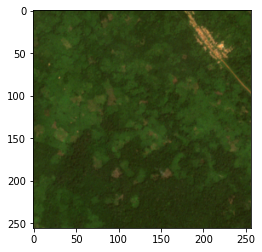

In [ ]:
# test if this works
plt.imshow(get_rgb(rgbnl))

Repeat for other quarters

In [ ]:
for loc in Path('landcovernet_2').ls(): 
  rgbnl = {}
  for img in loc.ls():
    if re.search('.*_B04_10m.tif', str(img)) : rgbnl['red']   = img
    if re.search('.*_B03_10m.tif', str(img)) : rgbnl['green'] = img  
    if re.search('.*_B02_10m.tif', str(img)) : rgbnl['blue']  = img
    if re.search('.*_B08_10m.tif', str(img)) : rgbnl['nir']   = img
  rgb = get_rgb(rgbnl)

  filename = re.findall('.+/.+/(.*)_B04_10m.tif', str(rgbnl['red']))[0]
  plt.imsave('landcovernet_RGB/inputs/' + filename + '_RGB.png', rgb.astype('uint8'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [ ]:
for loc in Path('landcovernet_3').ls(): 
  rgbnl = {}
  for img in loc.ls():
    if re.search('.*_B04_10m.tif', str(img)) : rgbnl['red']   = img
    if re.search('.*_B03_10m.tif', str(img)) : rgbnl['green'] = img  
    if re.search('.*_B02_10m.tif', str(img)) : rgbnl['blue']  = img
    if re.search('.*_B08_10m.tif', str(img)) : rgbnl['nir']   = img
  rgb = get_rgb(rgbnl)

  filename = re.findall('.+/.+/(.*)_B04_10m.tif', str(rgbnl['red']))[0]
  plt.imsave('landcovernet_RGB/inputs/' + filename + '_RGB.png', rgb.astype('uint8'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [ ]:
for loc in Path('landcovernet_4').ls(): 
  rgbnl = {}
  for img in loc.ls():
    if re.search('.*_B04_10m.tif', str(img)) : rgbnl['red']   = img
    if re.search('.*_B03_10m.tif', str(img)) : rgbnl['green'] = img  
    if re.search('.*_B02_10m.tif', str(img)) : rgbnl['blue']  = img
    if re.search('.*_B08_10m.tif', str(img)) : rgbnl['nir']   = img
  rgb = get_rgb(rgbnl)

  filename = re.findall('.+/.+/(.*)_B04_10m.tif', str(rgbnl['red']))[0]
  plt.imsave('landcovernet_RGB/inputs/' + filename + '_RGB.png', rgb.astype('uint8'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [ ]:
%%capture
!zip -r landcovernet_full_RGB.zip landcovernet_RGB